In [ ]:
# Replace with your repo URL
!git clone https://github.com/vcellmike/PatternsFormation.git

# Change directory to the cloned repo
%cd /content/PatternsFormation/Toybox

Cloning into 'PatternsFormation'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 42 (delta 7), reused 12 (delta 3), pack-reused 14 (from 1)
Receiving objects: 100% (42/42), 69.80 MiB | 24.68 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/PatternsFormation/Toybox


In [ ]:
import json
import os
import torch
from sklearn.metrics import accuracy_score, classification_report
from PIL import Image
import pandas as pd
from google.colab import drive
from PIL import Image
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
pd.set_option('display.max_columns', None)

In [ ]:
# set random seeds for repeatability
import numpy as np
import random

def set_seed(seed_val):
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)
seed_val = 42
set_seed(seed_val)

In [ ]:
# unzip the VCell simulation images
!unzip "/content/PatternsFormation/Toybox/05-09-2024_all_images.zip"
!unzip "/content/PatternsFormation/Toybox/Generated Images.zip"
!unzip "/content/PatternsFormation/Toybox/Generated_Images_7-2-24.zip"


Streaming output truncated to the last 5000 lines.
  inflating: Generated_Images_7-2-24/noise 6 22994.0.png  
  inflating: Generated_Images_7-2-24/noise 6 22995.0.png  
  inflating: Generated_Images_7-2-24/noise 6 22996.0.png  
  inflating: Generated_Images_7-2-24/noise 6 22997.0.png  
  inflating: Generated_Images_7-2-24/noise 6 22998.0.png  
  inflating: Generated_Images_7-2-24/noise 6 22999.0.png  
  inflating: Generated_Images_7-2-24/noise 6 23000.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24001.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24002.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24003.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24004.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24005.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24006.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24007.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24008.0.png  
  inflating: Generated_Images_7-2-24/noise 6 24009.0.png  
  inf

In [ ]:
# import features dataframe for all the images
with open("/content/PatternsFormation/Toybox/2025-05-24_feats_df_toybox.pkl", 'rb') as f:
  feats_df = pickle.load(f) # deserialize using load()

print(feats_df.shape)
feats_df

(27515, 113)


,Ua,Ui,Ga,Gi,Ba,Da,Di,pattern,noise,path,seed,dir,feat_bool,num_spots,Mean,Median,Area_mean,Area_std,X_mean,X_std,Y_mean,Y_std,Perim._mean,Perim._std,BX_mean,BX_std,BY_mean,BY_std,Width_mean,Width_std,Height_mean,Height_std,Major_mean,Major_std,Minor_mean,Minor_std,Angle_mean,Angle_std,Circ._mean,Circ._std,Feret_mean,Feret_std,IntDen_mean,IntDen_std,%Area_mean,%Area_std,RawIntDen_mean,RawIntDen_std,FeretX_mean,FeretX_std,FeretY_mean,FeretY_std,FeretAngle_mean,FeretAngle_std,MinFeret_mean,MinFeret_std,AR_mean,AR_std,Round_mean,Round_std,Solidity_mean,Solidity_std,num_spots_inverted,Mean_inverted,Median_inverted,Area_inverted_mean,Area_inverted_std,X_inverted_mean,X_inverted_std,Y_inverted_mean,Y_inverted_std,Perim._inverted_mean,Perim._inverted_std,BX_inverted_mean,BX_inverted_std,BY_inverted_mean,BY_inverted_std,Width_inverted_mean,Width_inverted_std,Height_inverted_mean,Height_inverted_std,Major_inverted_mean,Major_inverted_std,Minor_inverted_mean,Minor_inverted_std,Angle_inverted_mean,Angle_inverted_std,Circ._inverted_mean,Circ._inverted_std,Feret_inverted_mean,Feret_inverted_std,IntDen_inverted_mean,IntDen_inverted_std,%Area_inverted_mean,%Area_inverted_std,RawIntDen_inverted_mean,RawIntDen_inverted_std,FeretX_inverted_mean,FeretX_inverted_std,FeretY_inverted_mean,FeretY_inverted_std,FeretAngle_inverted_mean,FeretAngle_inverted_std,MinFeret_inverted_mean,MinFeret_inverted_std,AR_inverted_mean,AR_inverted_std,Round_inverted_mean,Round_inverted_std,Solidity_inverted_mean,Solidity_inverted_std,full_path,classifier_pred_class
0,0.025122,0.063822,0.071957,0.106327,-0.113131,0.009186,0.611871,1,2,1.png,1,/content/05-09-2024_all_images/,1,70,5.489,0,12.300000,2.548669,99.395943,58.506181,97.530229,58.913237,12.282143,1.400962,97.371429,58.453442,95.528571,58.843551,4.071429,0.723512,4.057143,0.753766,4.245571,0.439294,3.664200,0.511781,55.108900,57.413924,0.958686,0.069883,4.926700,0.412294,3.136500e+03,649.910626,100.0,0.0,3.136500e+03,649.910626,97.942857,58.572760,96.014286,58.843981,120.129000,30.775307,3.653171,0.564778,1.177686,0.183575,0.866686,0.115368,0.879486,0.067138,1,249.511,255,39139.0,0.0,99.998,0.0,100.022,0.0,811.882,0.0,0.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,223.351,0.0,223.117,0.0,38.796,0.0,0.746,0.0,282.843,0.0,9980445.0,0.0,100.0,0.0,9980445.0,0.0,0.0,0.0,200.0,0.0,45.000,0.0,200.0,0.0,1.001,0.0,0.999,0.0,0.979,0.0,/content/05-09-2024_all_images/1.png,2
1,0.034475,0.059956,0.080798,0.10037,-0.132577,0.008852,0.854084,1,2,3.png,3,/content/05-09-2024_all_images/,1,63,4.921,0,12.253968,2.569468,101.800571,59.297600,99.451270,58.953924,11.663270,1.365051,99.968254,59.323693,97.619048,58.964458,3.666667,0.534522,3.666667,0.534522,4.237317,0.401713,3.661714,0.572434,56.049556,60.605082,0.999619,0.003000,4.908365,0.491745,3.124762e+03,655.214389,100.0,0.0,3.124762e+03,655.214389,100.158730,59.330446,98.079365,59.017431,120.191190,32.406426,3.476190,0.613529,1.185032,0.226780,0.867667,0.127976,0.954905,0.046408,1,250.078,255,39228.0,0.0,99.992,0.0,100.015,0.0,809.255,0.0,0.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,223.524,0.0,223.451,0.0,72.380,0.0,0.753,0.0,282.843,0.0,10003140.0,0.0,100.0,0.0,10003140.0,0.0,0.0,0.0,0.0,0.0,135.000,0.0,200.0,0.0,1.000,0.0,1.000,0.0,0.981,0.0,/content/05-09-2024_all_images/3.png,2
2,0.028367,0.057912,0.073998,0.080784,-0.133789,0.008512,0.534244,1,2,7.png,7,/content/05-09-2024_all_images/,1,77,4.692,0,9.558442,1.427863,100.557675,58.022388,98.103338,59.633687,10.379961,1.091819,98.870130,58.006796,96.519481,59.576560,3.402597,0.564300,3.194805,0.559196,3.806623,0.403173,3.196818,0.352550,29.220831,46.845042,0.992974,0.032896,4.416805,0.320359,2.437403e+03,364.105032,100.0,0.0,2.437403e+03,364.105032,98.961039,57.996292,96.753247,59.526521,133.450130,23.616781,2.961039,0.375951,1.209857,0.220792,0.849429,0.129524,0.946805,0.050966,1,250.308,255,39264.0,0.0,99.987,0.0,100.001,0.0,808.326,0.0,0.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,223.626,0.0,223.554,0.0,5.766,0.0,0.755,0.0,282.843,0.0,10012320.0,0.0

In [ ]:
unique_pattern_vals = list(feats_df["noise"].unique())
unique_values_to_num = []
for value in unique_pattern_vals:
  unique_values_to_num.append(float(unique_pattern_vals.index(value)))
print(sorted(unique_values_to_num))
print(len(unique_values_to_num))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

In [ ]:
column_names_file = open("/content/PatternsFormation/column_schema.txt", "w")
columns = (list(feats_df.columns.unique()))
for column in columns:
  column_names_file.write(f"**{column}**" + "\n")
column_names_file.close()


In [ ]:
print((feats_df["noise"].unique()))

[2 '24843.0' '21046.0' ... 4 5 3]


In [ ]:
# PCA on feat arrays

# scaling data
from sklearn.preprocessing import StandardScaler
import pandas as pd

## Creates a SS object
sc = StandardScaler()

## Creates a scaled feature array
## excludes non-feature columns
feat_array_scaled = pd.DataFrame(sc.fit_transform(feats_df[feats_df.columns[13:111]]))

print(feat_array_scaled.shape)

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

## creates a PCA class with 3 axes
pca = PCA(n_components = 3)

## fits the data in the dataframe to the PCA object
pca_data = pca.fit_transform(feat_array_scaled)

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

## all rows, first column
feats_df["pc1"] = pca_data[:,0]

## all rows, second column
feats_df["pc2"] = pca_data[:,1]

## all rows, third column
feats_df["pc3"] = pca_data[:,2]

## shape() returns (rows, columns)
# PCA components (loadings)
## pca.components_ is a numpy array (n_components, n_features)
## n_features = number of columns in dataset
## n_components = number of PCA components
##.T transposes to shape (n_features, n_components)
## we have n_component columns and n_features rows. here its (3xFeats#)
## index=feat_array_scaled.columns sets index values to the column values of feat_array_scaled
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=feat_array_scaled.columns)

print("PCA Loadings:")
print(loadings)

# Find top features for each principal component
# empty dict
top_features = {}

# loops through each column in loadings.columns
for pc in loadings.columns:
    ## adds {pc : loadings[pc].absolute value.returns top 3 largest.converts index to list}
    top_features[pc] = loadings[pc].abs().nlargest(3).index.tolist()  # Top 3 contributing features
print("\nTop Contributing Features per Principal Component:")
print(top_features)

## Outputs the names of the columns as determined above ^^
## # of feature
for feat in top_features["PC1"]:
    print(f"----{feat}")
print("PC2:")
for feat in top_features["PC2"]:
    print(f"----{feat}")
print("PC3:")
for feat in top_features["PC3"]:
    print(f"----{feat}")


(27515, 98)
[0.40902343 0.25403697 0.08426518]
PCA Loadings:
         PC1       PC2       PC3
0   0.068897  0.144352  0.009214
1  -0.017321 -0.115555 -0.016844
2  -0.018855 -0.135199 -0.030148
3  -0.114329 -0.136092  0.015795
4   0.087364 -0.073967 -0.202625
..       ...       ...       ...
93  0.094830 -0.088012 -0.052035
94 -0.122099  0.104895  0.019896
95  0.124236 -0.112134  0.019913
96 -0.100552 -0.072378  0.015281
97  0.123014 -0.088315  0.071516

[98 rows x 3 columns]

Top Contributing Features per Principal Component:
{'PC1': [26, 45, 52], 'PC2': [25, 9, 58], 'PC3': [53, 79, 83]}
----26
----45
----52
PC2:
----25
----9
----58
PC3:
----53
----79
----83


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Feats_df[True]:
             Ua        Ui        Ga        Gi        Ba        Da        Di  \
678    0.051345  0.072032  0.152423  0.039715 -0.091114  0.010137  0.774293   
690     0.05057  0.178627  0.113364  0.037388 -0.099541  0.009552  1.217258   
703    0.050428  0.124717  0.102754  0.064113 -0.174264  0.011223  1.465167   
740    0.050705  0.101258  0.079464  0.086682 -0.068699  0.009353  0.992169   
781    0.050832  0.055089  0.066678  0.152569 -0.115806  0.008818  0.951498   
...         ...       ...       ...       ...       ...       ...       ...   
27413  0.050531  0.129254  0.170881  0.092555 -0.200178   0.00818  0.561061   
27419  0.051184  0.011865  0.086303  0.099657 -0.092642  0.008623  0.339493   
27423  0.051186  0.073296   0.02816  0.163699 -0.125548  0.011507  0.821956   
27447   0.05154  0.033546  0.097288  0.050213 -0.057022  0.009161  0.452735   
27482  0.051401  0.145513  0.164349  0.138121 -0.094795  0.008613  1.062469   

       pattern noise               

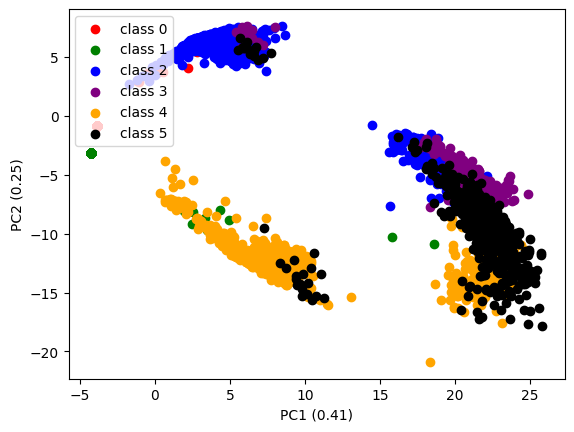

In [ ]:
# plot the model predicted class in feature space

## defines amount of clusters
num_classes = 6

## works like range() function for numpy array
classes = np.arange(0,num_classes)# list of unique clusters

class_dfs = [] # list of dfs for each cluster

## loops thru class number
## QUESTION: what exactly is this chunk of code doing? i understand it makes a list and appends things to them based on whether they meet a critera
## however, what is the list's purpose?
for i in classes:
  ## sets value of df as feats_df[True or False] ???
  df = feats_df[feats_df["classifier_pred_class"] == i]
  df.reset_index(inplace = True, drop = True)
  class_dfs.append(df)

##print("Feats_df[True]:")
##print(feats_df[feats_df["Ua"].astype(float) >= .05])

feat_1 = "pc1"

feat_2 = "pc2"

## figure (window), ax (axes) = plt.subplots object
fig, ax = plt.subplots()

colors = ["red","green","blue","purple","orange","black","pink"]
alpha = [1,1,1,1,1,1,1]
for j in classes:
  # print(j)
  df = class_dfs[j]
  ax.scatter(df[feat_1], df[feat_2], c = colors[j], label = "class " + str(j), alpha = alpha[j])


leg = ax.legend(loc="upper left")

ax.set(xlabel = "PC1 (0.41)", ylabel = "PC2 (0.25)", title = "")
plt.show()

## QUESTION: is the .41 and the .25 the percentage of variation
## the data is describing?


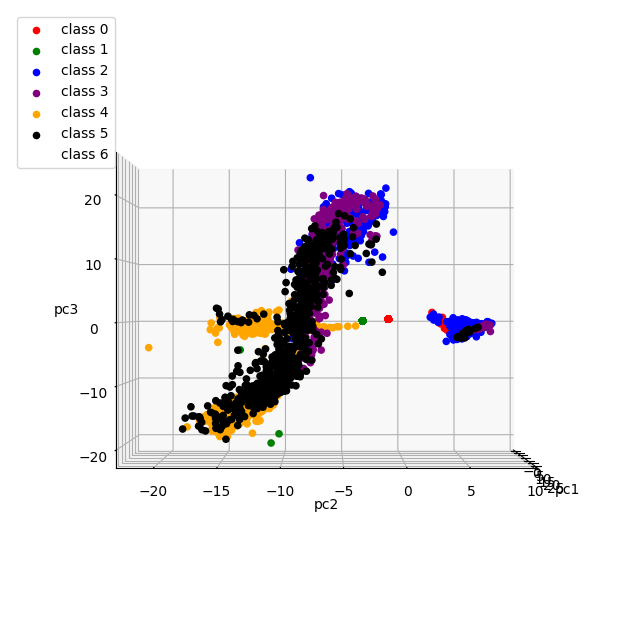

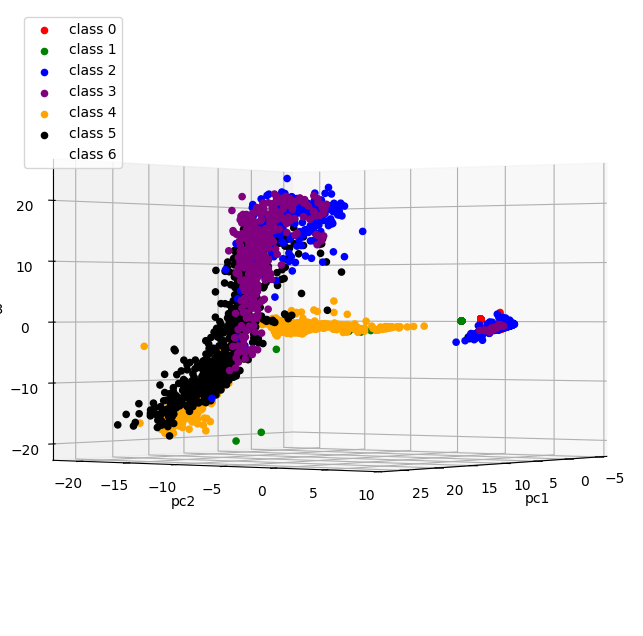

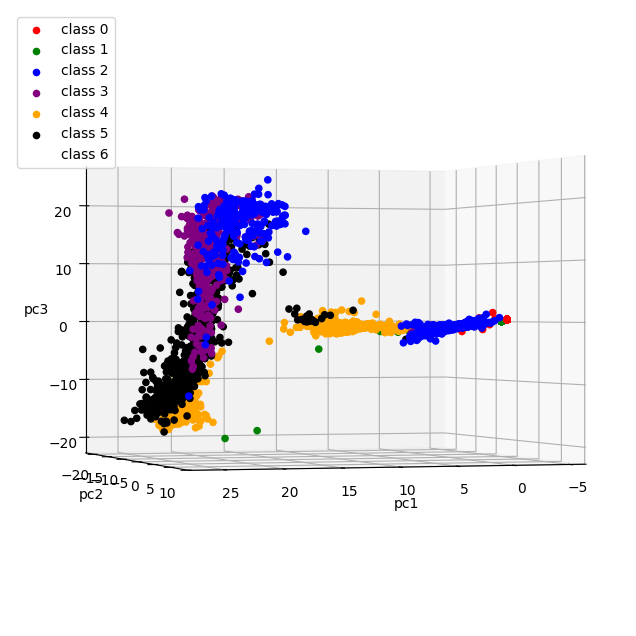

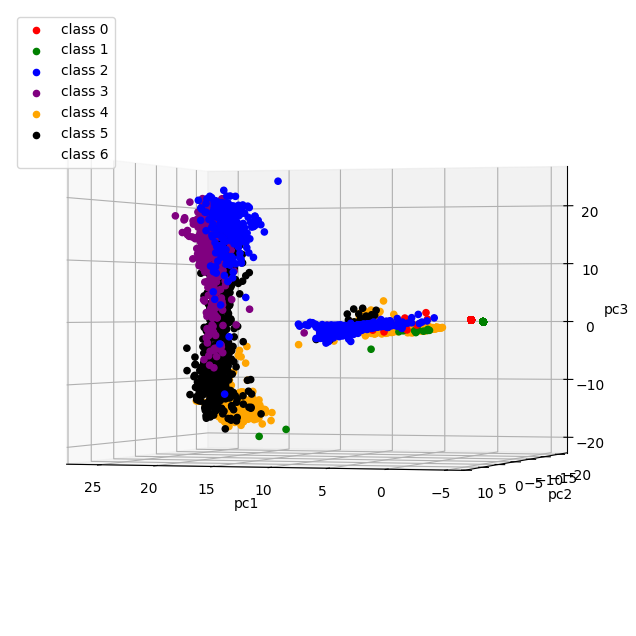

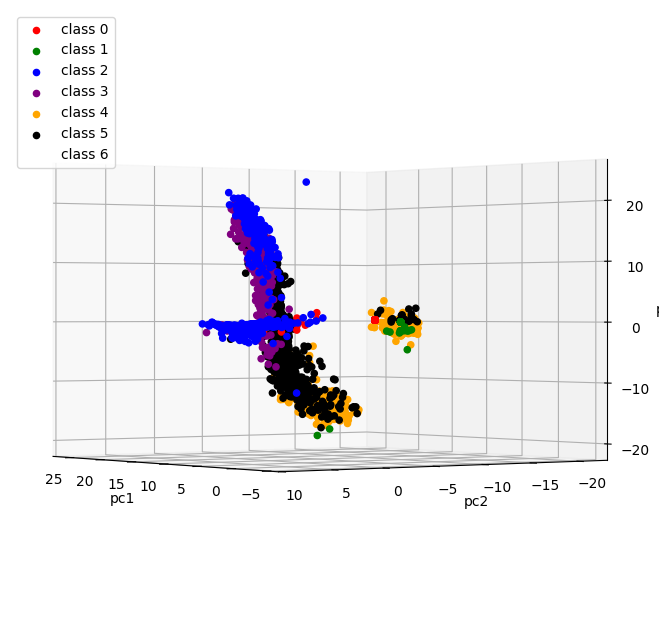

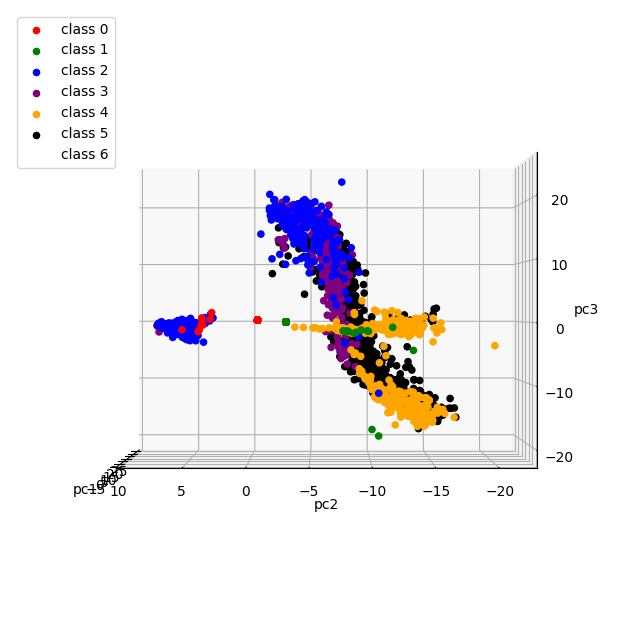

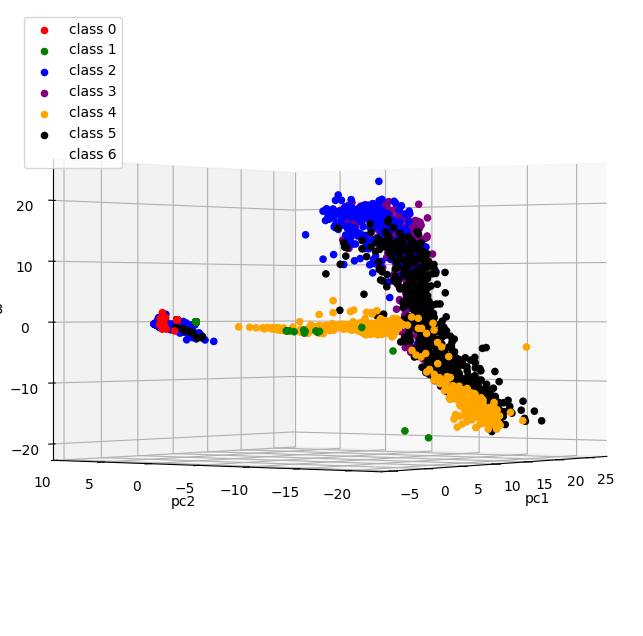

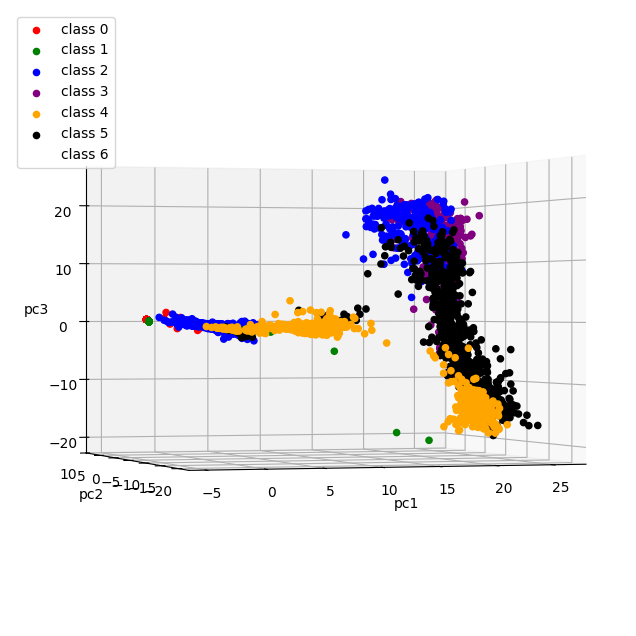

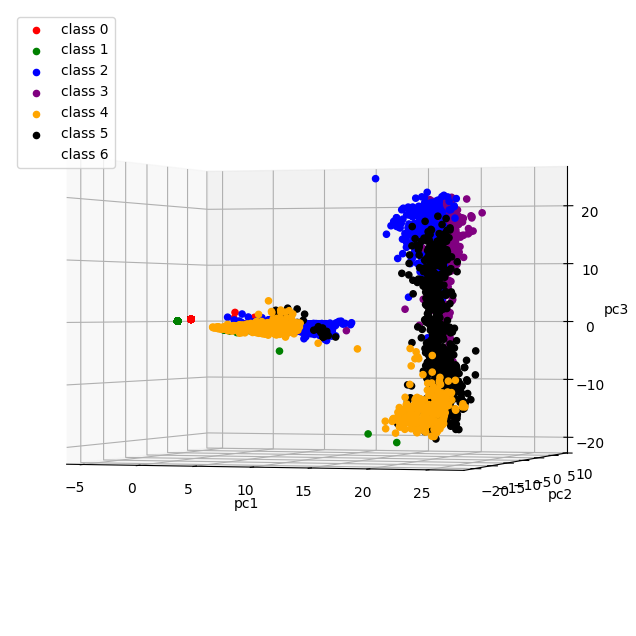

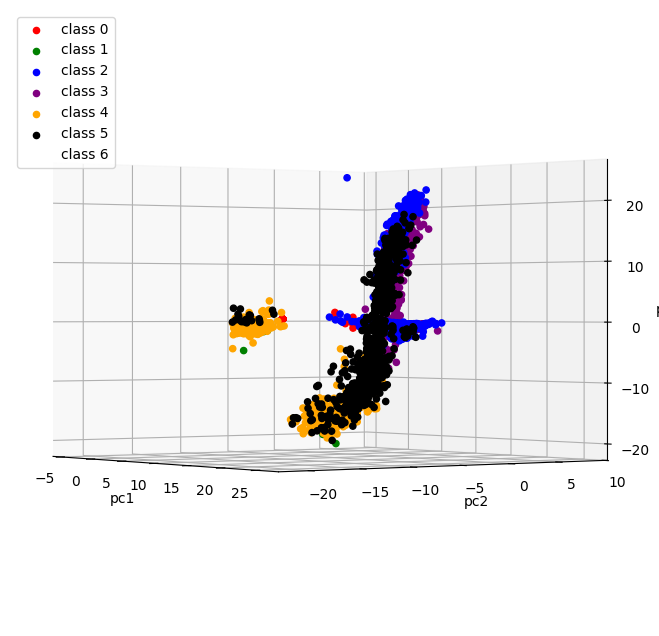

In [ ]:
# do clusters in first 3 PCs

from mpl_toolkits import mplot3d


num_classes = 7
classes = np.arange(0,num_classes)# list of unique clusters

class_dfs = [] # list of dfs for each cluster


for i in classes:
  df = feats_df[feats_df["classifier_pred_class"] == i]
  df.reset_index(inplace = True, drop = True)
  class_dfs.append(df)

feat_1 = "pc1"

feat_2 = "pc2"

feat_3 = "pc3"

for k in range(10):
  # Creating 3D figure
  fig = plt.figure(figsize=(8, 8))
  ax = plt.axes(projection='3d')

  colors = ["red","green","blue","purple","orange","black","pink"]
  alpha = [1,1,1,1,1,1,0]
  for j in classes:
    df = class_dfs[j]
    ax.scatter3D(df[feat_1], df[feat_2], df[feat_3], c = colors[j], label = "class " + str(j), alpha = alpha[j])


  leg = ax.legend(loc="upper left")

  ax.set(xlabel = feat_1, ylabel = feat_2, zlabel = feat_3)

  # 360 Degree view
  ax.view_init(0, 36*k)


  plt.show()

In [ ]:
# plot the model predicted class in feature space
# stopped here 5/26/25
def plotter(feat_1,feat_2):
  num_classes = 7
  classes = np.arange(0,num_classes)# list of unique clusters

  class_dfs = [] # list of dfs for each cluster

  for i in classes:
    df = feats_df[feats_df["classifier_pred_class"] == i]
    df.reset_index(inplace = True, drop = True)
    class_dfs.append(df)

  fig, ax = plt.subplots()

  colors = ["red","green","blue","purple","orange","black","pink"]
  alpha = [1,1,1,1,1,1,1]
  for j in classes:
    df = class_dfs[j]
    ax.scatter(df[feat_1], df[feat_2], c = colors[j], label = "class " + str(j), alpha = alpha[j])


  leg = ax.legend(loc="upper left")

  ax.set(xlabel = feat_1, ylabel = feat_2)
  plt.show()

  return

params = ["Ua","Ui","Ga","Gi","Da","Di","Ba"]

for p1 in params:
  for p2 in params:
    if p1 != p2:
      plotter(p1,p2)

In [ ]:
# make all of the params type float

feats_df[["Ua","Ui","Ga","Gi","Da","Di","Ba"]] = feats_df[["Ua","Ui","Ga","Gi","Da","Di","Ba"]].astype(float)

# do clusters in first 3 PCs

from mpl_toolkits import mplot3d

def threeD_plotter(feat_1,feat_2,feat_3):
    num_classes = 7
    classes = np.arange(0,num_classes)# list of unique clusters

    class_dfs = [] # list of dfs for each cluster

    for i in classes:
      df = feats_df[feats_df["classifier_pred_class"] == i]
      df.reset_index(inplace = True, drop = True)
      class_dfs.append(df)


    # feat_1 = "pc1_imagej_features"

    # feat_2 = "pc2_imagej_features"

    # feat_3 = "pc3_imagej_features"

    # for k in range(10):
    # Creating 3D figure
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection='3d')

    colors = ["red","green","blue","purple","orange","black","pink"]
    alpha = [1,1,1,1,1,1,0]
    for j in classes:
      df = class_dfs[j]
      ax.scatter3D(df[feat_1], df[feat_2], df[feat_3], c = colors[j], label = "class " + str(j), alpha = alpha[j])


    leg = ax.legend(loc="upper left")

    ax.set(xlabel = feat_1, ylabel = feat_2, zlabel = feat_3)

    # 360 Degree view
    ax.view_init(30, 90)
    plt.show()


params = ["Ua","Ui","Ga","Gi","Da","Di","Ba"]

for i in range(len(params)):
  for j in range(i,len(params)):
    for k in range(j,len(params)):
      if i != j and j != k:
        threeD_plotter(params[i],params[j],params[k])

In [ ]:
# plot ratios of params

def ratio_plotter(feat_1,feat_2):
  num_classes = 7
  classes = np.arange(0,num_classes)# list of unique clusters

  class_dfs = [] # list of dfs for each cluster

  for i in classes:
    df = feats_df[feats_df["classifier_pred_class"] == i]
    df.reset_index(inplace = True, drop = True)
    class_dfs.append(df)

  fig, ax = plt.subplots()

  colors = ["red","green","blue","purple","orange","black","pink"]
  alpha = [1,1,1,1,1,1,0]
  for j in classes:
    df = class_dfs[j]
    ax.scatter(df[feat_1], df[feat_2], c = colors[j], label = "class " + str(j), alpha = alpha[j])


  leg = ax.legend(loc="upper left")

  ax.set(xlabel = feat_1, ylabel = feat_2)
  plt.show()

  return


params = ["Ua","Ui","Ga","Gi","Da","Di","Ba"]
counter = 0
for i in range(len(params)):
  for j in range(i,len(params)):
    for k in range(len(params)):
      for l in range(k,len(params)):
        p0 = params[i]
        p1 = params[j]
        p2 = params[k]
        p3 = params[l]

        if p0 != p1 and p1 != p2 and p2 != p3 and p1 != p3 and p0 != p3:
          ratio_1 = np.array(feats_df[p0]) / np.array(feats_df[p1])
          feats_df[p0 + "/" + p1] = ratio_1

          ratio_2 = np.array(feats_df[p2]) / np.array(feats_df[p3])
          feats_df[p2 + "/" + p3] = ratio_2

          ratio_plotter(p0 + "/" + p1, p2 + "/" + p3)
          counter += 1
print(counter)

In [ ]:
feats = ["Ua","Ui","Ga","Gi","Da","Di","Ba",'Ua/Ui', 'Ua/Ga', 'Ua/Gi', 'Ua/Da', 'Ua/Di', 'Ua/Ba', 'Ga/Gi', 'Ga/Da',
       'Ga/Di', 'Ga/Ba', 'Gi/Da', 'Gi/Di', 'Gi/Ba', 'Da/Di', 'Da/Ba', 'Di/Ba',
       'Ui/Gi', 'Ui/Da', 'Ui/Di', 'Ui/Ba']  + list(feats_df.columns[13:111])

feats_extra = []

for i in feats:
  feats_extra.append(i + " mean")
  feats_extra.append(i + " min")
  feats_extra.append(i + " max")
  feats_extra.append(i + " std")

feats = feats_extra
print(len(feats))

num_classes = 7
classes = np.arange(0,num_classes)# list of unique clusters

class_dfs = [] # list of dfs for each cluster
rows = {}

for i in classes:
  df = feats_df[feats_df["classifier_pred_class"] == i]
  df.reset_index(inplace = True, drop = True)
  class_dfs.append(df)
  rows[str(i)] = []


for i in range(num_classes):
  df = class_dfs[i]
  for j in range(0,len(feats),4):
    mean_val = np.mean(np.array(df[feats[j][0:feats[j].index(" ")]].astype(float)))
    rows[str(i)].append(mean_val)

    min_val = np.min(np.array(df[feats[j][0:feats[j].index(" ")]].astype(float)))
    rows[str(i)].append(min_val)

    max_val = np.max(np.array(df[feats[j][0:feats[j].index(" ")]].astype(float)))
    rows[str(i)].append(max_val)

    std = np.std(np.array(df[feats[j][0:feats[j].index(" ")]].astype(float)))
    rows[str(i)].append(std)

    # print("Cluster " + str(i) + " avg " + feat + ": " + str(mean_val))

500


In [ ]:
cluster_means_df = pd.DataFrame(rows)
# cluster_means_df["feats"] = feats
cluster_means_df = cluster_means_df.transpose()
cluster_means_df.columns = feats

cluster_means_df

,Ua mean,Ua min,Ua max,Ua std,Ui mean,Ui min,Ui max,Ui std,Ga mean,Ga min,Ga max,Ga std,Gi mean,Gi min,Gi max,Gi std,Da mean,Da min,Da max,Da std,Di mean,Di min,Di max,Di std,Ba mean,Ba min,Ba max,Ba std,Ua/Ui mean,Ua/Ui min,Ua/Ui max,Ua/Ui std,Ua/Ga mean,Ua/Ga min,Ua/Ga max,Ua/Ga std,Ua/Gi mean,Ua/Gi min,Ua/Gi max,Ua/Gi std,Ua/Da mean,Ua/Da min,Ua/Da max,Ua/Da std,Ua/Di mean,Ua/Di min,Ua/Di max,Ua/Di std,Ua/Ba mean,Ua/Ba min,Ua/Ba max,Ua/Ba std,Ga/Gi mean,Ga/Gi min,Ga/Gi max,Ga/Gi std,Ga/Da mean,Ga/Da min,Ga/Da max,Ga/Da std,Ga/Di mean,Ga/Di min,Ga/Di max,Ga/Di std,Ga/Ba mean,Ga/Ba min,Ga/Ba max,Ga/Ba std,Gi/Da mean,Gi/Da min,Gi/Da max,Gi/Da std,Gi/Di mean,Gi/Di min,Gi/Di max,Gi/Di std,Gi/Ba mean,Gi/Ba min,Gi/Ba max,Gi/Ba std,Da/Di mean,Da/Di min,Da/Di max,Da/Di std,Da/Ba mean,Da/Ba min,Da/Ba max,Da/Ba std,Di/Ba mean,Di/Ba min,Di/Ba max,Di/Ba std,Ui/Gi mean,Ui/Gi min,Ui/Gi max,Ui/Gi std,Ui/Da mean,Ui/Da min,Ui/Da max,Ui/Da std,Ui/Di mean,Ui/Di min,Ui/Di max,Ui/Di std,Ui/Ba mean,Ui/Ba min,Ui/Ba max,Ui/Ba std,num_spots mean,num_spots min,num_spots max,num_spots std,Mean mean,Mean min,Mean max,Mean std,Median mean,Median min,Median max,Median std,Area_mean mean,Area_mean min,Area_mean max,Area_mean std,Area_std mean,Area_std min,Area_std max,Area_std std,X_mean mean,X_mean min,X_mean max,X_mean std,X_std mean,X_std min,X_std max,X_std std,Y_mean mean,Y_mean min,Y_mean max,Y_mean std,Y_std mean,Y_std min,Y_std max,Y_std std,Perim._mean mean,Perim._mean min,Perim._mean max,Perim._mean std,Perim._std mean,Perim._std min,Perim._std max,Perim._std std,BX_mean mean,BX_mean min,BX_mean max,BX_mean std,BX_std mean,BX_std min,BX_std max,BX_std std,BY_mean mean,BY_mean min,BY_mean max,BY_mean std,BY_std mean,BY_std min,BY_std max,BY_std std,Width_mean mean,Width_mean min,Width_mean max,Width_mean std,Width_std mean,Width_std min,Width_std max,Width_std std,Height_mean mean,Height_mean min,Height_mean max,Height_mean std,Height_std mean,Height_std min,Height_std max,Height_std std,Major_mean mean,Major_mean min,Major_mean max,Major_mean std,Major_std mean,Major_std min,Major_std max,Major_std std,Minor_mean mean,Minor_mean min,Minor_mean max,Minor_mean std,Minor_std mean,Minor_std min,Minor_std max,Minor_std std,Angle_mean mean,Angle_mean min,Angle_mean max,Angle_mean std,Angle_std mean,Angle_std min,Angle_std max,Angle_std std,Circ._mean mean,Circ._mean min,Circ._mean max,Circ._mean std,Circ._std mean,Circ._std min,Circ._std max,Circ._std std,Feret_mean mean,Feret_mean min,Feret_mean max,Feret_mean std,Feret_std mean,Feret_std min,Feret_std max,Feret_std std,IntDen_mean mean,IntDen_mean min,IntDen_mean max,IntDen_mean std,IntDen_std mean,IntDen_std min,IntDen_std max,IntDen_std std,%Area_mean mean,%Area_mean min,%Area_mean max,%Area_mean std,%Area_std mean,%Area_std min,%Area_std max,%Area_std std,RawIntDen_mean mean,RawIntDen_mean min,RawIntDen_mean max,RawIntDen_mean std,RawIntDen_std mean,RawIntDen_std min,RawIntDen_std max,RawIntDen_std std,FeretX_mean mean,FeretX_mean min,FeretX_mean max,FeretX_mean std,FeretX_std mean,FeretX_std min,FeretX_std max,FeretX_std std,FeretY_mean mean,FeretY_mean min,FeretY_mean max,FeretY_mean std,FeretY_std mean,FeretY_std min,FeretY_std max,FeretY_std std,FeretAngle_mean mean,FeretAngle_mean min,FeretAngle_mean max,FeretAngle_mean std,FeretAngle_std mean,FeretAngle_std min,FeretAngle_std max,FeretAngle_std std,MinFeret_mean mean,MinFeret_mean min,MinFeret_mean max,MinFeret_mean std,MinFeret_std mean,MinFeret_std min,MinFeret_std max,MinFeret_std std,AR_mean mean,AR_mean min,AR_mean max,AR_mean std,AR_std mean,AR_std min,AR_std max,AR_std std,Round_mean mean,Round_mean min,Round_mean max,Round_mean std,Round_std mean,Round_std min,Round_std max,Round_std std,Solidity_mean mean,Solidity_mean min,Solidity_mean max,Solidity_mean std,Solidity_std mean,Solidity_std min,Solidity_std max,Solidity_std std,num_spots_inverted mean,num_spots_inverted min,num_spots_inverted max,num_spots_inverted std,Mean_inverted 

Ua
[0.03332549794761474, 0.02505542429257236, 0.030928190436481796, 0.03798071567119271, 0.03426585356783815, 0.0286433947201003, 0.033098384204567184]
[0.008362589100228943, 0.008331157146038, 0.008338514864933356, 0.012739759143787402, 0.008429389736664135, 0.008446464646464646, 0.011286395397758608]
[0.05167845176212485, 0.05168062913751636, 0.05167557122215059, 0.05156918253397795, 0.05153046415084777, 0.0513746408068039, 0.05007732063199648]
[0.011129022426632385, 0.011532131210781654, 0.010269886230810538, 0.008283149629486966, 0.01042324199576154, 0.010490421982504937, 0.011845101438116]


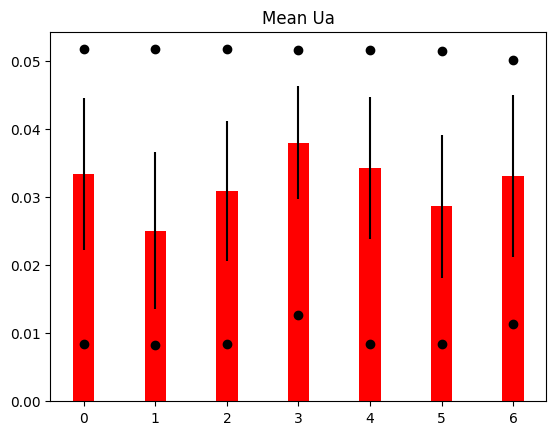

Ui
[0.08745374894226807, 0.13973630674231552, 0.09213370492364162, 0.10380583447583693, 0.11621051010153005, 0.12161622571640379, 0.04325651379867643]
[0.01005534267788842, 0.011682733225489128, 0.011270932320359695, 0.028393379872362706, 0.0182429267149897, 0.0237780698306186, 0.011270932320359695]
[0.20991811115961478, 0.20997331184797063, 0.20980374917856454, 0.20758359360575415, 0.2090642662371374, 0.20972902067108656, 0.1900899559108496]
[0.05781145457943532, 0.044574531222382266, 0.04416791047006356, 0.042422662057682886, 0.04165496050898763, 0.04517103129952708, 0.03415541836573793]


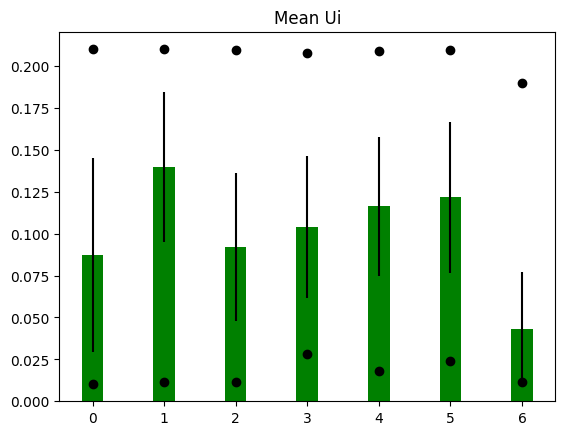

Ga
[0.06404308462802816, 0.1247732648171605, 0.09905733989785002, 0.12887689295405846, 0.12212241581540556, 0.11096292418006659, 0.14991868872128672]
[0.025109627789017666, 0.03095150373024852, 0.02629463095482268, 0.03226871482314994, 0.03528622870299425, 0.0354308262116049, 0.05169801632067137]
[0.17498557260010425, 0.17498658244776577, 0.17498407564807872, 0.17482290193532415, 0.17490951494839518, 0.1744784326203134, 0.17498557260010425]
[0.03318665134743573, 0.03237545816534959, 0.029444110809927575, 0.031986241184940686, 0.03201992362726848, 0.03316630965709266, 0.024730876905647462]


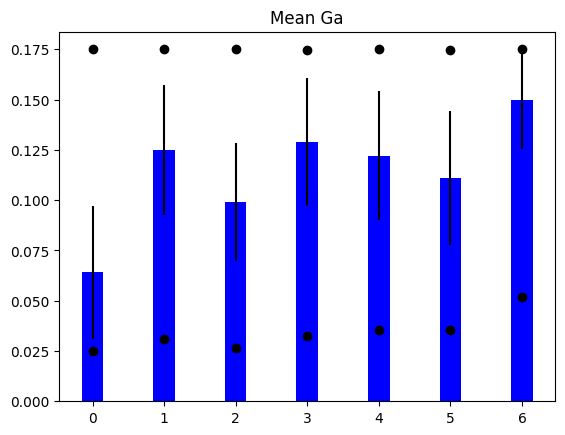

Gi
[0.11080003882692784, 0.08811878221544235, 0.10596873750670359, 0.07879059614875855, 0.07924678027640704, 0.09842570272324583, 0.09023075806288902]
[0.022726124962461736, 0.022753185472684234, 0.022799790537093398, 0.022970473914047967, 0.022874401919938933, 0.022996622141753714, 0.032515874593739974]
[0.1772141057632329, 0.1772042591952674, 0.177237200190899, 0.1563354992406623, 0.1771125431438148, 0.17727116615370253, 0.17544932457770607]
[0.039659151750334395, 0.04356888453463739, 0.03542732482190195, 0.02798766408503027, 0.035549173947899596, 0.039479224212821434, 0.036309320152650995]


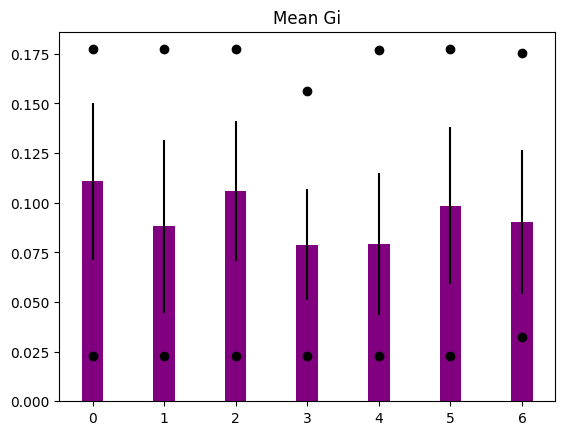

Da
[0.01006743295457628, 0.010005377245059292, 0.009952112908666455, 0.009915223161465005, 0.00991037649033575, 0.009907956867451774, 0.0101100849074237]
[0.008000822244760487, 0.008000185066820716, 0.00800366824871277, 0.008000164168755663, 0.008023336925010999, 0.008001622558283475, 0.00803158469073001]
[0.011996305244558941, 0.011997642199320636, 0.011997564768864917, 0.01196943229221166, 0.011982717478679634, 0.011993671424043431, 0.011969429909204536]
[0.0010725572872934753, 0.0010948037523089082, 0.0010578130923593926, 0.00103521443044404, 0.0011033876961166274, 0.0010490889722762696, 0.001125529651059663]


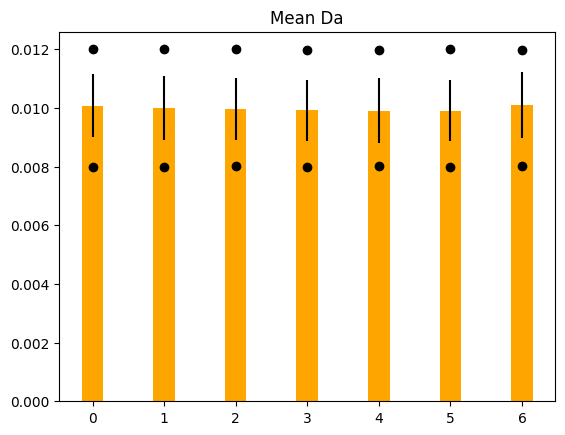

Di
[0.8094383750226062, 0.8693982239417637, 0.8725758245328795, 0.8739206617747346, 0.9129966619615223, 0.928548928858864, 0.9198182199507007]
[0.2532822510428113, 0.2531168343748258, 0.25318416275524913, 0.25416304561253833, 0.2652007890118345, 0.25558029486262535, 0.2764838764050924]
[1.4958177168283489, 1.4962593882706914, 1.4964507082578276, 1.4934638597498395, 1.4972024448397565, 1.4963063694661298, 1.4581340137466898]
[0.3439955017522112, 0.33768884788203996, 0.32443997979335, 0.3472692416171577, 0.3317737116329906, 0.3262713962157726, 0.31065454050992697]


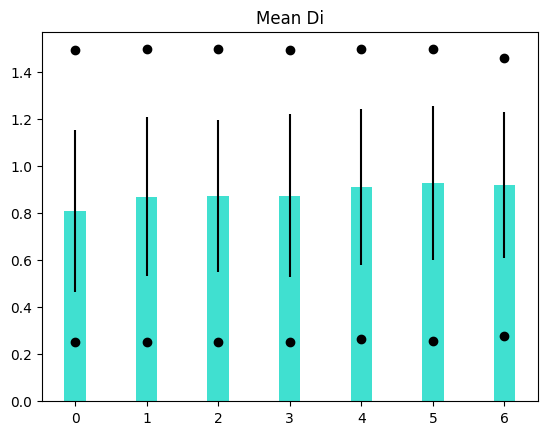

Ba
[-0.13031459075376178, -0.1006236141618634, -0.12926593052258104, -0.12934926815861755, -0.12146227483953319, -0.11996483897077653, -0.11187316139978122]
[-0.20183703944803733, -0.20180754582908073, -0.20192576230242676, -0.20145988511927154, -0.20151232448673456, -0.2010864468071505, -0.18758036656572694]
[-0.03806048312932242, -0.038046387668075596, -0.038664720495912894, -0.03992987412855982, -0.038371912501911354, -0.042654722035905174, -0.03997855396418336]
[0.04254683296332804, 0.042660784380849075, 0.038395119422070814, 0.03850659001520604, 0.04186402371280619, 0.042243509799604825, 0.04341146929306605]


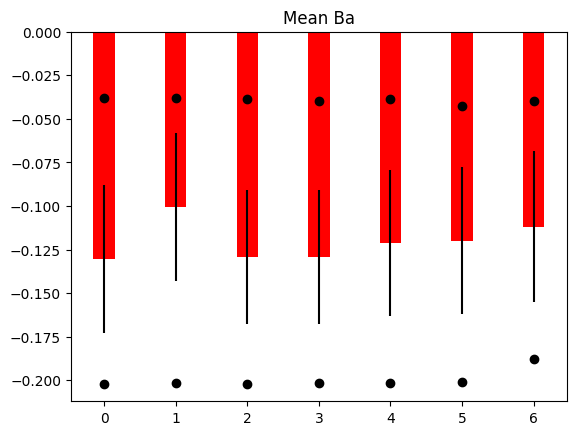

Ua/Ui
[0.7238500980507664, 0.21010318156890886, 0.41601820990122484, 0.41985835753341755, 0.32831684897605873, 0.2634653325605952, 1.0100849092903637]
[0.0417811184334392, 0.03983745903796738, 0.049782531912688915, 0.12812817701906312, 0.07129980232327496, 0.054390335676694414, 0.08719941977707299]
[4.67567934842584, 4.422623856503015, 3.5861210168749307, 1.5562947192268861, 1.341076819861044, 0.8842321610022862, 2.190660320281187]
[0.7425925347942333, 0.1813236842461165, 0.26106955804417414, 0.17935596352456082, 0.1509418678414301, 0.12853776987440588, 0.5130429906540441]


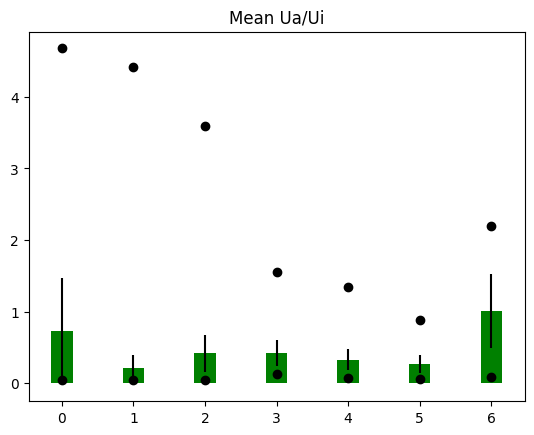

Ua/Ga
[0.634603782163034, 0.21112331495800596, 0.33035859059545297, 0.31634001079252955, 0.296850065397688, 0.2761893960551377, 0.22660536012533344]
[0.07108796313331901, 0.048902841745782535, 0.0547257488634735, 0.09339780746194905, 0.052623791692302954, 0.06160280233899322, 0.07243331333691087]
[2.0524745757072846, 0.7391165392778708, 0.8185233861713316, 0.7415674708863947, 0.7097749883472619, 0.7175155732808014, 0.44343491530297924]
[0.3415083461619646, 0.1050961657497854, 0.12114096988738217, 0.1173193432261742, 0.11188436778367258, 0.12088543485408358, 0.09296381915583242]


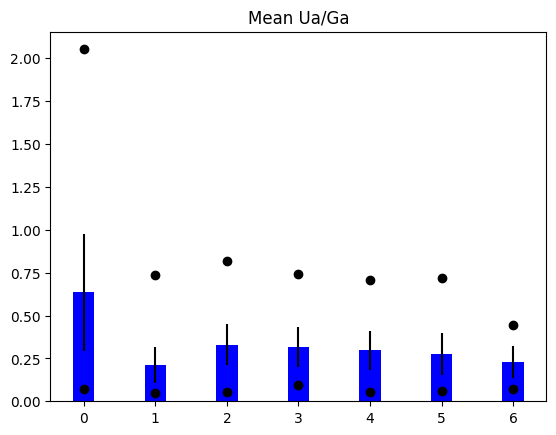

Ua/Gi
[0.3701893889256972, 0.4090016352171711, 0.33688477188864, 0.5489457888162875, 0.5314907167649678, 0.3634415634695143, 0.4495106170154703]
[0.048561120066774176, 0.047462204373542795, 0.05152257807015425, 0.22059255030181962, 0.06361733079688514, 0.07439480663288872, 0.07283201685734152]
[2.192432434502926, 2.1061084087521977, 2.031614774672819, 1.8118720637532246, 2.1744151148729363, 2.1744151148729363, 1.5135466147051124]
[0.26707895504408813, 0.3584012117947537, 0.20781869867685082, 0.247510877236396, 0.31438173258101154, 0.2688903403503919, 0.26974773081812725]


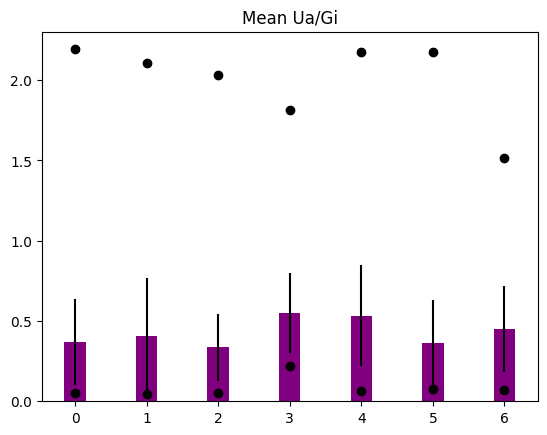

Ua/Da
[3.3472525112040814, 2.5324723818683186, 3.1438598803880153, 3.8824972025973437, 3.5101473853529273, 2.917267385576437, 3.296867745270608]
[0.7235928137330958, 0.6979377575493811, 0.757376858433098, 1.2196419570186787, 0.743271630231664, 0.8144165828185216, 1.0595546306005919]
[6.3373410189978285, 6.422405915036988, 6.3756693246664, 6.177033001228821, 6.125473687719712, 5.893608494063863, 6.17325777899243]
[1.1748929201168545, 1.1987035799388914, 1.1065136953458925, 0.9741830043398799, 1.167239998067193, 1.1113466712043198, 1.188907450957394]


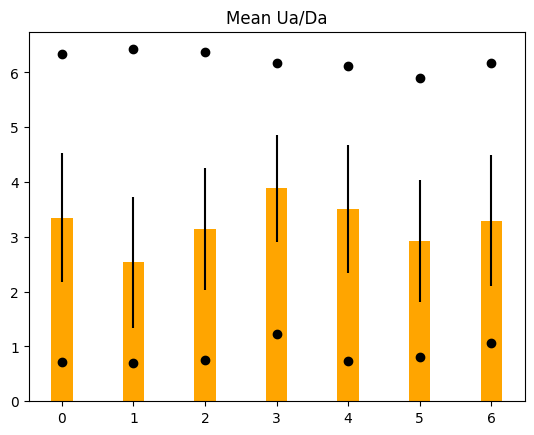

Ua/Di
[0.05107020809917607, 0.03559595419856721, 0.04192473567347083, 0.05262021994214696, 0.04501248347591718, 0.036390143493209876, 0.041335145508205634]
[0.005873017503171544, 0.00566837316498396, 0.005938787500275484, 0.015486390341730225, 0.008116701460025405, 0.007272796009813941, 0.008184196530910183]
[0.20142344359470313, 0.18858225814699509, 0.1868121938798218, 0.18219580900438095, 0.16921609051817144, 0.1897897859438802, 0.14611891918429837]
[0.032851014651007454, 0.027460765290300507, 0.02529685773788139, 0.028827642427429544, 0.027858188700651276, 0.022975232856763304, 0.022976460481109667]


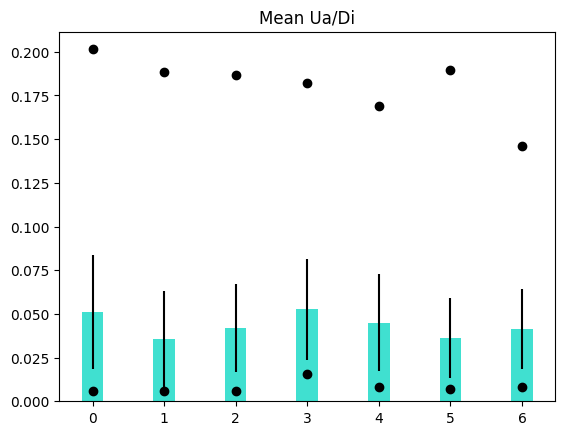

Ua/Ba
[-0.29884794627055183, -0.3115436619058964, -0.2698062173001021, -0.32863763855307515, -0.3312041485893301, -0.2865365446927809, -0.3516167400935678]
[-1.2875894053249701, -1.3101920363604729, -1.198844707114125, -1.2169759621388085, -1.230079314255567, -1.014838288527032, -1.0461506787466588]
[-0.04235920118580422, -0.04193169557174052, -0.04379944755788709, -0.07576105434140372, -0.049263287364326655, -0.04639470420571533, -0.06499624728640135]
[0.1823202894245725, 0.22218572525980962, 0.15117439039594163, 0.15378218663627183, 0.18610168768403812, 0.1841604306006751, 0.20332091691280874]


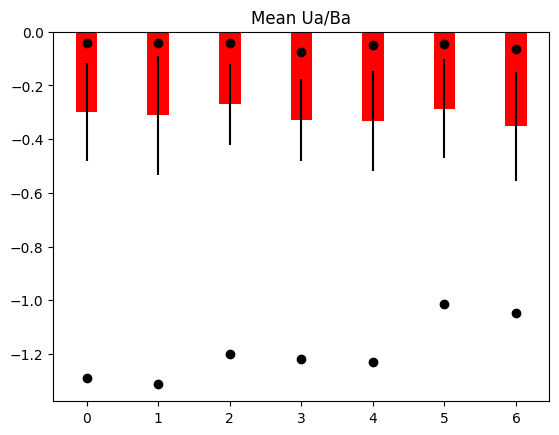

Ga/Gi
[0.6877112158633665, 1.893991083436945, 1.0404135977673055, 1.7885265000378758, 1.7815576425147799, 1.322223062604446, 1.969028021174048]
[0.15054602448182486, 0.2521667445203264, 0.2983970956716593, 0.5203493327730613, 0.47428814172431544, 0.39158387143712864, 0.3224076714074797]
[6.076332519247245, 7.28636619857076, 5.287195710438404, 4.172106786363872, 6.580888916810332, 4.727241122445853, 4.57367130813619]
[0.5695975485412239, 1.2360984463661366, 0.49095073946768014, 0.6177408765267265, 0.7108620960047277, 0.6681259444597776, 0.8599170140946852]


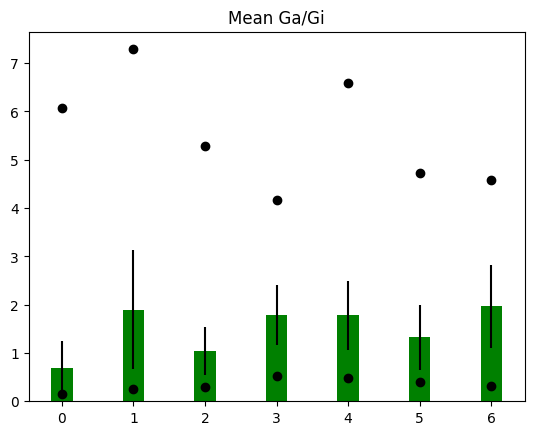

Ga/Da
[6.427102718080901, 12.62067537644201, 10.052777043426032, 13.170422478978526, 12.45950274949242, 11.307603741770398, 14.98944514974918]
[2.139357567921576, 2.845482880641869, 2.5368878116982696, 3.4599872573894195, 3.6394111802544007, 3.154584122495534, 5.292510035664209]
[20.571587467262702, 21.658643326162146, 21.254784344607952, 20.889133537782453, 21.576907291978316, 21.70266416223263, 20.020632576157844]
[3.4044113098179234, 3.570017603165174, 3.155147837948045, 3.64653567836528, 3.5413378247327185, 3.504751680756725, 2.938192783180978]


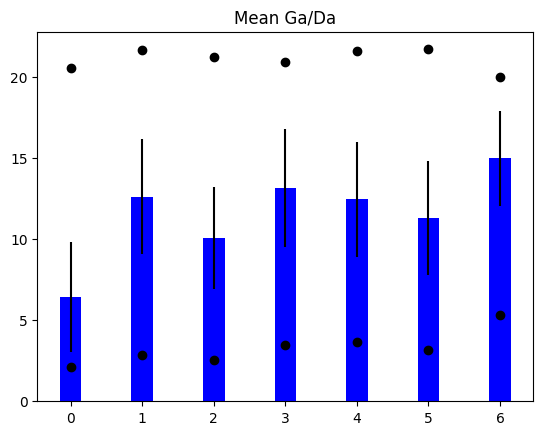

Ga/Di
[0.10105259239868469, 0.17523255343390146, 0.13639442651962647, 0.18328383160207942, 0.15940586113458857, 0.13680453854616764, 0.1930662246360497]
[0.017606858730128322, 0.03282480300970528, 0.021170802987137225, 0.03143896516941634, 0.03095411894375654, 0.02437233975203931, 0.05662822519417601]
[0.6596126700730138, 0.6751812373016993, 0.608524307052643, 0.585660757605818, 0.6595361786068815, 0.6698368356660661, 0.6240382402544221]
[0.08112322334936735, 0.10482109655479865, 0.08420821713911117, 0.11179174575396687, 0.09319099665981312, 0.06831283984348442, 0.10953997759779456]


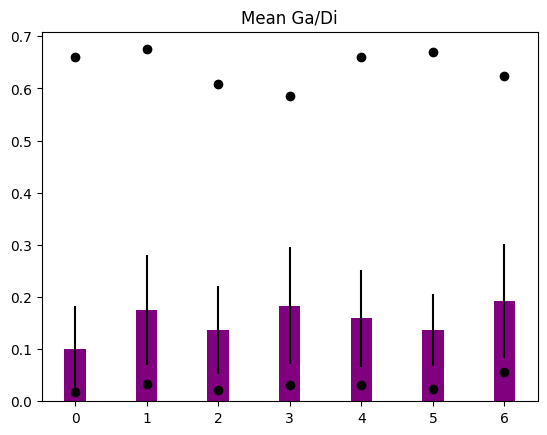

Ga/Ba
[-0.557371673670158, -1.475069485666036, -0.8313544454599282, -1.0725073581107696, -1.1310808686276181, -1.0305125536274655, -1.5433374630531118]
[-4.2182101411122535, -4.461369702883432, -3.264440881395815, -2.5614586994951503, -4.319073546384008, -2.7085025979625024, -3.410319497145928]
[-0.13239083750571096, -0.3053651564991718, -0.18138193608123218, -0.31246155306966766, -0.34261741538938767, -0.19257772128482747, -0.4857282264695703]
[0.3971221242005919, 0.7506197391294359, 0.351532507842247, 0.3733001434347644, 0.5111145948325584, 0.4418195524983449, 0.6207382189268932]


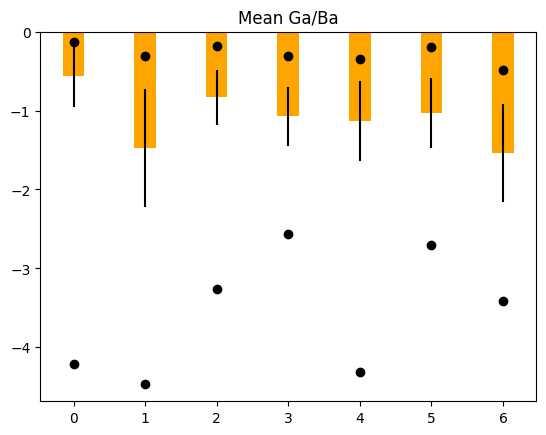

Gi/Da
[11.13869301576659, 8.92205459594731, 10.767424709897405, 8.054250350843756, 8.080090483069691, 10.078251830749961, 9.155268329317474]
[1.98969586815827, 1.915052408690571, 1.9494501424547064, 2.1271222839564445, 2.2037798578040846, 2.0937711441532483, 3.342218457784556]
[21.969371271377312, 21.355169188643146, 21.98280623743795, 15.720273682396712, 20.09143398882151, 20.172809046085128, 20.09143398882151]
[4.209803493522411, 4.574527771512231, 3.7986869124759495, 2.998935560280896, 3.7289960840495686, 4.236312419442267, 4.147397516759924]


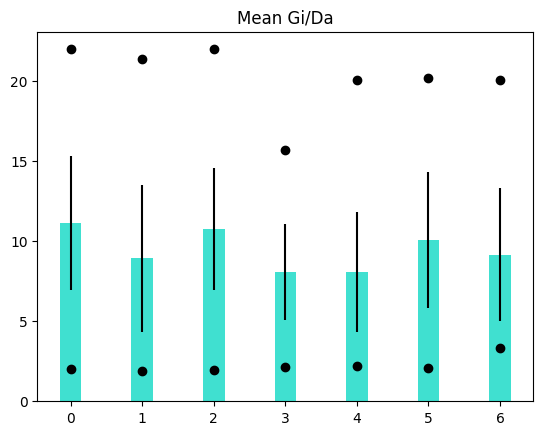

Gi/Di
[0.17008469942884105, 0.12236399252437004, 0.1440118936110249, 0.11175633962311042, 0.10139851780936442, 0.12054095205761682, 0.11572944559346252]
[0.016964170555660425, 0.015692571165030453, 0.016088601928854758, 0.01694432154406344, 0.016168435593882657, 0.01694432154406344, 0.023600828295194685]
[0.6767862540756566, 0.6500951187925361, 0.6854534640996522, 0.45584463037855527, 0.4071983032524416, 0.5857383262125281, 0.44048991303580237]
[0.11031836316395541, 0.09125762105207696, 0.08700304866654182, 0.07524826670668897, 0.06269192992837082, 0.06873154662745017, 0.0749514131906879]


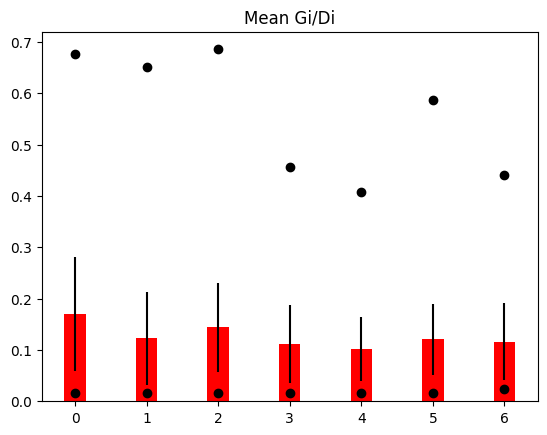

Gi/Ba
[-0.9842775123302178, -1.082991242601588, -0.9260850105451827, -0.6952050812091939, -0.7905313662143979, -0.9893583881860846, -1.035092244184263]
[-4.505164531556097, -4.395871112367986, -4.289656137081115, -3.7019274141043557, -4.20020176777954, -3.7628839402455516, -3.5391677583307057]
[-0.12982950653657202, -0.11857720919965202, -0.1212699463159374, -0.11877491644922689, -0.11988031577415734, -0.11877491644922689, -0.19341114337323198]
[0.5941634701319889, 0.781399877283572, 0.5169285436571217, 0.41966266279451, 0.5892795363025785, 0.6591750440779442, 0.8024956696027127]


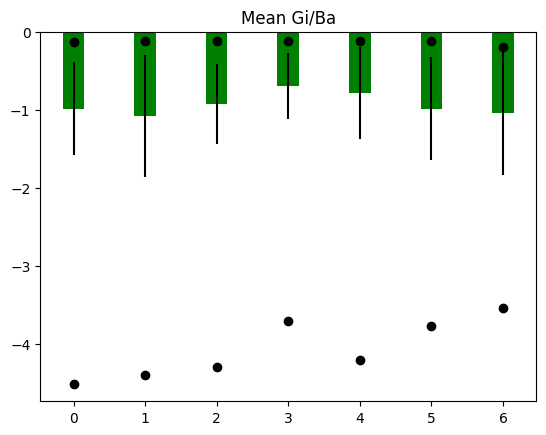

Da/Di
[0.015481775037755925, 0.014046469125173067, 0.013532967273228709, 0.013965717457911303, 0.012884430602255078, 0.012437618998401578, 0.012813944049501147]
[0.005426259907034423, 0.005394609075804995, 0.0055397535139210625, 0.005558751732075142, 0.00555731564734776, 0.005385782101643375, 0.006187532114653007]
[0.04451215252717471, 0.046200867359099035, 0.04521032278288604, 0.04150246376744438, 0.04298404859263361, 0.041243018203821716, 0.03476428598790892]
[0.00821792071030904, 0.007486570709538421, 0.006603522894798658, 0.007376959257073449, 0.006395999852269338, 0.00568191915653921, 0.006411081399087196]


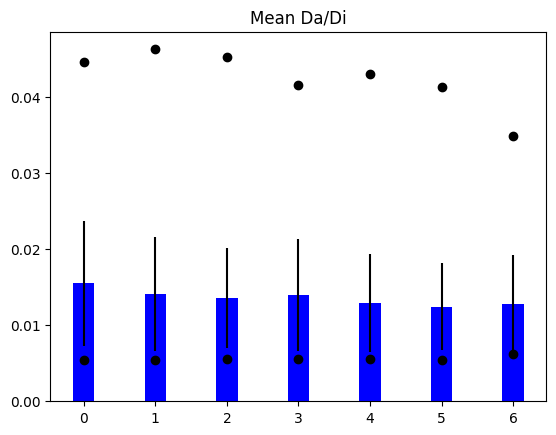

Da/Ba
[-0.08934146298531617, -0.12045075174552383, -0.08646086699007956, -0.08596474752165364, -0.09513793895134763, -0.09600111143881448, -0.10702766306935778]
[-0.31097565130944416, -0.30450767830295933, -0.28266049066744614, -0.2539915607480019, -0.2831557875510481, -0.2460346905168587, -0.23682465753559634]
[-0.04040746069794571, -0.04108178224690085, -0.03991316001234452, -0.040865644685987544, -0.04134691765090057, -0.04185989886510019, -0.04644528690125303]
[0.042533460716924945, 0.05618381894702133, 0.03689445177388277, 0.03682910078255502, 0.04495968981590491, 0.04260689199120774, 0.04744935353183559]


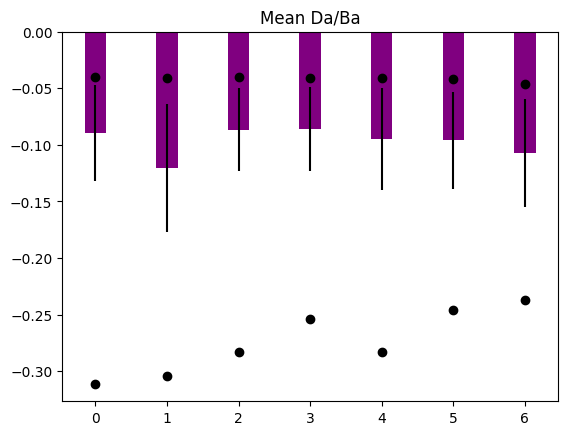

Di/Ba
[-7.213544444999177, -10.474996707655457, -7.5881056574157615, -7.536173477345809, -8.741614299425338, -8.954732567274508, -10.093996400502292]
[-37.16811905089047, -38.78544243885346, -35.75093460253893, -27.827254937090377, -34.43632137845246, -27.93707281607004, -31.495422288818734]
[-1.2685309757891203, -1.330026049522742, -1.415841735787052, -1.54256682326352, -1.6690581918629455, -1.8948952089705278, -1.839677825914291]
[4.801054908020192, 6.510246733564726, 4.478269082614615, 4.2895564840601, 5.266780950963758, 5.147299802712704, 6.5489223508512255]


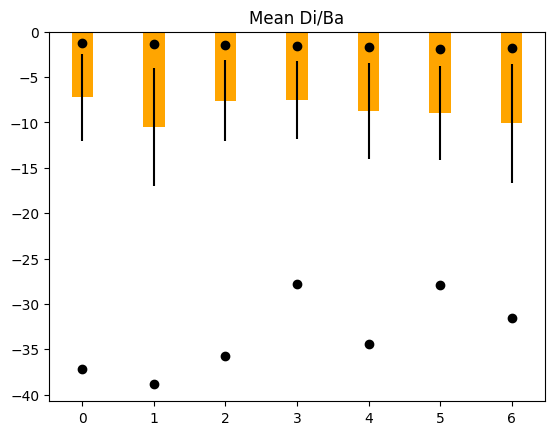

Ui/Gi
[0.9416513342492987, 2.0914964383808923, 0.9758919423217445, 1.5068744067474587, 1.7649996061020932, 1.4797568502716862, 0.5214793858344476]
[0.06191659809790531, 0.10114490428704781, 0.0727322323757516, 0.43368393584184023, 0.13237555380767208, 0.290968969640571, 0.0727322323757516]
[8.013831636545895, 8.701951070228256, 7.533080391141145, 6.528794271047638, 6.795838753151922, 7.861269778950335, 1.959138482751945]
[0.8867733321341897, 1.4256264378648278, 0.64505962404339, 0.9436192902681328, 1.0421513454802225, 0.8961412304205966, 0.33710355626511546]


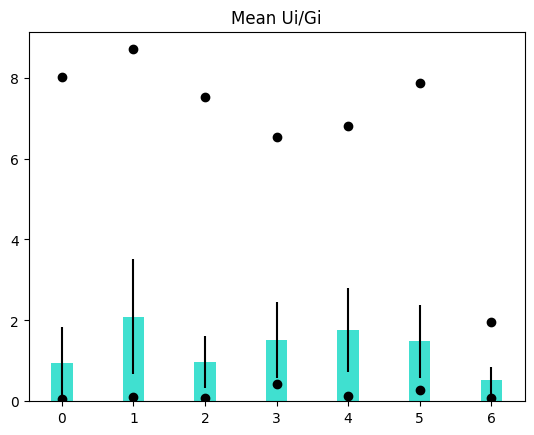

Ui/Da
[8.789485539908009, 14.12910609377631, 9.375362248479773, 10.602110151707318, 11.92961932359809, 12.406807816545436, 4.337886288621562]
[0.8765474570795928, 1.1406574124864763, 1.071915693886532, 2.3954622957755465, 1.6492167934900317, 2.1967509138857584, 1.2402824486665833]
[25.28853818202313, 25.907648627555904, 25.651321312017334, 25.81604076264697, 25.06114679595122, 25.045916082197962, 19.46018572737519]
[5.923749690739106, 4.7640086603878995, 4.675083461662592, 4.588138395976717, 4.645263247635658, 4.7771862695990075, 3.6426286640538206]


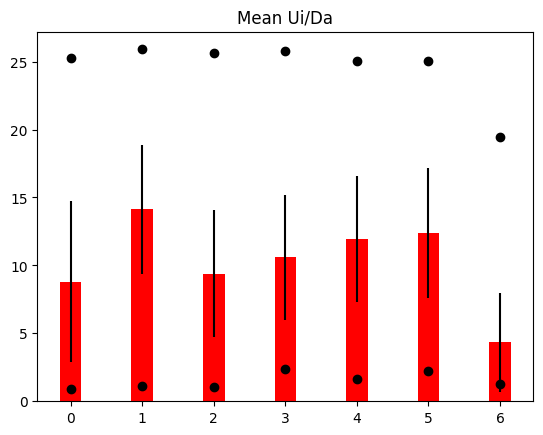

Ui/Di
[0.1352153819214155, 0.1957759791323642, 0.1253439829711235, 0.14381690451011545, 0.15046985840344818, 0.15342159231748168, 0.0557203333760865]
[0.0069563320615737174, 0.011211885300834447, 0.00817298366267853, 0.023776671080916887, 0.01571433472932382, 0.022867250668448514, 0.00817298366267853]
[0.8110866146122562, 0.8122862344100203, 0.7010801485864596, 0.5760708688602849, 0.5686743491402694, 0.5990619979204476, 0.33633315481466297]
[0.12339964468845142, 0.12273597371560849, 0.09041739406655898, 0.0956111783439112, 0.09428774271068777, 0.09207928093441635, 0.053982578739031624]


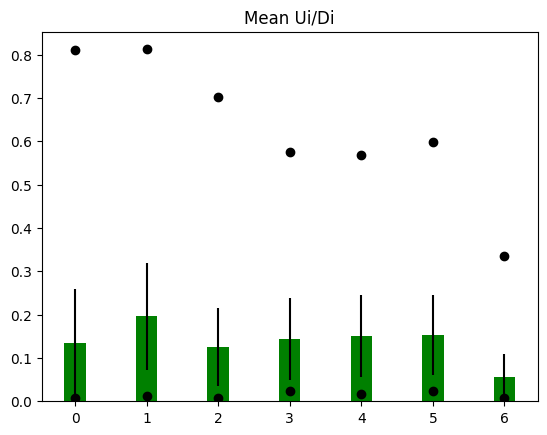

Ui/Ba
[-0.7634480008444138, -1.6393511435355521, -0.7651689008001812, -0.8822436889388533, -1.0484663955044968, -1.141932185284646, -0.4320404812231714]
[-4.975546331767332, -5.399505579082473, -4.802320359753497, -4.586148752718875, -3.5657598821077627, -4.140967788880022, -2.619030624555491]
[-0.05021688111375925, -0.09404349569648897, -0.08496837281331995, -0.24712994279410253, -0.13445357309479847, -0.24900331055323405, -0.11304212765857254]
[0.6526142811301857, 0.8810029807719558, 0.4367267833072574, 0.5607694978239096, 0.47533938235664397, 0.6211195358714576, 0.42290346529731787]


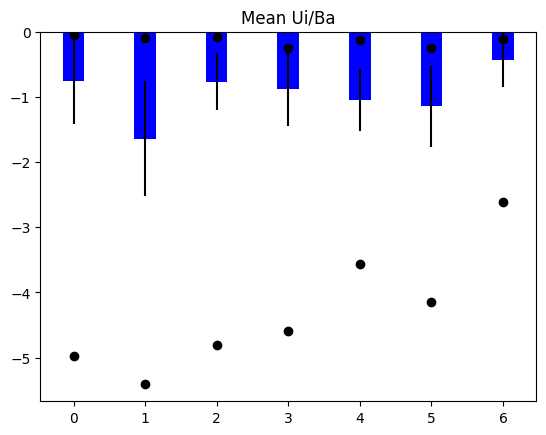

num_spots
[0.0014375326711970726, 1.000230388204124, 116.4063596491228, 75.20786516853933, 1.4461697722567288, 21.312035661218424, 28.134328358208954]
[0.0, 1.0, 1.0, 8.0, 1.0, 1.0, 1.0]
[3.0, 2.0, 385.0, 251.0, 9.0, 126.0, 113.0]
[0.04711236462713554, 0.015176795623561303, 58.372486263113025, 43.793649749294055, 1.0389419826087838, 22.99914309764754, 29.02386847005078]


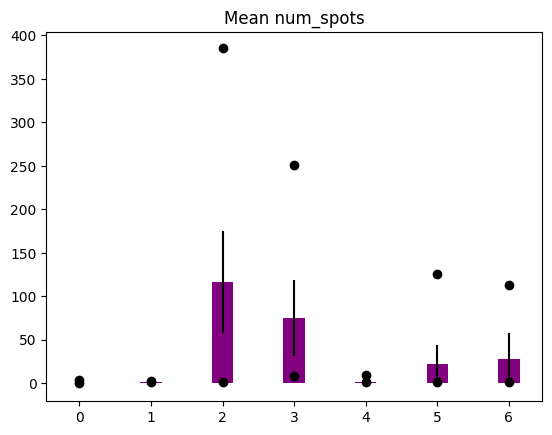

Mean
[0.0003964976476738107, 254.99958944822023, 43.8694975877193, 106.31575280898878, 211.03259627329194, 176.5409762258544, 68.74008955223881]
[0.0, 253.47, 0.006, 59.351, 116.892, 110.332, 12.667]
[2.461, 255.0, 212.307, 141.168, 254.987, 252.66, 252.998]
[0.028424065039297258, 0.01847735374670966, 38.11615892343756, 16.243892901178707, 38.217846393878254, 39.5244066730707, 67.2030413359243]


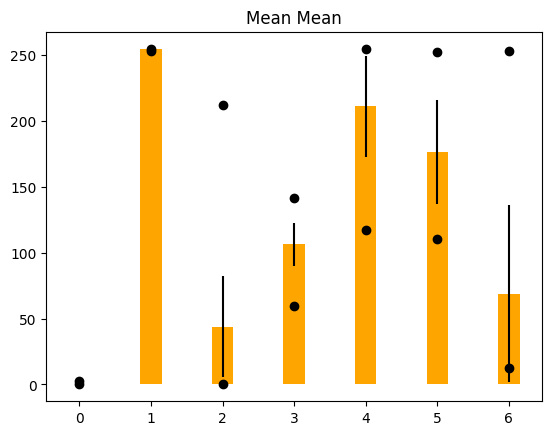

Median
[0.0, 255.0, 10.708881578947368, 24.353932584269664, 252.09627329192546, 235.29717682020802, 41.865671641791046]
[0.0, 255.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0]
[0.0, 0.0, 51.14767500052823, 74.94757352089267, 27.05584376366446, 68.08831522069559, 94.46169491724385]


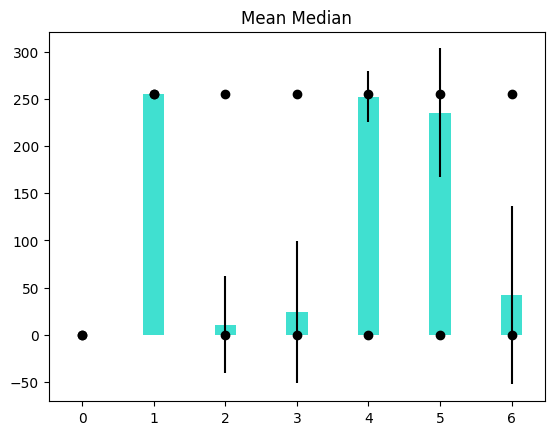

Area_mean
[39953.01515943544, 39995.33486925469, 76.6300074400428, 357.1181158984194, 29237.352929360146, 4636.59533100266, 4076.621526742877]
[1.0, 19966.5, 1.0, 39.29083665338646, 2301.0, 174.70634920634922, 35.92920353982301]
[40000.0, 40000.0, 6325.0, 2210.625, 39998.0, 39489.0, 39531.0]
[1369.210938506047, 304.0104394823612, 136.72270817217142, 344.8654227908139, 11063.51558539327, 6747.870036073717, 9286.262906504957]


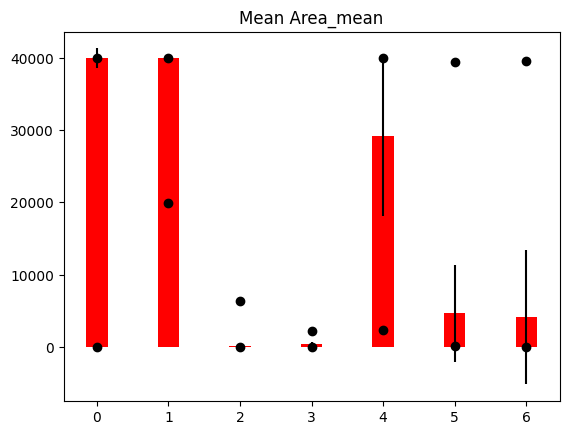

Area_std
[0.00010670368281857371, 4.592904043312982, 41.799895125843385, 651.8623630394962, 2954.776996351103, 6004.042507721907, 1238.5391324826387]
[0.0, 0.0, 0.0, 30.562003023051496, 0.0, 0.0, 0.0]
[0.816496580927726, 19957.5, 12420.080080257132, 5856.976236933184, 19896.5, 19790.5, 19814.0]
[0.00933337058719062, 302.5571934292849, 184.1944470333463, 976.4929038238082, 5702.642784819114, 5303.757132243989, 3944.1340220752727]


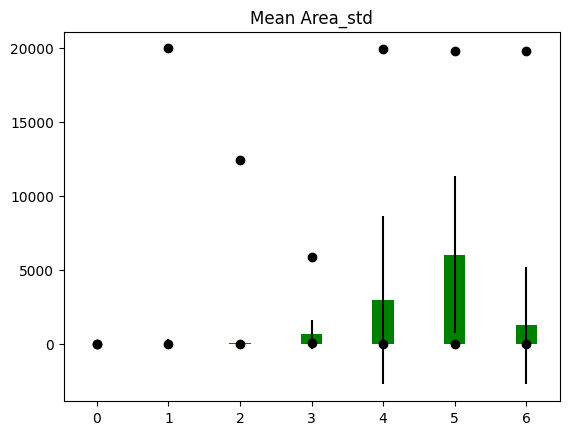

X_mean
[100.01366914967764, 100.00001025227509, 100.52887885906634, 100.47236324184641, 101.59721922384897, 104.29120555544469, 102.4666840691242]
[0.5, 51.620000000000005, 0.9, 60.566874999999996, 35.126333333333335, 33.908, 55.580999999999996]
[199.5, 148.966, 197.363, 129.00243749999998, 168.534, 171.14524999999998, 147.825]
[3.1613179946917427, 0.73882580607232, 4.418496706521255, 6.496939007140288, 18.631888737468653, 20.05824223228936, 14.371449730852222]


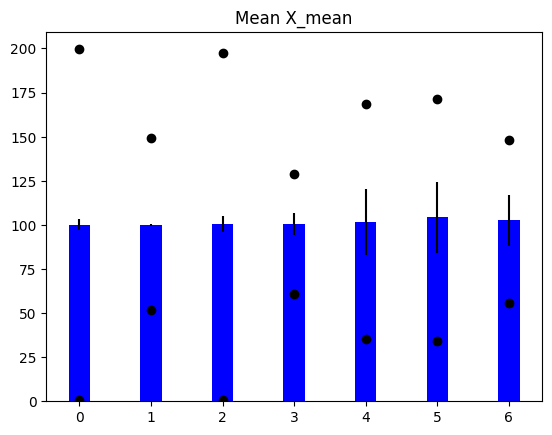

X_std
[0.001411834473296884, 0.01126609837576316, 59.49736271262685, 63.1136168238868, 12.044004896903676, 60.052035727123624, 54.915026161005095]
[0.0, 0.0, 0.0, 53.71601225566769, 0.0, 0.0, 0.0]
[10.803357389667756, 49.134, 84.19005133736111, 79.70878419818573, 86.06471689746037, 87.29389408566901, 74.69381091864989]
[0.12349315411592494, 0.7421613570744949, 2.6675015238502007, 3.4433482226356396, 23.653694334567742, 14.976497577883668, 19.792691231410405]


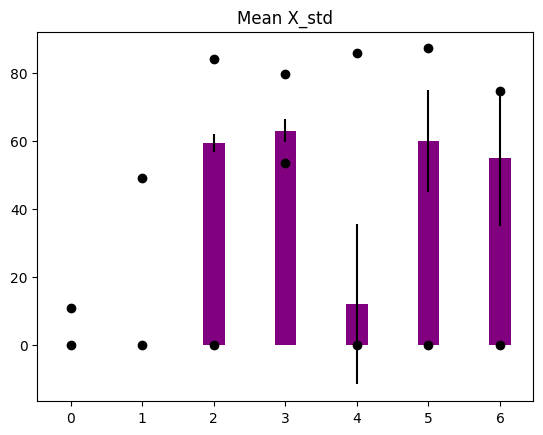

Y_mean
[100.01613098971946, 100.01101215297776, 99.54816750588182, 99.83458400187942, 101.55300250583325, 101.64849338446652, 102.5715412437251]
[0.5, 99.441, 0.5, 65.93741176470587, 35.556000000000004, 27.562250000000002, 51.076499999999996]
[192.72233333333335, 148.9655, 189.709, 138.1048888888889, 172.91875, 176.63216666666665, 161.343]
[2.8291043195258867, 0.7332243471958633, 4.676312283116274, 7.237283948947131, 17.6011152025042, 21.443446723566584, 16.863660642960674]


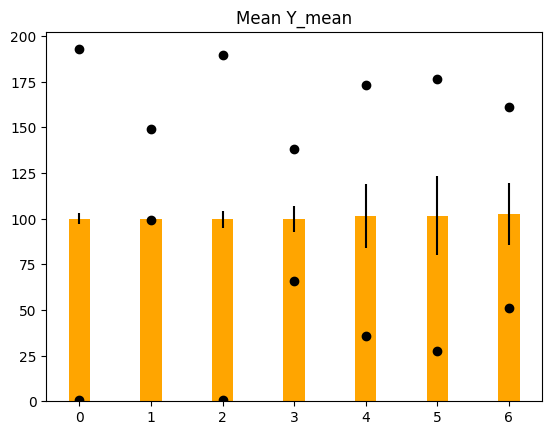

Y_std
[0.001221979857357512, 0.011181142725492454, 59.86844865044722, 64.97675345727473, 11.803701472432591, 62.653935757011354, 53.730122052035945]
[0.0, 0.0, 0.0, 42.23062450637389, 0.0, 0.0, 0.0]
[9.350589868499682, 49.134499999999996, 88.21098371644102, 82.65981207267531, 80.4423735163098, 89.17235376001938, 74.70723222673688]
[0.10688657183643815, 0.7366132684741291, 2.930410015243007, 4.585577227005719, 23.442250657660885, 15.628113905682833, 18.850956945961702]


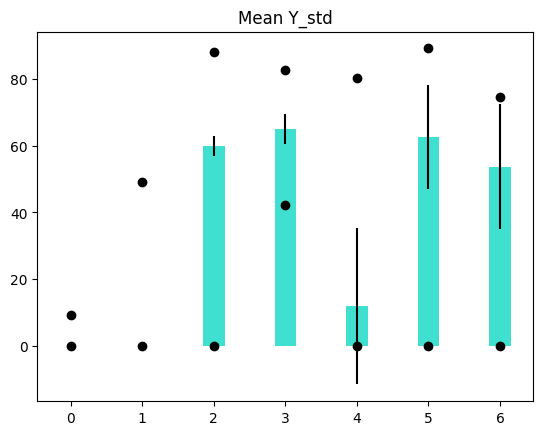

Perim._mean
[799.0780703955393, 797.5712668471373, 26.83495218799153, 96.70982637862, 850.8474435144107, 319.1832753706681, 217.8465851697146]
[2.828, 403.31350000000003, 2.828, 26.208571428571428, 216.22444444444443, 50.922309523809524, 20.94321238938053]
[800.0, 841.941, 283.59399999999994, 410.9395, 2118.043, 1825.443, 1328.032]
[26.87849343012623, 5.955689497480887, 17.90185836237672, 64.42314982931671, 240.66362827038367, 245.41976891024245, 292.10728656538294]


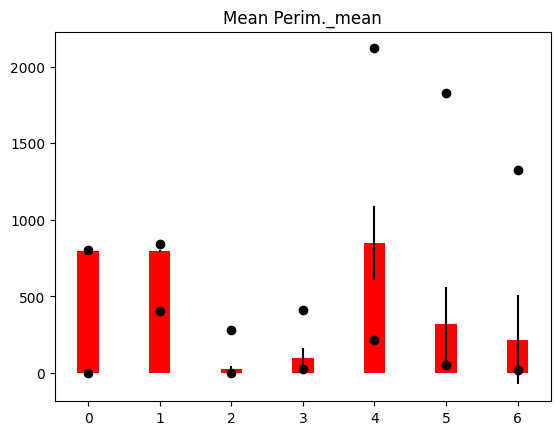

Perim._std
[0.00015093236249002327, 0.089033463886649, 7.19633806044026, 150.0920370839558, 141.4888630336021, 448.989572804394, 92.82060996043651]
[0.0, 0.0, 0.0, 17.84907157874438, 0.0, 0.0, 0.0]
[1.1549344377736581, 390.2425, 750.3150426959843, 917.7153681885804, 1065.3174999999999, 1348.0974466352573, 426.11249999999995]
[0.01320205297051251, 5.86535139836695, 15.415192825881585, 187.21233400445385, 271.66384122573686, 308.3748036838371, 104.67056165133351]


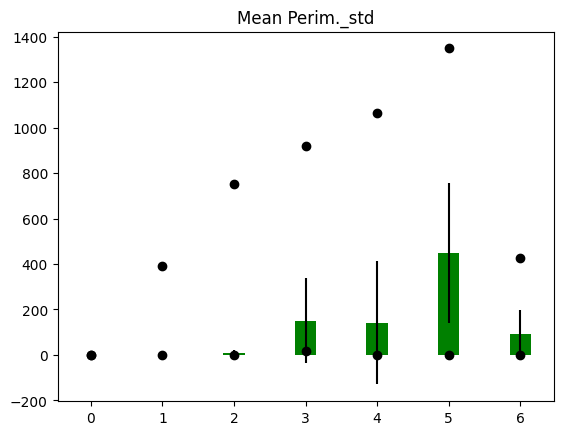

BX_mean
[0.12824533890921763, 0.011289022002073493, 96.42791138247182, 90.10764952801877, 14.62801685891748, 79.57509962230431, 76.61411123884113]
[0.0, 0.0, 0.0, 39.0, 0.0, 0.0, 0.0]
[199.0, 98.0, 194.0, 116.75, 140.0, 142.75, 110.90243902439025]
[4.857069202136541, 1.0517588669392992, 4.981444189972005, 7.313241045307805, 32.953337058809176, 25.490665799181592, 31.43082890747045]


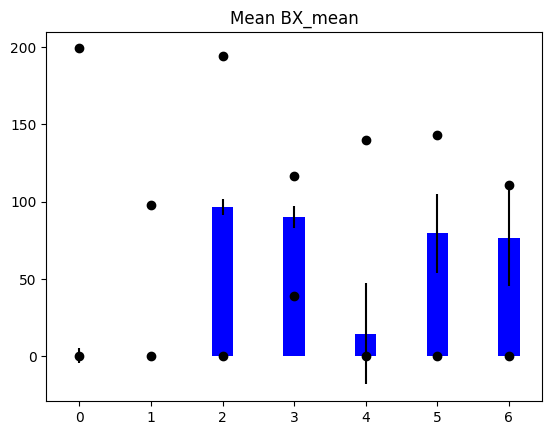

BX_std
[0.0014088657979435641, 0.011289022002073493, 59.511176614459245, 63.822509817408346, 14.795281132316214, 66.34760757677074, 57.79788279086482]
[0.0, 0.0, 0.0, 47.751963310423164, 0.0, 0.0, 0.0]
[10.780641085864152, 98.0, 83.95832299420945, 84.01760933093699, 98.5, 97.5, 95.5]
[0.12323348409804276, 1.0517588669392992, 2.6781487747982617, 4.306153417490651, 32.30044337541207, 17.35592984191815, 21.593661561643316]


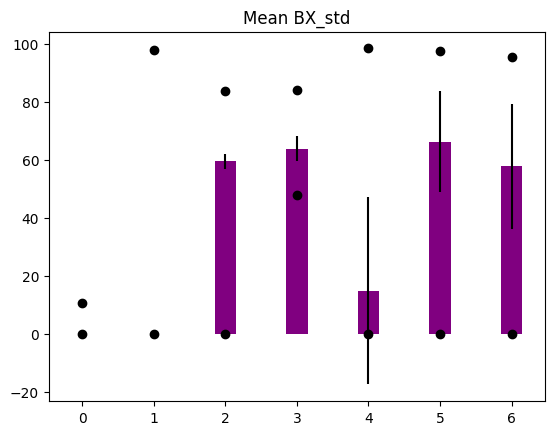

BY_mean
[0.13081547307893363, 0.02229005874899205, 95.461888202215, 89.45892633675759, 14.48122350389431, 76.9041946330304, 78.30192772185575]
[0.0, 0.0, 0.0, 46.07142857142857, 0.0, 0.0, 0.0]
[192.0, 98.0, 179.0, 117.0625, 146.0, 154.0, 136.4]
[4.699629809795407, 1.4684775513486372, 5.1825258991060945, 7.300351414305492, 32.65517960376276, 27.084927833007406, 31.7583764251794]


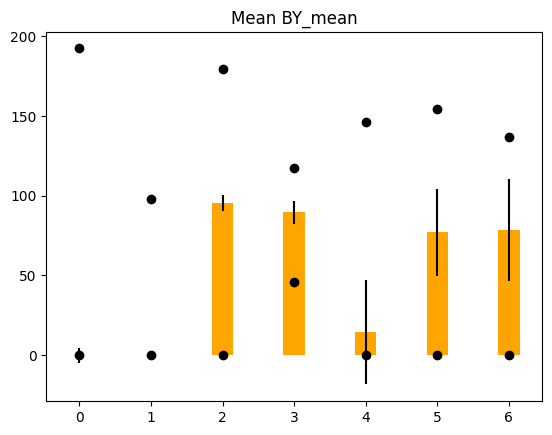

BY_std
[0.0012024894356022183, 0.02229005874899205, 59.84343976310323, 65.8456182805985, 14.631586341929246, 67.65728227003262, 56.88807095896733]
[0.0, 0.0, 0.0, 48.26780098828719, 0.0, 0.0, 0.0]
[9.201449161228174, 98.0, 87.20983634634086, 85.47098923026455, 98.5, 97.5, 95.5]
[0.10518174474577342, 1.4684775513486372, 2.9761363927631934, 5.3472050032395, 31.78810712803944, 20.06986544292665, 21.753265889547976]


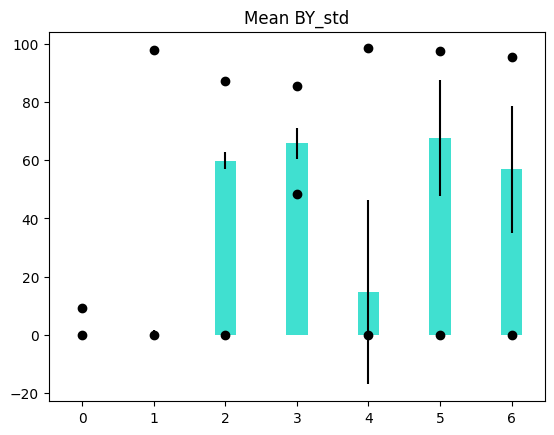

Width_mean
[199.77034326537725, 199.9775371500979, 8.197225316244868, 20.732647893341934, 173.84740132768084, 49.4749729767296, 50.41039583400641]
[1.0, 102.0, 1.0, 7.8765432098765435, 33.625, 14.325396825396826, 6.619469026548672]
[200.0, 200.0, 50.55555555555556, 56.0, 200.0, 200.0, 200.0]
[6.6962075822705875, 1.4797570350833265, 4.962549942599935, 7.440604258441868, 49.52154971260722, 33.66670983831023, 54.865536813534526]


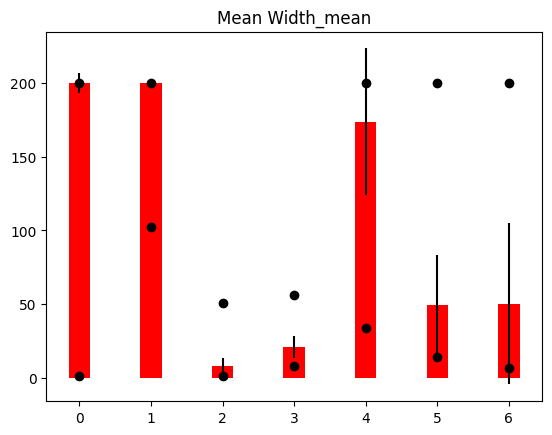

Width_std
[6.160539999882798e-05, 0.022462849902085014, 2.337091616866213, 19.085794304843247, 20.079192957185164, 48.766486745759856, 24.333905395876712]
[0.0, 0.0, 0.0, 5.222545134219732, 0.0, 0.0, 0.0]
[0.4714045207910317, 98.0, 74.93570577501757, 63.2033754372871, 99.5, 97.5, 95.5]
[0.0053886240209610374, 1.4797570350833265, 2.9714089918402586, 12.1781818749921, 37.43307595037198, 25.166566041122277, 24.85385909784971]


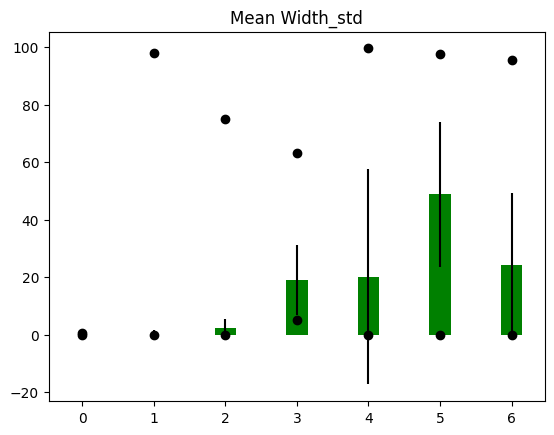

Height_mean
[199.77029970378115, 199.97770994125102, 8.170880587949327, 20.775227303545762, 174.0647840053896, 49.368167985755115, 49.13440917808004]
[1.0, 102.0, 1.0, 7.709163346613546, 32.5, 15.264957264957266, 6.327433628318584]
[200.0, 200.0, 49.0, 62.375, 200.0, 200.0, 200.0]
[6.697497288404312, 1.4684775513486372, 4.874378527222026, 6.948000073716413, 49.12399963677207, 33.85558772870877, 55.075953841067566]


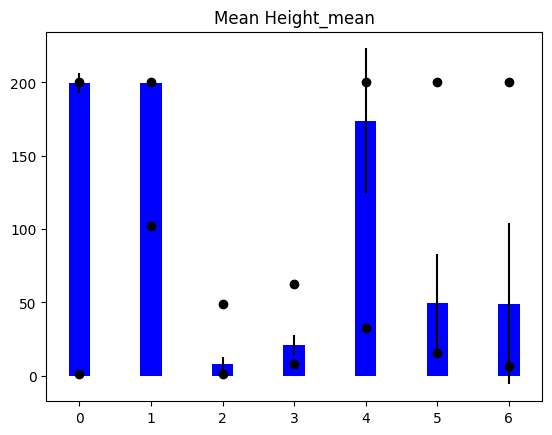

Height_std
[6.160539999882798e-05, 0.02229005874899205, 2.3754394671675, 19.793643325178923, 19.912588763194297, 49.170958249416934, 23.326727426799884]
[0.0, 0.0, 0.0, 5.000964525935727, 0.0, 0.0, 0.0]
[0.4714045207910317, 98.0, 75.57512818381456, 66.7325585827488, 98.5, 98.0, 98.0]
[0.0053886240209610374, 1.4684775513486372, 2.9593889502089605, 11.57597742039354, 37.13263522213081, 24.93548094435588, 24.766609181305924]


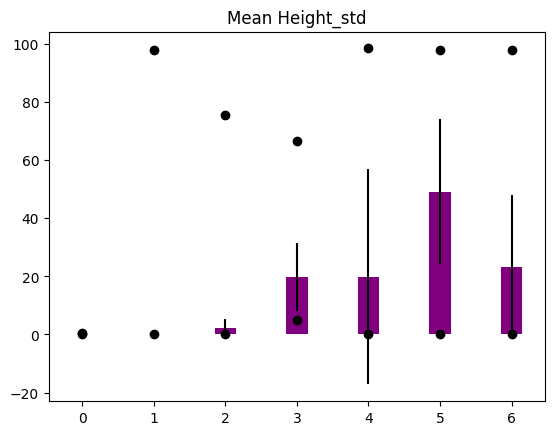

Major_mean
[225.41710855549744, 225.65110643935026, 9.310631125147548, 22.704756968161686, 181.08071253861448, 53.552848400304114, 52.079147066045664]
[1.128, 115.34349999999999, 1.128, 9.478549800796813, 30.959375, 18.49785, 7.699380530973451]
[225.676, 226.771, 61.92222222222222, 53.60127272727272, 226.572, 225.245, 225.148]
[7.548723220583026, 1.6533120062942344, 5.937585878441341, 6.581444673894192, 55.798750708863594, 36.346855435254724, 54.57410436313245]


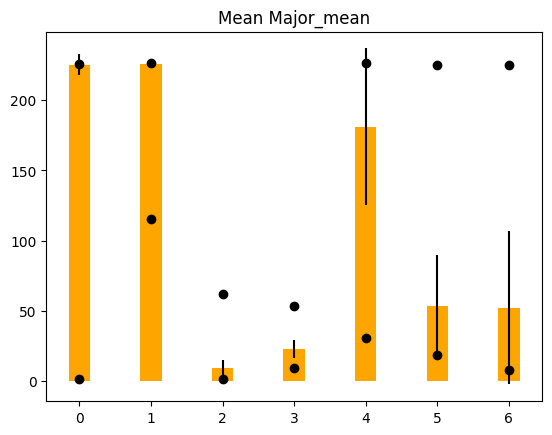

Major_std
[7.310661189996562e-05, 0.025202626425527012, 2.4527994687137653, 16.167973774374612, 18.571221510770428, 46.33091422608161, 19.67844609573286]
[0.0, 0.0, 0.0, 5.048998992019526, 0.0, 0.0, 0.0]
[0.5594117942585369, 110.68449999999999, 74.98271361693975, 45.23144375020982, 110.41799999999999, 109.30049999999999, 108.438]
[0.0063946349667841716, 1.6603359340858799, 3.4009229284102767, 7.538408902610785, 35.062126807991284, 24.840625897249357, 22.08562818235341]


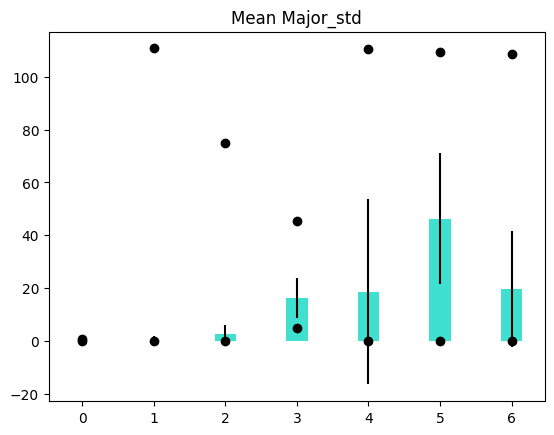

Minor_mean
[225.41571593483184, 225.65002626425525, 7.390693191693782, 11.916125214109979, 179.00290441190967, 40.02135557036718, 35.319151169286364]
[1.128, 114.5145, 1.128, 4.443151394422312, 26.504749999999998, 10.174666666666665, 5.832327433628319]
[225.676, 225.676, 48.5034, 30.81772727272727, 225.665, 223.277, 223.553]
[7.587624591970928, 1.679354268791917, 3.8813133901035113, 3.9415585142211285, 57.74331536668506, 37.08306532165296, 54.057873244581664]


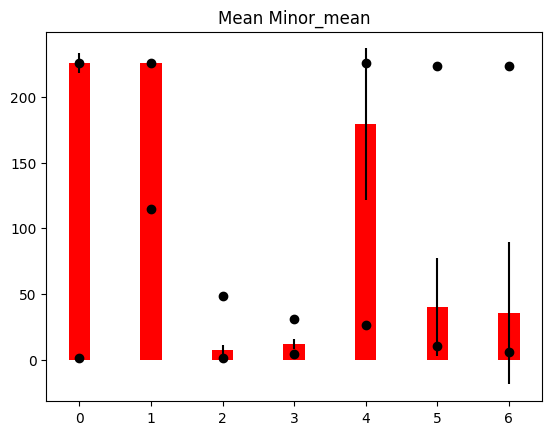

Minor_std
[3.0001829799429232e-05, 0.025258725953231195, 1.7477229973834625, 8.100604445057861, 18.806383324828168, 38.85413575488387, 9.885298250894547]
[0.0, 0.0, 0.0, 1.6612919121748824, 0.0, 0.0, 0.0]
[0.22957400162523248, 110.41550000000001, 75.01930835351656, 45.27717231630084, 110.141, 109.4595, 109.827]
[0.0026242598982080265, 1.663957696034394, 1.732941818092579, 7.6004111672918295, 35.546807199834355, 28.62832992062473, 21.246439019721134]


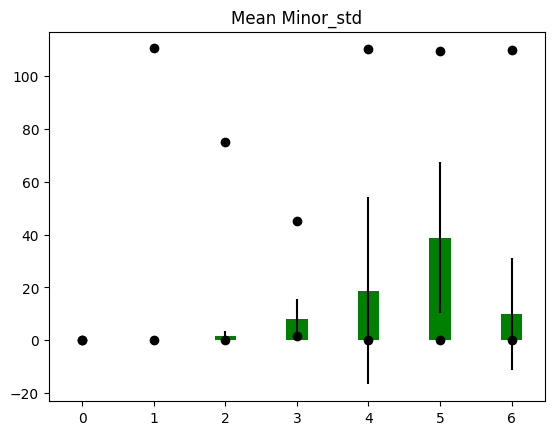

Angle_mean
[0.04300522739153163, 0.1336000460776408, 64.9636639135088, 84.58448539537399, 91.16275408697295, 87.61046463981437, 84.58133923616373]
[0.0, 0.0, 0.0, 61.999058823529424, 0.079, 11.427, 33.426]
[135.0, 141.297, 145.3615, 131.35755555555554, 179.82, 176.667, 154.3725]
[1.996584308425826, 3.7127293312117726, 18.04115552449841, 8.90058513073513, 46.34814778230066, 22.621711607720737, 25.575577072815506]


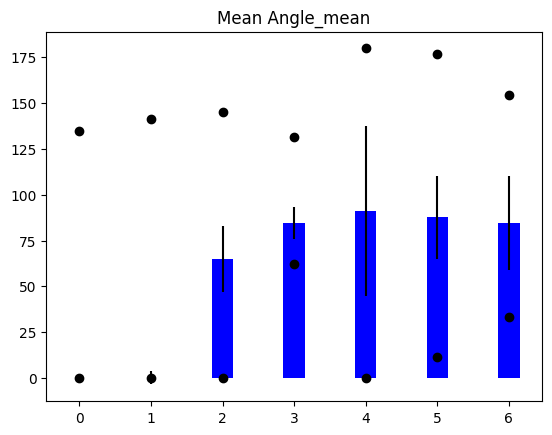

Angle_std
[0.002772242999947259, 0.0023989171754406173, 54.712633584868335, 54.48505597213051, 6.6122531014755195, 48.4550476538252, 47.012628779667125]
[0.0, 0.0, 0.0, 32.33576870413784, 0.0, 0.0, 0.0]
[21.213203435596427, 20.7845, 86.4195, 73.51929472506349, 84.22066028000492, 83.99658917456114, 84.10172012641728]
[0.24248808094324675, 0.2230644771763926, 6.036512672184713, 4.653234808432621, 16.011688737114675, 16.321890680764636, 20.084940171038177]


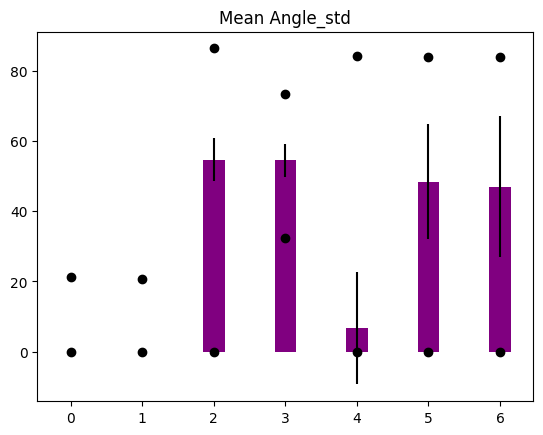

Circ._mean
[0.7852138003136435, 0.7900108282455935, 0.9582188239800723, 0.7029946408607303, 0.5578124301653029, 0.6558979579867106, 0.6740501239914098]
[0.773, 0.708, 0.46, 0.45725000000000005, 0.07, 0.123, 0.176]
[1.0, 0.8985000000000001, 1.0, 0.879941798941799, 0.8305, 0.8506, 0.9678749999999999]
[0.006703119545577265, 0.0016131972910752488, 0.04612657571408133, 0.07919049029347731, 0.18251099152303188, 0.10787501707225561, 0.22555450660182494]


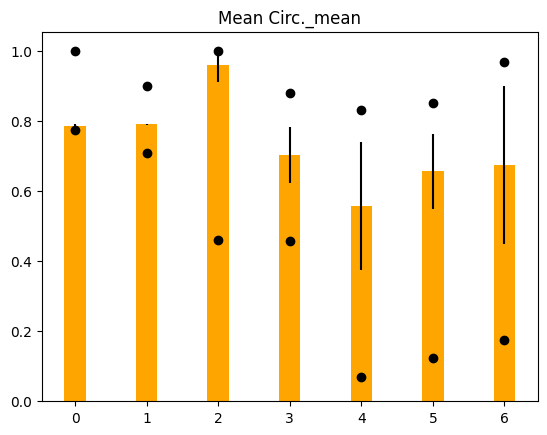

Circ._std
[0.0, 1.808547402372998e-05, 0.05390929114926134, 0.2613022700730649, 0.06373603129421375, 0.24783708767132928, 0.18404555509679993]
[0.0, 0.0, 0.0, 0.14832846793518767, 0.0, 0.0, 0.0]
[0.0, 0.10149999999999998, 0.28946847167480955, 0.3998669531818222, 0.43649999999999994, 0.4369919907732863, 0.38951272123000036]
[0.0, 0.001241474118326157, 0.03964505074520438, 0.04601221355675483, 0.12510326592362825, 0.07159184001343358, 0.10373262348549374]


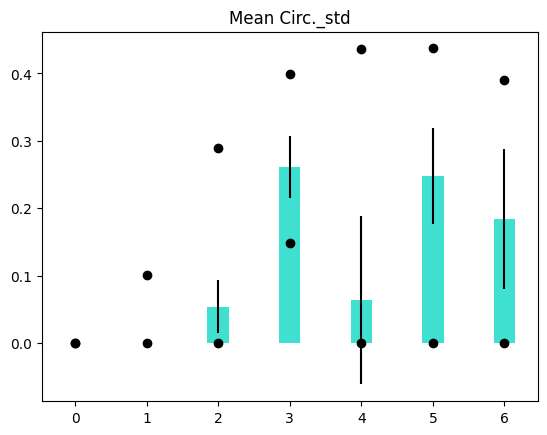

Feret_mean
[282.518131251089, 282.81136700840915, 10.10247126694151, 27.12055566816143, 245.46383919246438, 67.22755309721036, 69.80778477182322]
[1.414, 144.25, 1.414, 10.74660173160173, 44.100625, 19.89210317460317, 8.252778761061947]
[282.843, 282.843, 66.0986, 73.74254545454545, 282.843, 282.843, 282.843]
[9.472309529453945, 2.0839115593636173, 6.139610764195898, 9.461791242588797, 70.16486545343601, 48.01518696219964, 76.98526445211238]


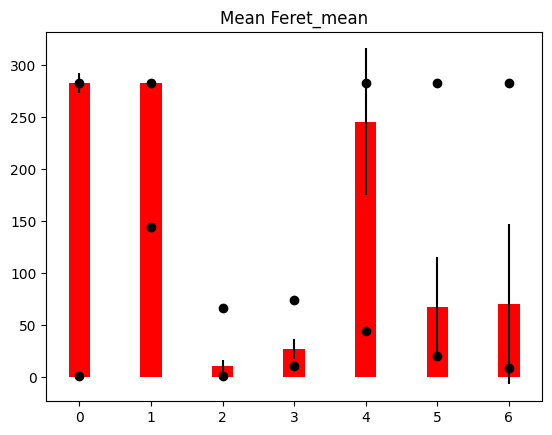

Feret_std
[7.577143644652739e-05, 0.03163299159083055, 2.5042814740942, 24.260603637143422, 27.918855873528333, 65.67632201301787, 31.044309661438458]
[0.0, 0.0, 0.0, 6.102407727703774, 0.0, 0.0, 0.0]
[0.5798030316888275, 138.59300000000002, 105.5983964889619, 82.38604479994035, 139.3, 137.36200000000002, 136.8115]
[0.0066277271561624145, 2.0839115593636173, 3.7264463860308754, 15.307581444130525, 52.10879379811, 35.72088405870053, 33.24961184267572]


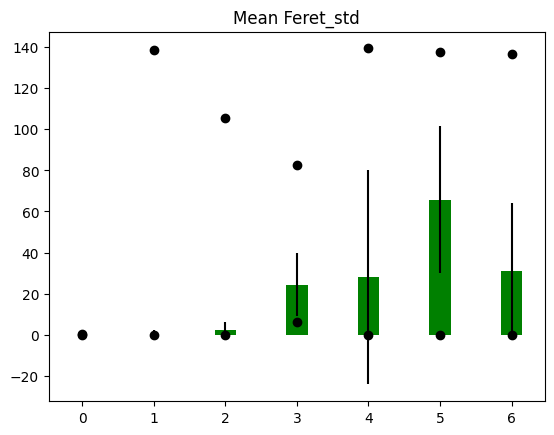

IntDen_mean
[15.729221118661787, 10198810.391659947, 19540.651897210915, 91065.11955409693, 7455524.996986838, 1182331.8094056782, 1039538.4893194337]
[0.0, 5091457.5, 255.0, 10019.163346613546, 586755.0, 44550.119047619046, 9161.946902654867]
[98430.0, 10200000.0, 1612875.0, 563709.375, 10199490.0, 10069695.0, 10080405.0]
[1136.7333489458358, 77522.6620680021, 34864.29058390371, 87940.68281165753, 2821196.474275284, 1720706.8591987977, 2367997.041158764]


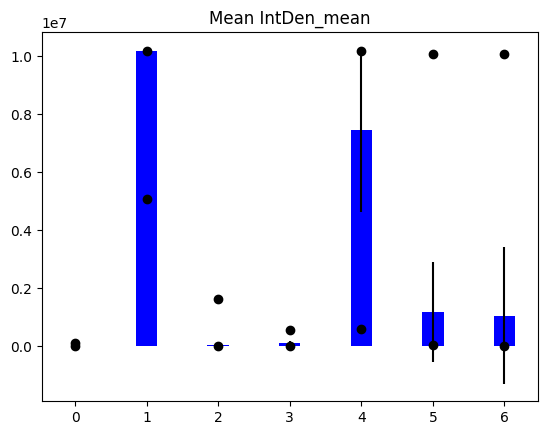

IntDen_std
[0.027209439118736297, 1171.1905310448105, 10658.973257090063, 166224.90257507152, 753468.1340695313, 1531030.8394690864, 315827.4787830729]
[0.0, 0.0, 0.0, 7793.310770878131, 0.0, 0.0, 0.0]
[208.20662813657015, 5089162.5, 3167120.4204655685, 1493528.940417962, 5073607.5, 5046577.5, 5052570.0]
[2.3800094997336076, 77152.08432446765, 46969.583993503315, 249005.6904750711, 1454173.9101288742, 1352458.0687222173, 1005754.1756291945]


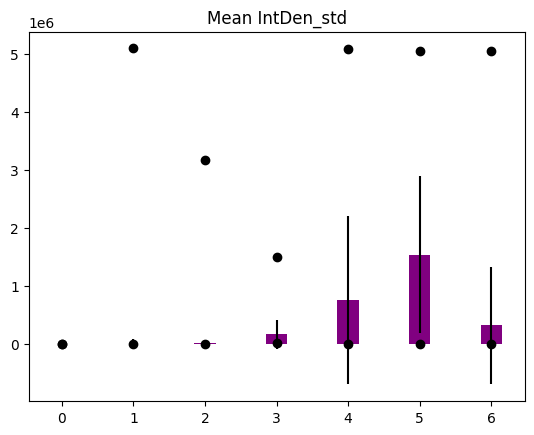

%Area_mean
[0.11761630946157867, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[0.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[3.427505995604749, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


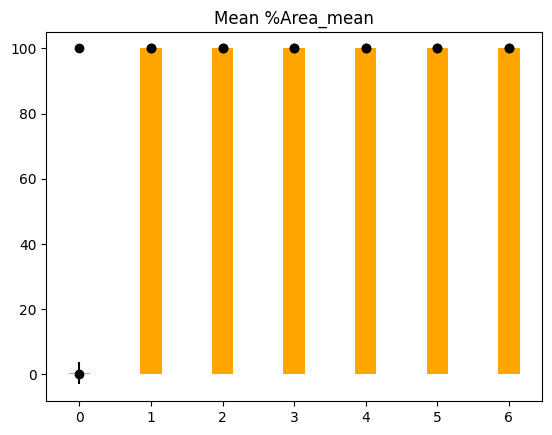

%Area_std
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


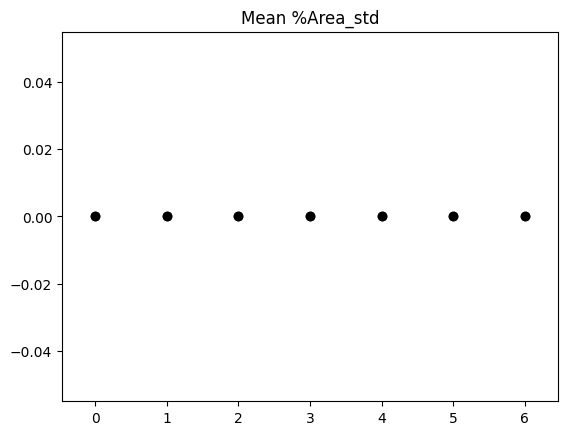

RawIntDen_mean
[15.729221118661787, 10198810.391659947, 19540.651897210915, 91065.11955409693, 7455524.996986838, 1182331.8094056782, 1039538.4893194337]
[0.0, 5091457.5, 255.0, 10019.163346613546, 586755.0, 44550.119047619046, 9161.946902654867]
[98430.0, 10200000.0, 1612875.0, 563709.375, 10199490.0, 10069695.0, 10080405.0]
[1136.7333489458358, 77522.6620680021, 34864.29058390371, 87940.68281165753, 2821196.474275284, 1720706.8591987977, 2367997.041158764]


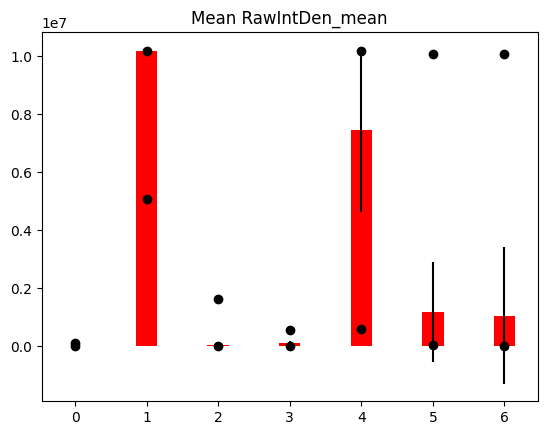

RawIntDen_std
[0.027209439118736297, 1171.1905310448105, 10658.973257090063, 166224.90257507152, 753468.1340695313, 1531030.8394690864, 315827.4787830729]
[0.0, 0.0, 0.0, 7793.310770878131, 0.0, 0.0, 0.0]
[208.20662813657015, 5089162.5, 3167120.4204655685, 1493528.940417962, 5073607.5, 5046577.5, 5052570.0]
[2.3800094997336076, 77152.08432446765, 46969.583993503315, 249005.6904750711, 1454173.9101288742, 1352458.0687222173, 1005754.1756291945]


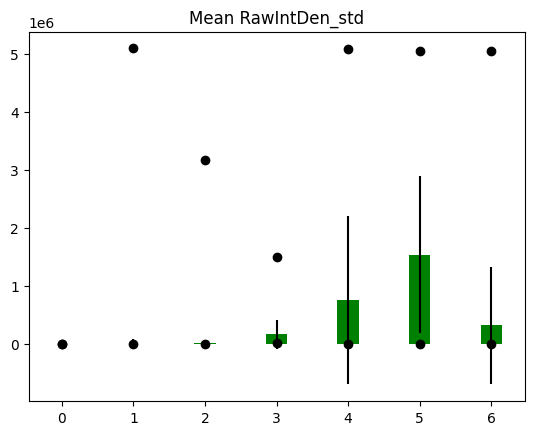

FeretX_mean
[0.12824533890921763, 0.011289022002073493, 97.23331462007995, 91.57265080909698, 14.92771615892734, 81.41462139025026, 77.8541821305791]
[0.0, 0.0, 0.0, 47.5, 0.0, 0.0, 0.0]
[199.0, 98.0, 196.0, 118.8125, 140.75, 145.5, 113.05555555555556]
[4.857069202136541, 1.0517588669392992, 4.836204161761171, 7.088672110969767, 33.31539090735497, 25.78356611122214, 31.288034708243778]


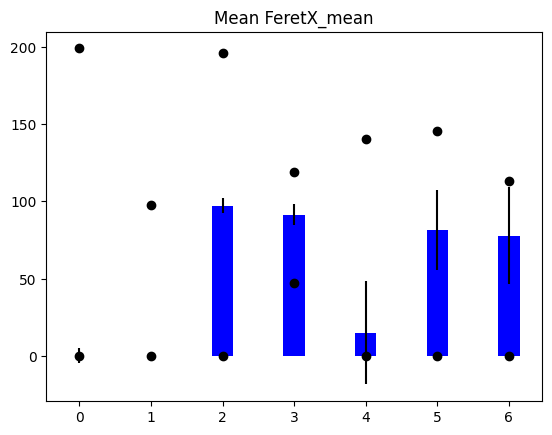

FeretX_std
[0.0014088657979435641, 0.011289022002073493, 59.62446184076268, 64.02478938360163, 14.884580343054315, 66.72926788519445, 58.055687095849734]
[0.0, 0.0, 0.0, 53.54437412091022, 0.0, 0.0, 0.0]
[10.780641085864152, 98.0, 84.83623930844648, 84.19251846387098, 99.0, 98.5, 95.5]
[0.12323348409804276, 1.0517588669392992, 2.7084702249688015, 4.258294122884431, 32.36534622481068, 17.408574857294788, 21.405945646412604]


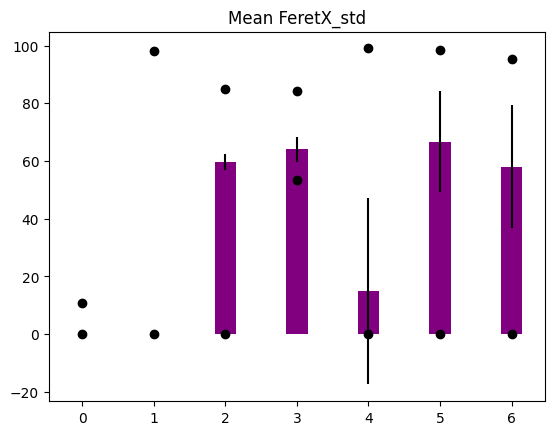

FeretY_mean
[0.13456177034326536, 0.08011749798410321, 98.10930925449222, 98.56998233364814, 47.961179302638925, 97.77370259307128, 97.50111189407775]
[0.0, 0.0, 0.0, 59.57142857142857, 0.0, 0.0, 0.0]
[200.0, 200.0, 190.0, 146.11111111111111, 200.0, 200.0, 200.0]
[4.8472605133660105, 3.855836153583867, 4.766475582724826, 7.684856519314022, 75.45377677133006, 32.77411155503525, 39.153034460840615]


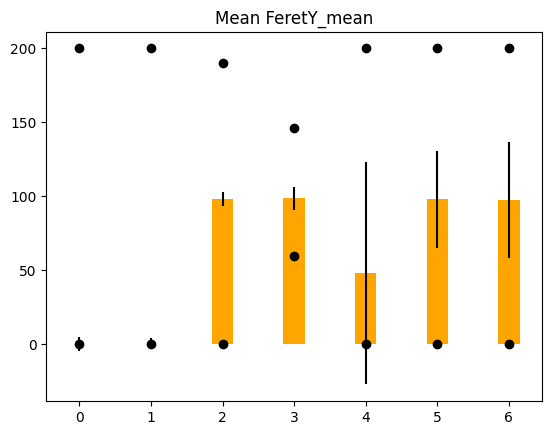

FeretY_std
[0.0012640371256792916, 0.011001036746918557, 60.08036915466031, 66.29594280585133, 14.376164990088729, 68.50711442982376, 55.36877854884429]
[0.0, 0.0, 0.0, 40.54748778200813, 0.0, 0.0, 0.0]
[9.672412085697939, 95.5, 90.50966799187809, 91.57449911896263, 100.0, 100.0, 87.52650392246277]
[0.11056532088017551, 1.024928283599011, 3.0585404795109774, 5.664107113225091, 31.78180758358223, 20.640015796711342, 22.936546999911307]


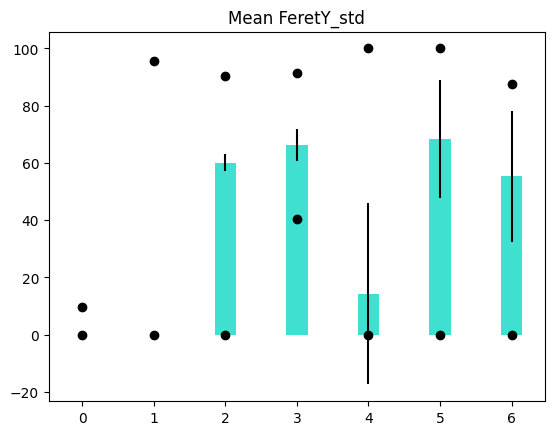

FeretAngle_mean
[134.97278437009933, 134.96824616979612, 109.37965294069429, 96.6987215538903, 115.95785338903677, 96.88181289039045, 104.028113063456]
[40.601, 45.0, 12.955000000000002, 75.12968181818181, 37.48166666666667, 36.298500000000004, 45.0]
[153.435, 135.0, 167.196, 122.8991, 158.55499999999998, 154.02474999999998, 139.4755]
[1.5445240315657074, 1.673885351343709, 10.761464058188983, 7.1893976719760575, 33.95953139280587, 19.76927938261149, 21.253901716856507]


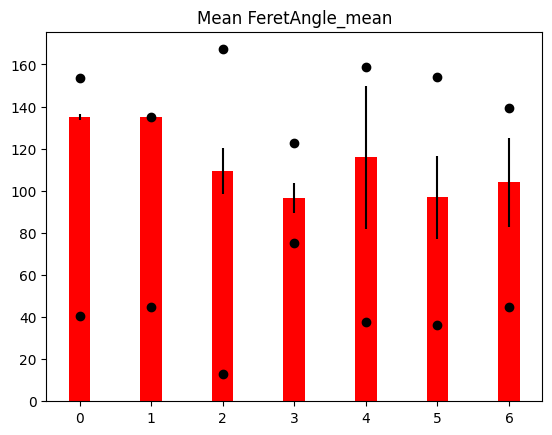

FeretAngle_std
[0.006190959332320708, 0.0006514226471604655, 39.24423729201739, 48.6121399435685, 5.421297278303478, 42.94239639875193, 38.951211956681945]
[0.0, 0.0, 0.0, 33.45042102663844, 0.0, 0.0, 0.0]
[47.373220810918056, 5.655000000000001, 66.20205682773174, 60.02609098218594, 65.75563161348911, 64.4475, 74.16389216233642]
[0.5415231809479519, 0.06069077951573205, 8.707972198597885, 3.835093103862328, 13.392678222933142, 13.88941932668657, 16.6505265424258]


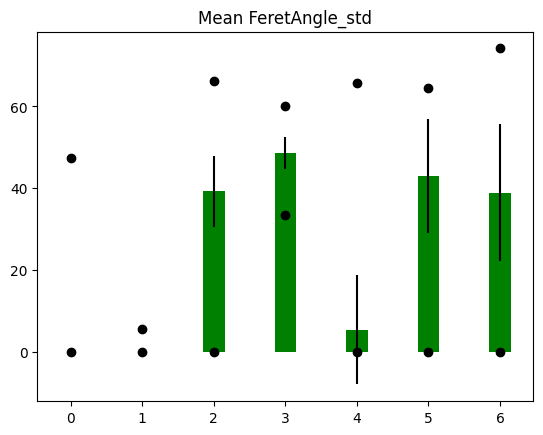

MinFeret_mean
[199.77016901899285, 199.9775371500979, 7.2992892906267866, 14.98903442153367, 173.51531847168818, 43.535357802866464, 39.372485328530615]
[1.0, 102.0, 1.0, 5.375183266932271, 31.125, 11.126714285714284, 5.629079646017699]
[200.0, 200.0, 49.0, 45.495777777777775, 200.0, 200.0, 200.0]
[6.701364915850115, 1.4797570350833265, 3.976873583006762, 5.7980757085881836, 50.169522451835796, 34.74110698859304, 54.534371543108364]


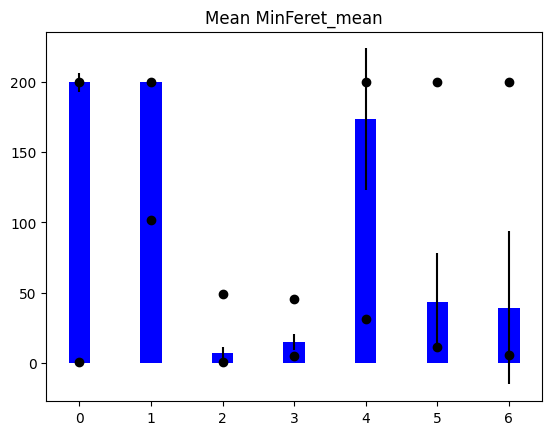

MinFeret_std
[6.160539999882798e-05, 0.022462849902085014, 1.8749592119365361, 14.017449372701462, 20.29373360926311, 45.87132978007624, 14.09327900541889]
[0.0, 0.0, 0.0, 2.9366753962973156, 0.0, 0.0, 0.0]
[0.4714045207910317, 98.0, 75.57512818381456, 60.98461482504727, 99.5, 98.0, 98.0]
[0.0053886240209610374, 1.4797570350833265, 2.0232346469371243, 11.897226740905435, 37.814269203436595, 28.214191532882737, 19.97319501208186]


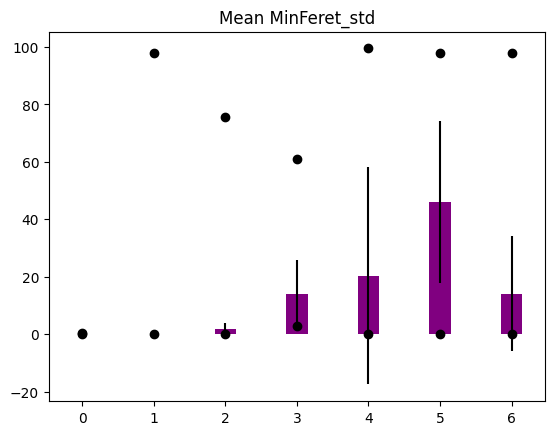

AR_mean
[1.000406037637219, 1.0000404331298238, 1.2551055346834434, 1.9675554307029128, 1.1150789514114825, 1.7254490263474926, 2.29302625141608]
[1.0, 1.0, 1.0, 1.4833333333333334, 1.0, 1.002, 1.004]
[2.0, 1.254, 4.141187500000001, 3.294459459459459, 3.4585, 2.7711666666666663, 9.612499999999999]
[0.01771430442960197, 0.00283625238805283, 0.16585482805066762, 0.2014638713396412, 0.2571614981552257, 0.28919310045124347, 1.3945288296107279]


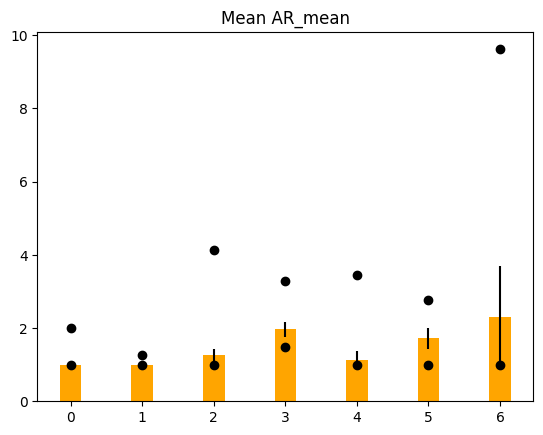

AR_std
[5.339791750398306e-05, 3.594055984333603e-05, 0.3156828910894868, 0.8808682126017415, 0.09673841000642218, 0.5878868764419508, 1.4884444934120564]
[0.0, 0.0, 0.0, 0.30473777434232063, 0.0, 0.0, 0.0]
[0.40860086474047835, 0.246, 5.603008031158792, 2.0643422039097468, 2.4495, 2.0576514660057366, 11.849577028316244]
[0.004670715569361341, 0.002733419116257613, 0.22162928571783946, 0.20654651346397426, 0.23547428950266155, 0.30035045992568243, 1.7895750034098228]


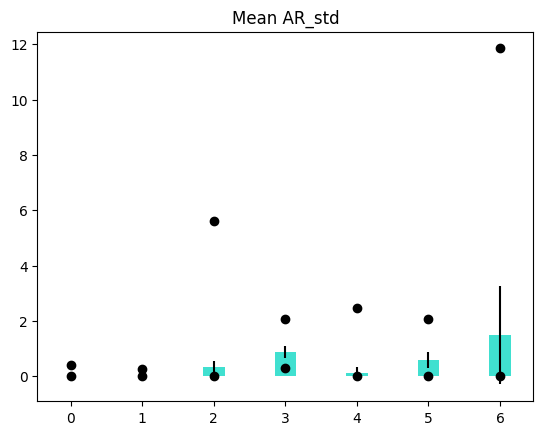

Round_mean
[0.9997694284718593, 0.999970164727566, 0.8425917874198924, 0.5963956932894511, 0.9400577171448289, 0.6558692262127939, 0.6541692753159689]
[0.5, 0.8295, 0.425, 0.40461111111111114, 0.5315, 0.47844444444444445, 0.29683333333333334]
[1.0, 1.0, 1.0, 0.7169032258064518, 1.0, 0.998, 0.996]
[0.00938676871990553, 0.001957348832672259, 0.06476438585684727, 0.04062745198478848, 0.1106796018017797, 0.09623205437168075, 0.17570144789199785]


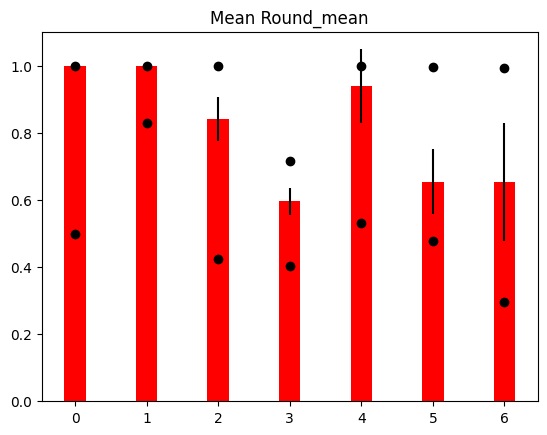

Round_std
[2.6993360514255998e-05, 2.534270245363437e-05, 0.1443176389392478, 0.20511074775873428, 0.04257139309994994, 0.17437997332738947, 0.196232471767039]
[0.0, 0.0, 0.0, 0.11940779799586886, 0.0, 0.0, 0.0]
[0.2065531946550869, 0.16249999999999998, 0.34756860833510267, 0.2996151030906153, 0.411, 0.33158441191078664, 0.35132072241756535]
[0.0023611091053113587, 0.0018498817543153292, 0.029793878973232546, 0.019345297635670968, 0.08399087873678028, 0.04840238667222031, 0.08023927346731474]


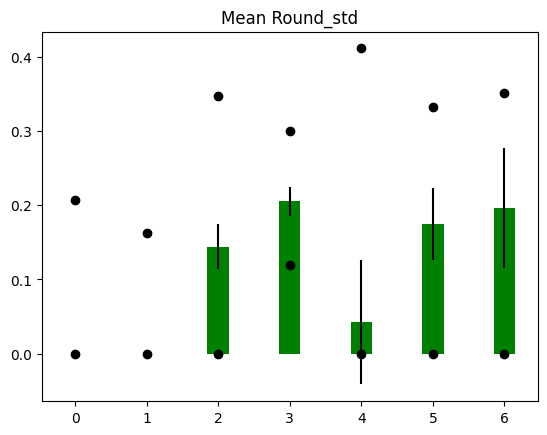

Solidity_mean
[0.9999767816692804, 0.9999967169680912, 0.9287224536410561, 0.8321605354568682, 0.8606847846626573, 0.8761654778023878, 0.8262627789129912]
[0.939, 0.9835, 0.7464705882352942, 0.6749615384615384, 0.497, 0.517, 0.4074]
[1.0, 1.0, 1.0, 0.9250465116279069, 1.0, 0.987, 0.988]
[0.0010466126619986778, 0.00018962747709743273, 0.02850242580347642, 0.049146786238919674, 0.11988527737504116, 0.054869979243106284, 0.14133725708909067]


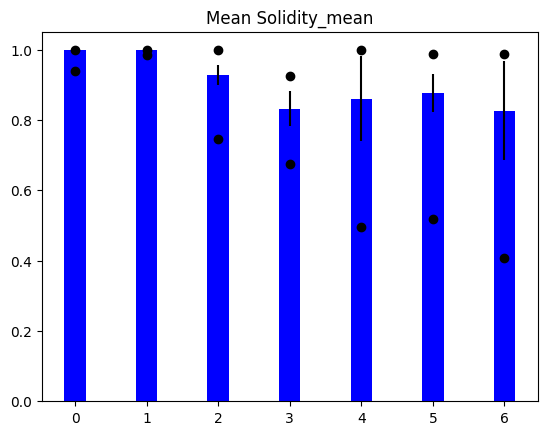

Solidity_std
[8.809572199832402e-06, 2.2462849902085035e-06, 0.03391196264975085, 0.1486971345349273, 0.026011618605510736, 0.10425032426970325, 0.12584030424751383]
[0.0, 0.0, 0.0, 0.0523252223013805, 0.0, 0.0, 0.0]
[0.06741084647311754, 0.015500000000000014, 0.1988144752163573, 0.2620646249970763, 0.2485, 0.2271304691141195, 0.3434501419420292]
[0.0007705732349974284, 0.00017179476958604923, 0.01974810145667683, 0.03887720014192455, 0.05640447722187487, 0.05230726161749622, 0.10976593415333576]


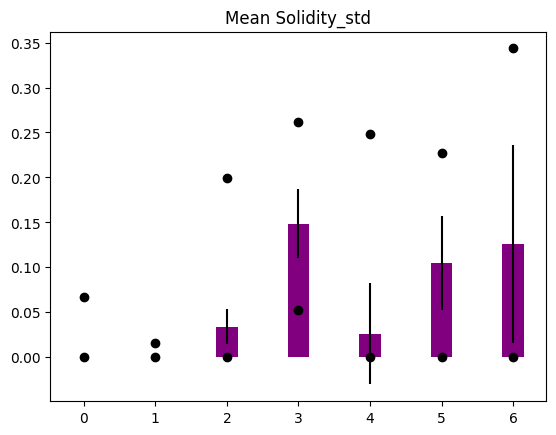

num_spots_inverted
[1.0, 0.0017279115309296164, 1.049451754385965, 10.688202247191011, 70.75465838509317, 27.803863298662705, 3.5074626865671643]
[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 2.0, 53.0, 89.0, 282.0, 165.0, 24.0]
[0.0, 0.044218933238996685, 0.6932235641934443, 13.730797669227137, 54.65895441897169, 27.862539624859043, 4.205089788483086]


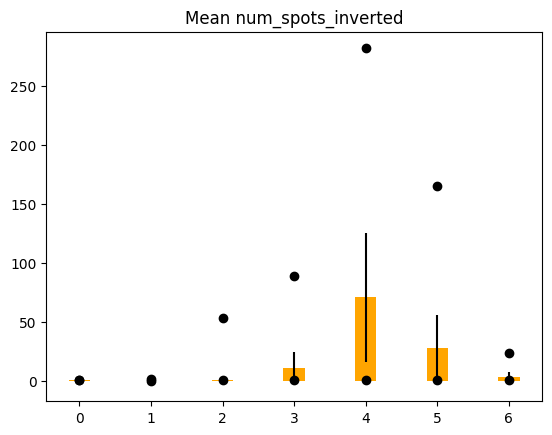

Mean_inverted
[254.99960350235233, 0.00041055177974887684, 211.13050142543858, 148.6842331460674, 43.96740786749483, 78.45902526002972, 186.25994029850747]
[252.539, 0.0, 42.693, 113.832, 0.013, 2.34, 2.002]
[255.0, 1.53, 254.994, 195.649, 138.108, 144.668, 242.333]
[0.028424065039297425, 0.018477353746709717, 38.11616039698895, 16.243893821784102, 38.21784459606054, 39.5244066138027, 67.20305013331104]


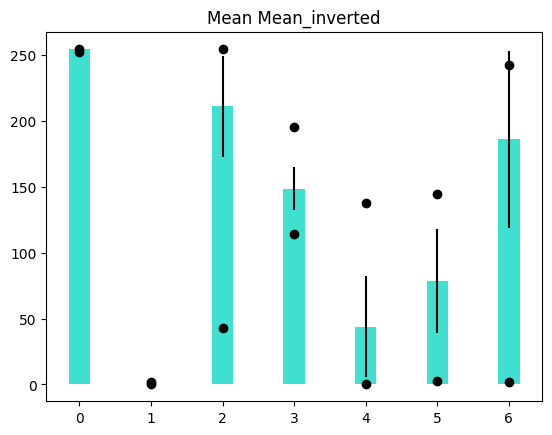

Median_inverted
[255.0, 0.0, 244.29111842105263, 230.64606741573033, 2.9037267080745344, 19.702823179791977, 213.13432835820896]
[255.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[255.0, 0.0, 255.0, 255.0, 255.0, 255.0, 255.0]
[0.0, 0.0, 51.14767500052823, 74.94757352089267, 27.05584376366446, 68.08831522069559, 94.46169491724382]


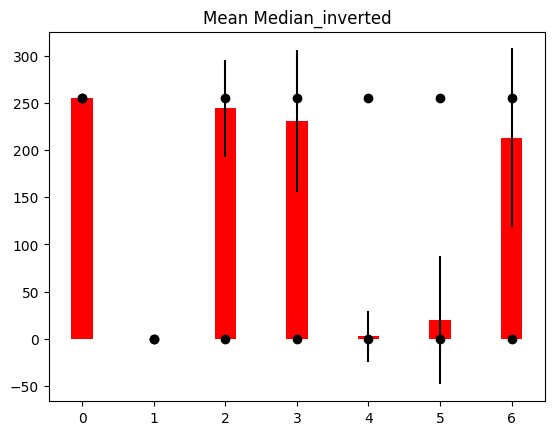

Area_inverted_mean
[39999.93779404077, 39935.55195254003, 32824.79697370604, 6427.809026977554, 131.09935355646513, 1476.6346122646223, 21029.338543879785]
[39614.0, 1.0, 158.0188679245283, 258.7792207792208, 2.0, 28.23076923076923, 52.333333333333336]
[40000.0, 40000.0, 39999.0, 30690.0, 3875.0, 17987.0, 38013.0]
[4.4582396092414465, 1603.5430768905283, 6770.745364087387, 6320.646138478361, 297.0649058549418, 2635.3021798091218, 15080.371954353492]


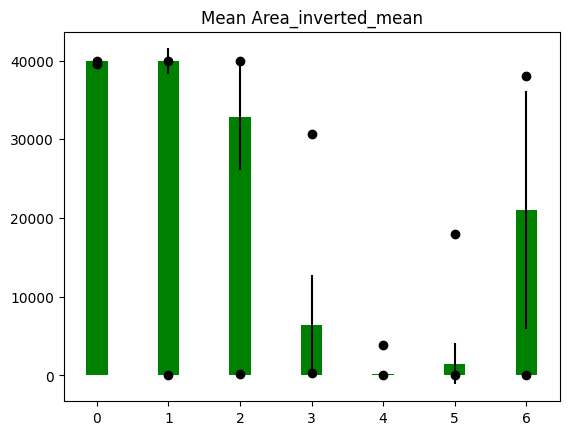

Area_inverted_std
[0.0, 0.003283031908766271, 250.3257720727135, 7111.22991854085, 73.76533295738147, 1835.6264966692593, 2210.3256622431572]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 28.5, 19550.0, 14287.0, 2150.431627743603, 9976.5, 13273.864571656088]
[0.0, 0.305868650079286, 1628.4049456154626, 4125.589308781999, 145.19489473389967, 2296.382351447527, 3453.2968895967438]


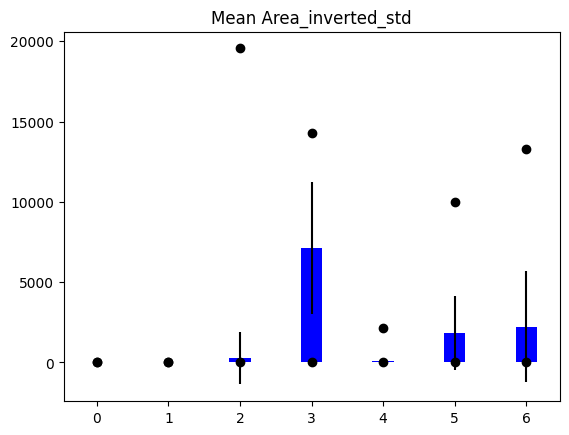

X_inverted_mean
[99.9998873497125, 99.99593266904733, 100.05177372585793, 96.29105106729445, 95.4858770420805, 96.91187577311065, 98.85077052264145]
[99.118, 0.5, 34.94475, 28.508999999999997, 0.9, 32.60725, 49.61033333333333]
[100.1, 199.1, 165.62925, 165.07666666666668, 199.1, 164.58033333333333, 138.58585714285715]
[0.010184195494945612, 3.7133518028883525, 6.7618355166599065, 29.029389601818586, 22.996754109198825, 18.985688789611356, 14.019175447514634]


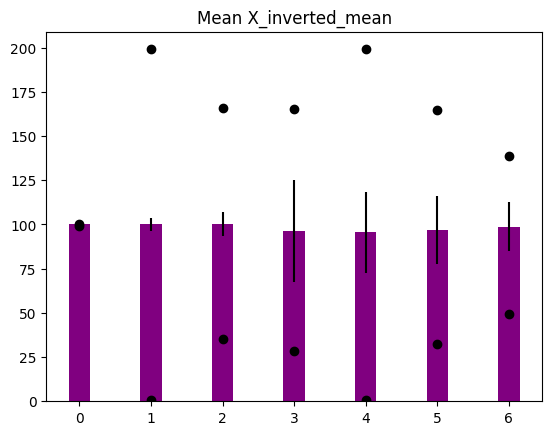

X_inverted_std
[0.0, 0.0007695541988250196, 1.2346667114084016, 56.79220390018728, 55.35030706644884, 62.28469072659847, 22.647763019218885]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 6.680499999999995, 80.45010341004851, 87.1379563417098, 99.231, 89.24696664234239, 82.54647997195278]
[0.0, 0.07169668480191822, 7.9514106015993935, 20.93695770744772, 16.693362604308195, 12.859330640879516, 27.71558365574638]


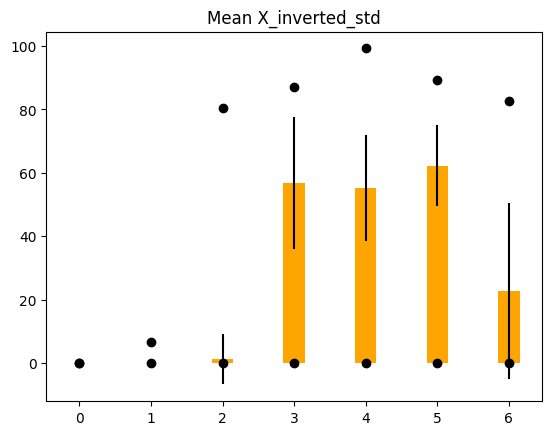

Y_inverted_mean
[99.99988003136436, 100.15364543255384, 99.86259649719338, 103.52328934835664, 99.84596875345152, 103.24348484732987, 101.7997601440531]
[99.117, 100.0, 29.6875, 21.3076, 1.864, 44.46866666666667, 47.23350000000001]
[100.075, 199.5, 165.33125, 165.79066666666665, 198.625, 170.3576, 163.2015]
[0.010193141796076272, 3.827664822528616, 5.966190943326506, 22.712847590106772, 20.631831881059906, 18.382316593013922, 16.029620383207476]


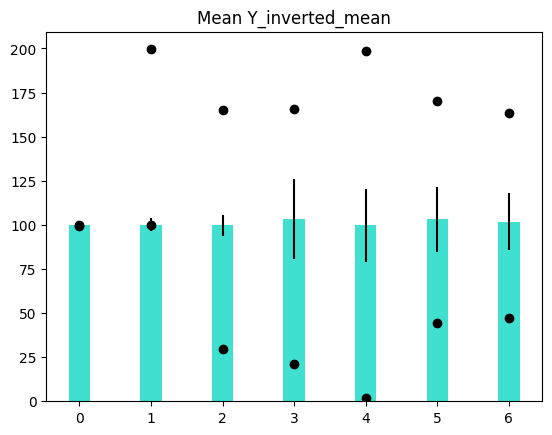

Y_inverted_std
[0.0, 0.0009748876857504889, 1.0842304390500705, 49.83776121443199, 55.29084104240622, 60.79469364956314, 25.012305273371297]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 8.462999999999994, 80.75012625927522, 83.86250089829582, 98.42, 85.3105500097145, 78.38545637744288]
[0.0, 0.09082689072354376, 7.453187815288973, 25.188080182849184, 16.208558601038938, 13.541648691336627, 28.794759863289773]


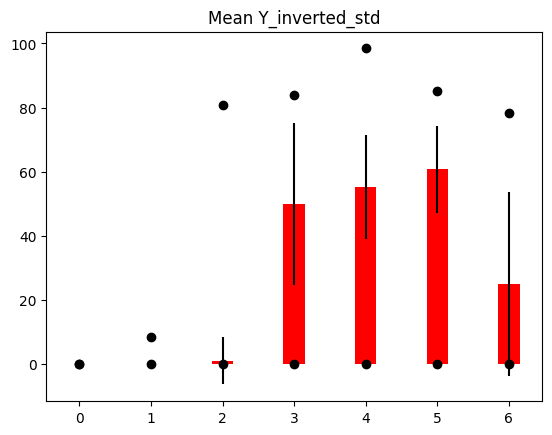

Perim._inverted_mean
[797.656303058024, 798.7497014168875, 909.1688820947114, 556.9179665806885, 40.02543924634838, 270.0341791194883, 716.2066362758718]
[790.042, 2.828, 71.20543396226415, 80.47187640449438, 4.243, 25.41023076923077, 41.506]
[800.142, 800.0, 2688.584, 3115.008, 738.056, 2341.305, 1685.921]
[0.09707435822951425, 31.12308815201662, 141.01292340954265, 422.35572638523644, 50.584064969405226, 332.46422091644894, 393.8027900654018]


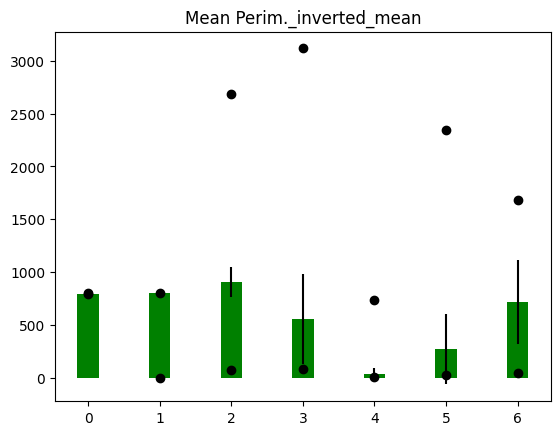

Perim._inverted_std
[0.0, 0.0022586107591291327, 17.239197241693322, 675.5338097693386, 16.39162056197992, 339.06211332363165, 136.06215336348646]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 19.607, 1416.308, 1402.139335762948, 232.418, 1316.5920312635044, 683.5203895287657]
[0.0, 0.21042689902121278, 108.68294979591299, 299.8093800308816, 20.443527357570684, 316.9876198176641, 206.61253991525882]


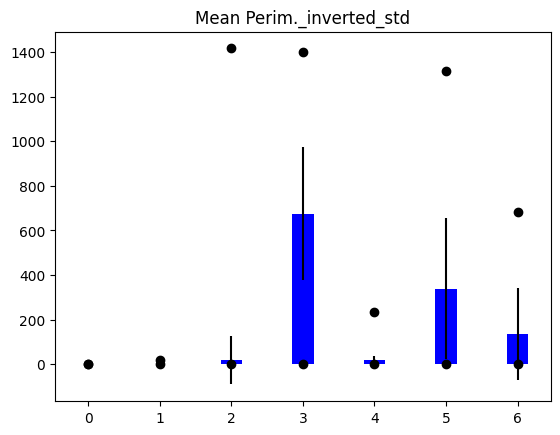

BX_inverted_mean
[0.0, 0.14969473562953578, 1.4308184015552745, 63.761033459877844, 89.96145421456511, 77.19250738468607, 26.59308528024507]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 198.0, 133.75, 136.625, 198.0, 130.33333333333334, 128.0]
[0.0, 5.286163337472649, 11.193196218931787, 36.310871201148764, 23.515653243963865, 24.783796553916883, 38.27599713268349]


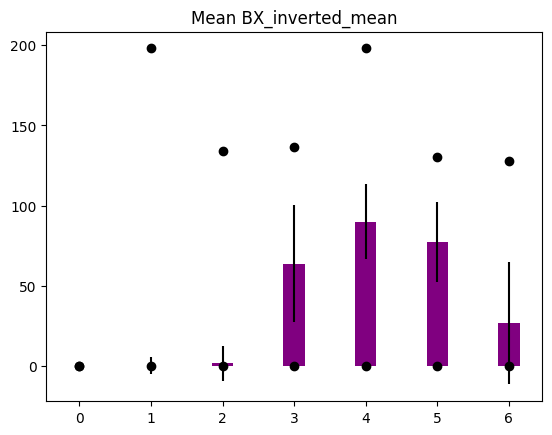

BX_inverted_std
[0.0, 0.00017279115309296164, 1.442528455261439, 61.300296756835145, 55.304372313790935, 64.48097072520052, 22.00209447475017]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.5, 99.5, 98.5, 98.5, 99.0, 81.75818001888251]
[0.0, 0.01609835000417294, 11.118253733704337, 31.219915951333952, 16.7956088429635, 18.315694903042782, 29.82356478935242]


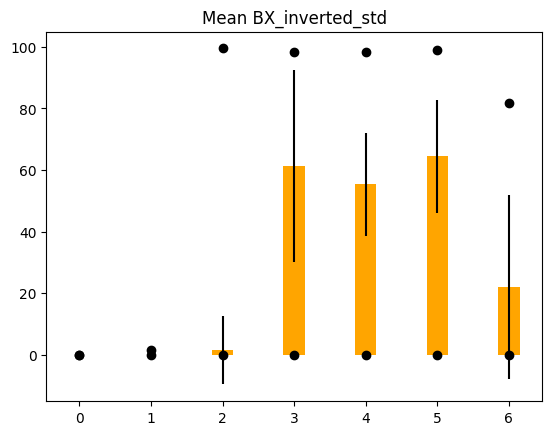

BY_inverted_mean
[0.0, 0.31050570210805206, 1.2251916725866268, 70.63002523492747, 94.24480401982233, 83.43448856239226, 31.05164785950563]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 199.0, 136.25, 136.125, 197.0, 148.0, 157.25]
[0.0, 7.729533226111195, 9.74874846017094, 33.62858322454565, 21.167710235680126, 24.583938379719598, 40.65410215457231]


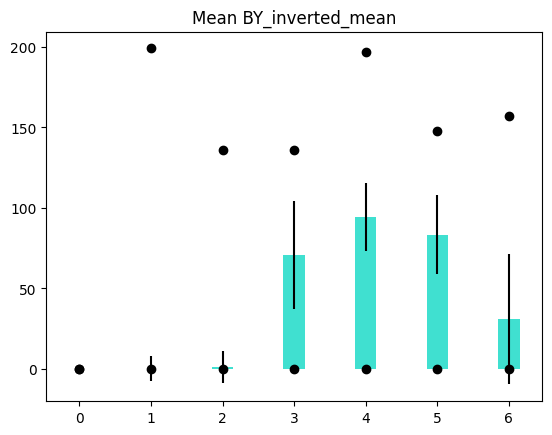

BY_inverted_std
[0.0, 0.001094343969588757, 1.2429361778484407, 59.913228332716365, 55.31411655154001, 64.67646152048724, 26.066643455166844]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 9.5, 98.5, 98.5, 99.5, 98.0, 88.69723783748849]
[0.0, 0.1019562166930954, 9.751971631032395, 25.4504121026869, 16.307137769232078, 16.491981194632853, 31.620103458612522]


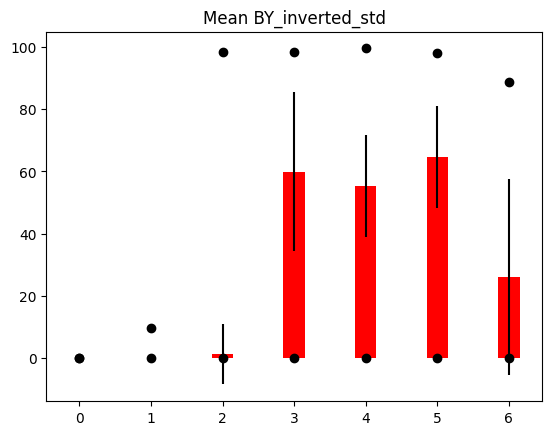

Width_inverted_mean
[200.0, 199.69185577698423, 197.2749355209108, 64.92895331515524, 11.072960771600357, 39.44675034878992, 142.84580256344964]
[200.0, 1.0, 19.77358490566038, 18.865168539325843, 1.6666666666666667, 6.769230769230769, 9.75]
[200.0, 200.0, 200.0, 200.0, 98.0, 200.0, 200.0]
[0.0, 7.6787887150170775, 17.135990619997624, 46.998605786499866, 8.935926259929959, 32.56450727612618, 70.46989636602869]


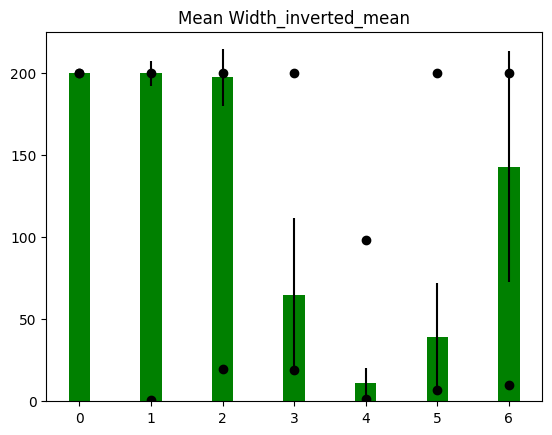

Width_inverted_std
[0.0, 0.0010367469185577698, 2.319803907398795, 62.610266839468565, 4.749174425553931, 39.01729579145545, 19.097226598509547]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 9.0, 99.5, 98.5, 33.281939546847326, 99.0, 75.86977146546721]
[0.0, 0.09659010002503773, 14.442156533537045, 27.734487752899113, 4.719414385238845, 24.967777433080805, 26.028285975431956]


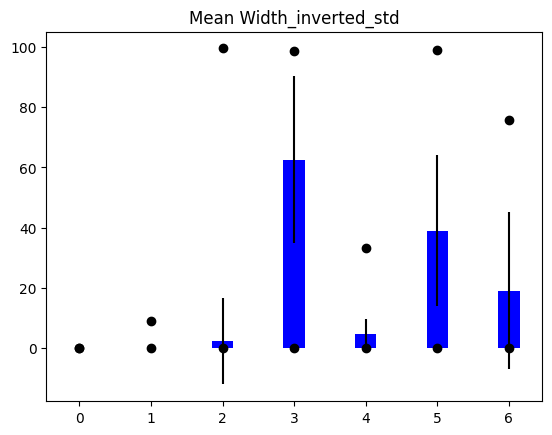

Height_inverted_mean
[200.0, 199.68598087777906, 197.29168255786337, 66.12452610812046, 11.222923034711958, 39.813360865801265, 141.435767685636]
[200.0, 1.0, 19.39622641509434, 19.058823529411764, 1.0, 8.923076923076923, 12.5]
[200.0, 200.0, 200.0, 200.0, 98.0, 200.0, 200.0]
[0.0, 7.8154321439056815, 17.044474182749074, 47.307837500375896, 9.08086942475926, 33.30947812518676, 69.82712833125613]


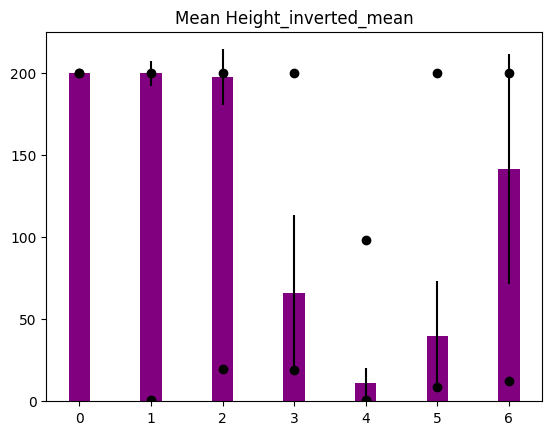

Height_inverted_std
[0.0, 0.0003455823061859233, 2.3021699063782877, 61.469494161967354, 4.699507423713427, 37.821994518332744, 20.658008068458358]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 3.0, 99.0, 98.5, 30.5, 98.5, 80.99794236069621]
[0.0, 0.03219670000834588, 14.335890729994007, 27.524680138601457, 4.62155724406691, 24.83810106168817, 27.805101928418267]


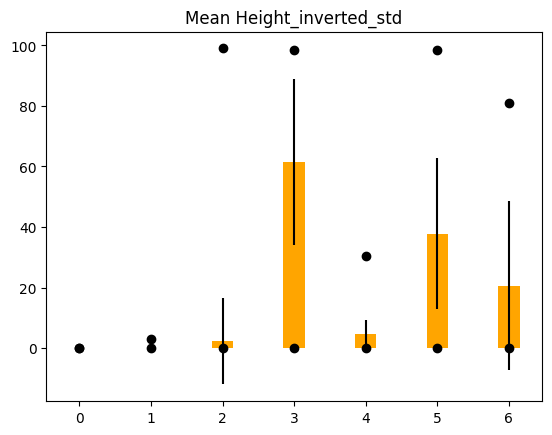

Major_inverted_mean
[225.67623993727128, 225.3293877433475, 202.56756882437298, 60.95636496762386, 13.108070082263643, 34.088574982500994, 152.13480992924988]
[225.629, 1.128, 19.76496226415094, 18.569882352941175, 2.257, 10.982076923076923, 14.397857142857143]
[227.356, 225.676, 226.006, 198.42, 94.7605, 151.974, 220.132]
[0.019299180647115978, 8.63698401018395, 27.13967297869, 40.10016352022667, 9.289908743792997, 21.345936315435033, 72.94500469504962]


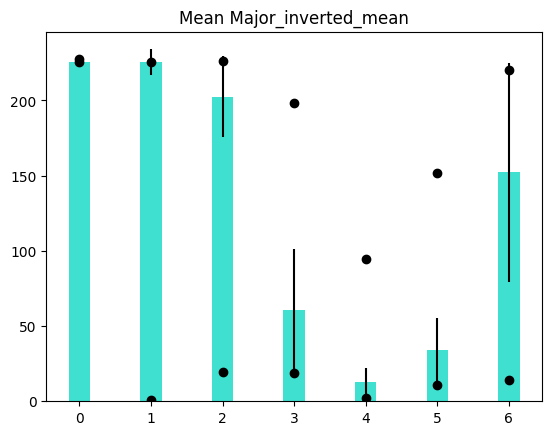

Major_inverted_std
[0.0, 0.000846331067849326, 1.8223528032916307, 52.375363711010465, 5.167449202043216, 25.722115304512783, 19.183017895802067]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 7.346999999999999, 104.54050000000001, 92.12100000000001, 29.60678712940722, 76.88900000000001, 80.31715483146935]
[0.0, 0.07884971832043909, 11.527387566443194, 24.36386214393387, 4.694979599764269, 15.076634866861724, 26.381270003138372]


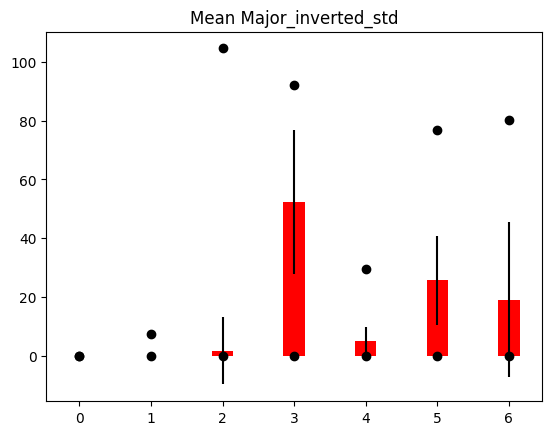

Minor_inverted_mean
[225.6754124411918, 225.31793520331755, 201.88705841084237, 53.127782187359585, 8.608836291017829, 21.21581775551603, 134.36547751841127]
[221.846, 1.128, 9.107283018867925, 11.039267605633805, 1.128, 3.2099230769230767, 3.9868333333333332]
[225.676, 225.676, 225.673, 196.935, 70.176, 150.845, 219.866]
[0.044070101595367686, 8.910236754450834, 28.048594059808554, 42.65978238001328, 5.519471873340475, 22.370181172413027, 82.40951475971087]


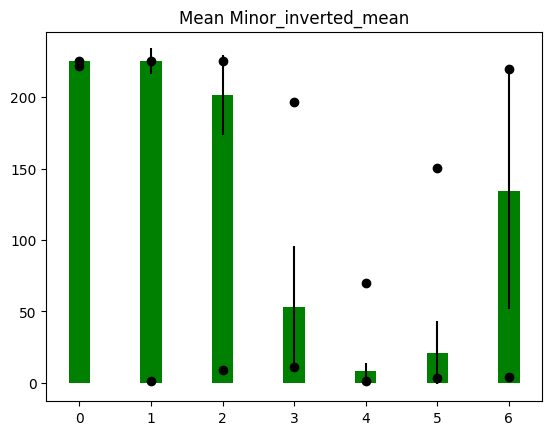

Minor_inverted_std
[0.0, 0.00016789540375532772, 1.8371679628878825, 50.097194432819826, 2.1704394169964476, 18.085311952252106, 12.767991125494056]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.4575, 104.414, 92.47250000000001, 19.71636369905972, 77.1255, 72.17618245654172]
[0.0, 0.01564223008738806, 11.643227549764294, 27.04733039867668, 1.7652290938388786, 18.321241523084137, 19.501677999240968]


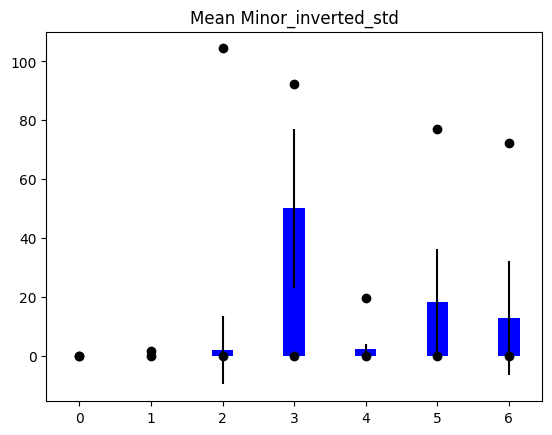

Angle_inverted_mean
[0.1043392577104025, 0.10003023845179126, 90.5805031874586, 93.18870080714149, 64.25518511865603, 87.27320492763359, 95.75225597752896]
[0.0, 0.0, 0.025, 1.443, 0.0, 11.747, 4.137]
[135.0, 135.0, 179.969, 159.5495, 176.48, 171.3906, 179.788]
[3.3205359228772893, 3.1842607221362766, 52.38321460786995, 23.569155478894366, 27.30049765784854, 18.32344502991869, 40.330212342988865]


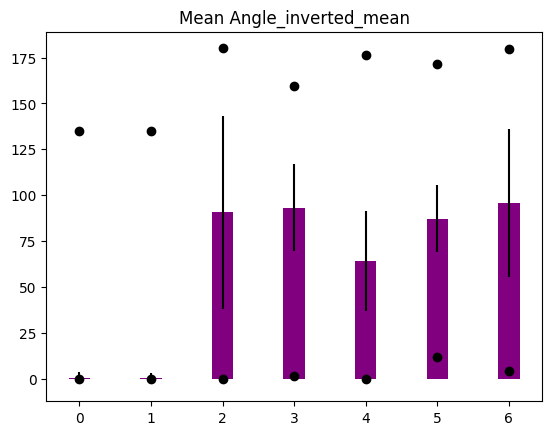

Angle_inverted_std
[0.0, 0.004197615482087316, 0.6212854296833188, 37.88496667176854, 48.36354478770704, 48.65331230134674, 18.830855087618637]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 36.439499999999995, 80.697, 80.0302391571808, 84.8528137423857, 85.9137983832632, 84.50898333444927]
[0.0, 0.39107721665137357, 4.9534593898357375, 20.74326426810522, 15.930682376689258, 14.129937921527953, 26.387875866339016]


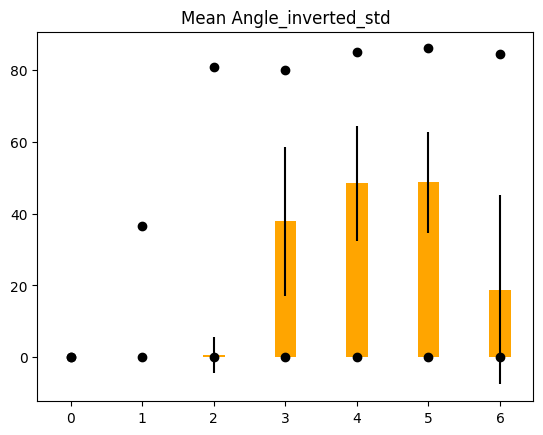

Circ._inverted_mean
[0.7899999999999999, 0.7849908420688861, 0.5375583328350402, 0.5887563322244393, 0.8819411916898158, 0.5672637976730989, 0.5057876857753503]
[0.785, 0.074, 0.023, 0.032, 0.089, 0.026, 0.146]
[0.798, 1.0, 0.8572272727272728, 0.8917999999999999, 1.0, 0.8605652173913042, 0.881875]
[0.0001252284895496116, 0.011543622267771612, 0.17024996709796783, 0.1768915316306966, 0.14047898063017503, 0.17883296013944894, 0.16469955428061234]


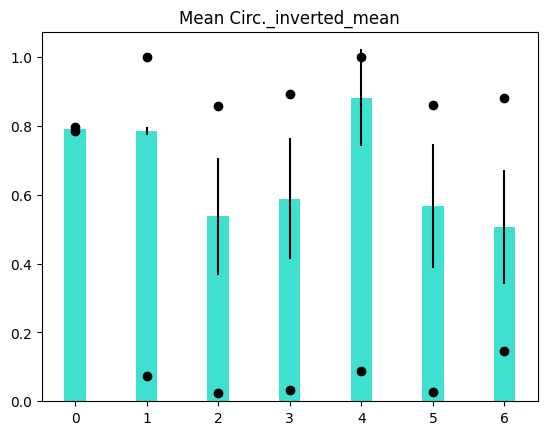

Circ._inverted_std
[0.0, 1.8027876972698998e-05, 0.008211303954585967, 0.29613660253101726, 0.09986286234597695, 0.28243696296795584, 0.09236345896688959]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.1565, 0.459, 0.457, 0.42050000000000004, 0.483, 0.30795038561430643]
[0.0, 0.0016795945171020454, 0.05237639053658043, 0.10313542129377362, 0.08213793182171632, 0.07408804969509453, 0.11268718346066627]


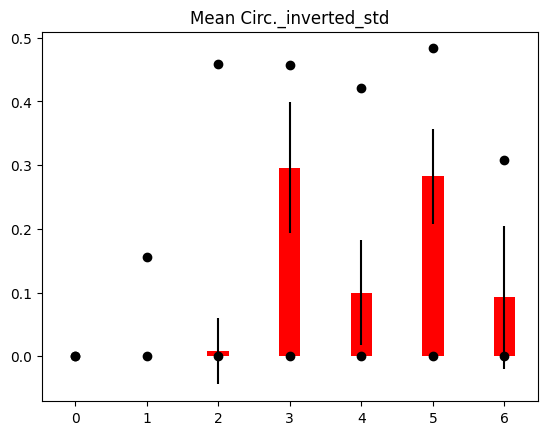

Feret_inverted_mean
[282.8429999999999, 282.4046860960718, 278.3802249283356, 90.81903378819477, 14.55994711076575, 53.70065835976085, 199.21935257272972]
[282.843, 1.414, 24.753301886792457, 26.081882352941175, 2.236, 11.470384615384615, 18.002]
[282.843, 282.843, 282.843, 282.843, 135.772, 282.843, 282.843]
[1.1368683772161603e-13, 10.91430018795269, 24.412387988326604, 66.78910215050595, 12.222347804826605, 46.038383654230806, 98.65032775896687]


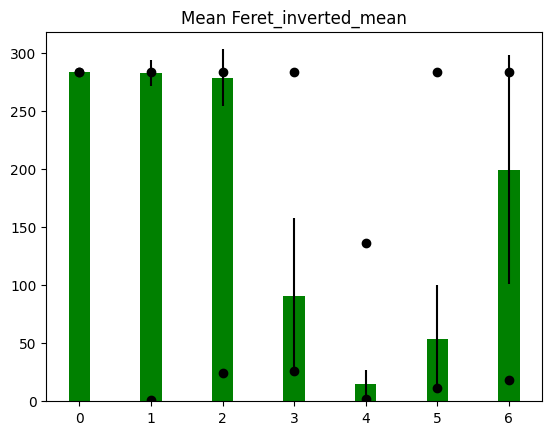

Feret_inverted_std
[0.0, 0.000999193641285566, 3.220536887309839, 85.30226721868058, 5.742146887107847, 50.029940862912845, 26.723519871025598]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 8.674, 139.3, 138.25900000000001, 41.6435, 139.84050000000002, 103.64345832494955]
[0.0, 0.0930913919574641, 20.072598051391186, 39.37932539276873, 5.785990806411564, 33.81201978042585, 36.20696075474839]


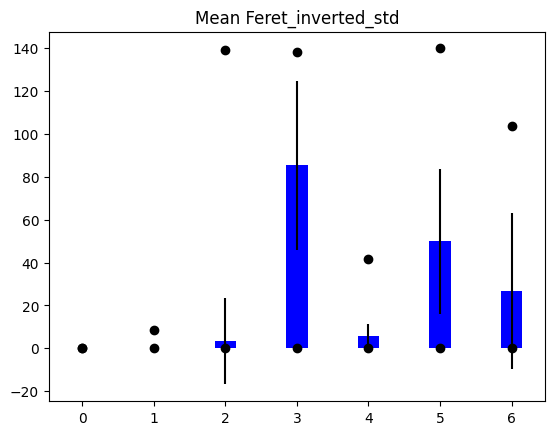

IntDen_inverted_mean
[10199984.137480397, 15.465672157585532, 8370323.22829504, 1639091.301879276, 33430.3351568986, 376541.8261274787, 5362481.328689346]
[10101570.0, 0.0, 40294.811320754714, 65988.7012987013, 510.0, 7198.846153846154, 13345.0]
[10200000.0, 61200.0, 10199745.0, 7825950.0, 988125.0, 4586685.0, 9693315.0]
[1136.8511003565688, 722.8688791200096, 1726540.0678422838, 1611764.765311982, 75751.55099301018, 672002.0558513261, 3845494.8483601403]


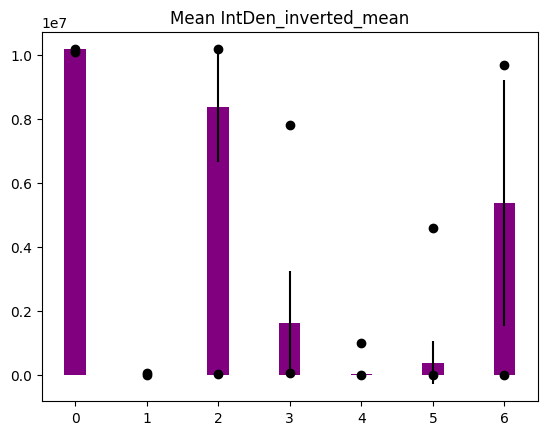

IntDen_inverted_std
[0.0, 0.8371731367353992, 63833.07187854194, 1813363.6292279172, 18810.159904132273, 468084.7566506611, 563633.0438720052]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 7267.5, 4985250.0, 3643185.0, 548360.0650746187, 2544007.5, 3384835.4657723024]
[0.0, 77.99650577021795, 415243.26113194297, 1052025.2737394096, 37024.69815714442, 585577.4996191195, 880590.7068471697]


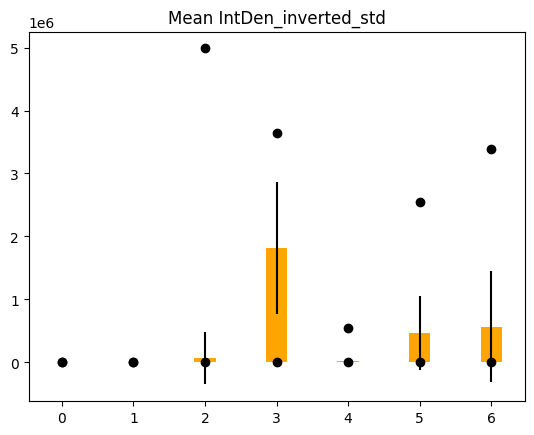

%Area_inverted_mean
[100.0, 0.16127174288676419, 100.0, 100.0, 100.0, 100.0, 100.0]
[100.0, 0.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[0.0, 4.012625787887862, 0.0, 0.0, 0.0, 0.0, 0.0]


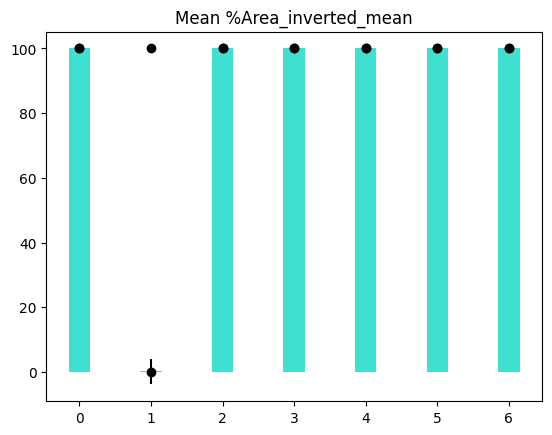

%Area_inverted_std
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


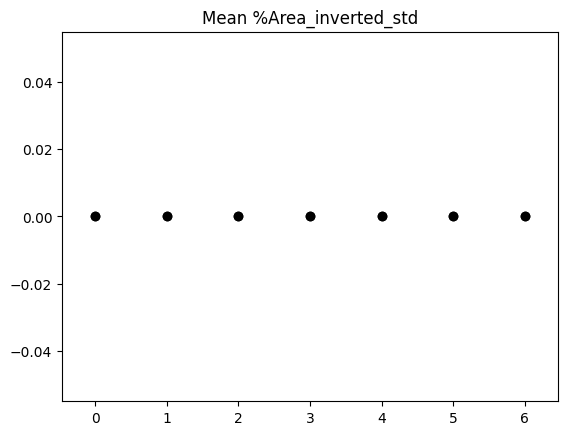

RawIntDen_inverted_mean
[10199984.137480397, 15.465672157585532, 8370323.22829504, 1639091.301879276, 33430.3351568986, 376541.8261274787, 5362481.328689346]
[10101570.0, 0.0, 40294.811320754714, 65988.7012987013, 510.0, 7198.846153846154, 13345.0]
[10200000.0, 61200.0, 10199745.0, 7825950.0, 988125.0, 4586685.0, 9693315.0]
[1136.8511003565688, 722.8688791200096, 1726540.0678422838, 1611764.765311982, 75751.55099301018, 672002.0558513261, 3845494.8483601403]


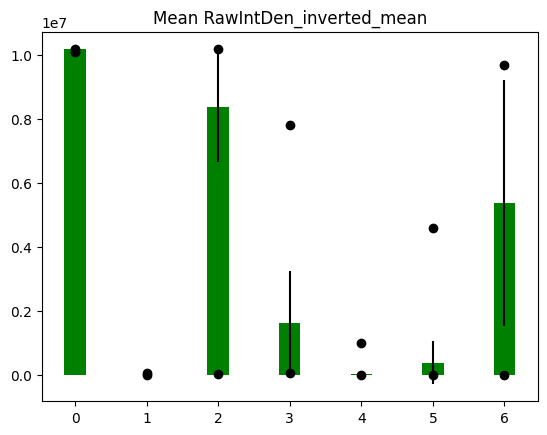

RawIntDen_inverted_std
[0.0, 0.8371731367353992, 63833.07187854194, 1813363.6292279172, 18810.159904132273, 468084.7566506611, 563633.0438720052]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 7267.5, 4985250.0, 3643185.0, 548360.0650746187, 2544007.5, 3384835.4657723024]
[0.0, 77.99650577021795, 415243.26113194297, 1052025.2737394096, 37024.69815714442, 585577.4996191195, 880590.7068471697]


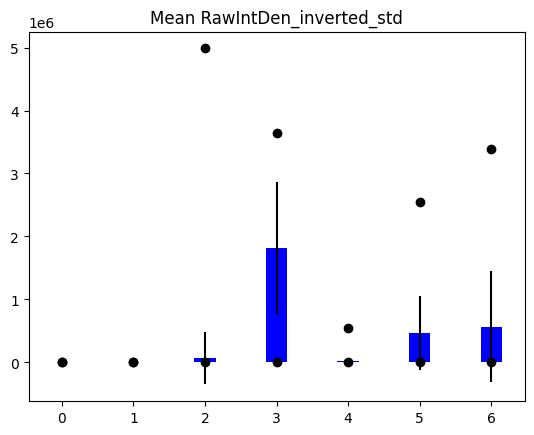

FeretX_inverted_mean
[0.0, 0.14992512383365972, 1.6092223980298088, 65.07847005957694, 90.78965541433753, 79.0009459974361, 27.464253249920503]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 198.0, 141.0, 137.375, 198.0, 133.33333333333334, 128.5]
[0.0, 5.29412654592502, 11.414169220234907, 36.43388549355818, 23.42257320735867, 24.711896804994687, 38.67437714107235]


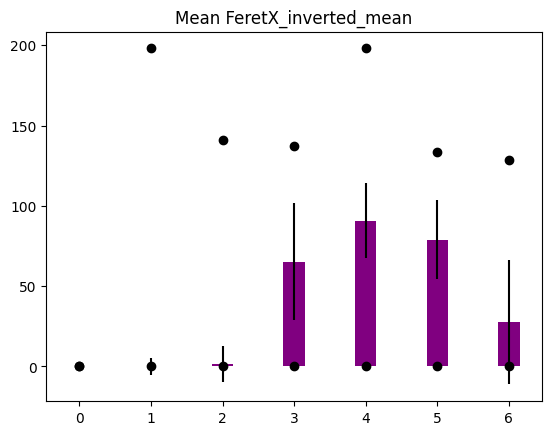

FeretX_inverted_std
[0.0, 0.00017279115309296164, 1.4440919815357198, 61.492910139976786, 55.46064692900078, 64.75193451553656, 22.401174551329067]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 1.5, 99.5, 99.0, 99.5, 99.5, 81.92093749463564]
[0.0, 0.01609835000417294, 11.068088698687205, 31.187669930126848, 16.84611758821709, 17.918306386792946, 30.232444046620664]


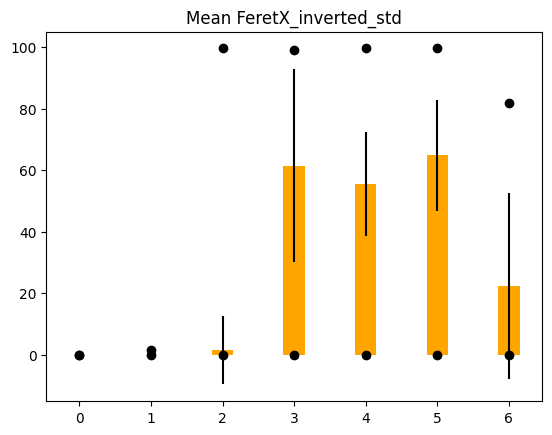

FeretY_inverted_mean
[0.026136957658128592, 0.31453749568022116, 44.48808156453258, 86.8568021397531, 98.09353360671555, 100.27923787653448, 74.11502162601812]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[200.0, 200.0, 200.0, 200.0, 199.0, 200.0, 200.0]
[2.2861995518917624, 7.829366218977039, 82.10798946279387, 38.363725290453054, 21.22956346659571, 28.471695627769176, 73.22975614065265]


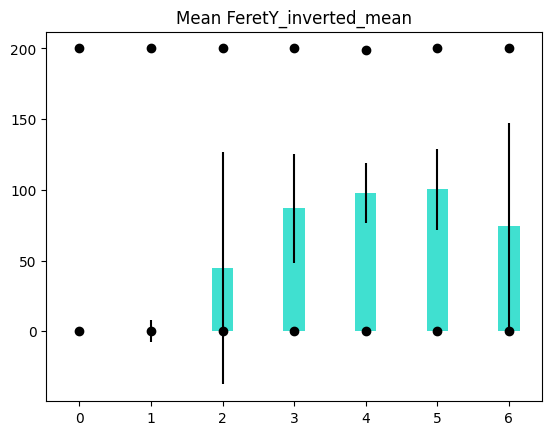

FeretY_inverted_std
[0.0, 0.0005183734592788849, 1.3495765604184606, 62.71246208923283, 55.54742209415678, 64.41769479210457, 28.690425211205568]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 4.5, 100.0, 100.0, 97.0, 98.765821517365, 93.72000853606448]
[0.0, 0.04829505001251887, 10.254142756793442, 24.524200336784357, 16.27606778458111, 17.196909133151994, 33.79697394087929]


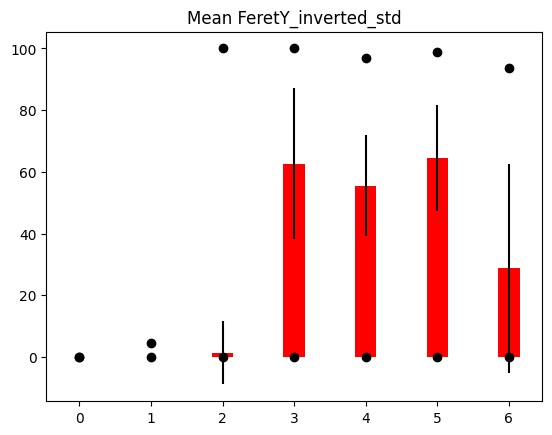

FeretAngle_inverted_mean
[134.98823836905385, 134.9663930998733, 114.98583973180074, 106.3720436436617, 110.33413571422308, 98.64000327839547, 104.7161011503154]
[45.0, 41.987, 26.565, 29.235000000000003, 22.38, 30.3358, 42.459]
[135.0, 178.636, 151.8275, 149.351, 177.709, 153.995, 147.44433333333333]
[1.0287897983512928, 1.9104780458721722, 37.12529325281383, 21.294153767232032, 16.01405660066281, 17.12131599564908, 33.61131107981249]


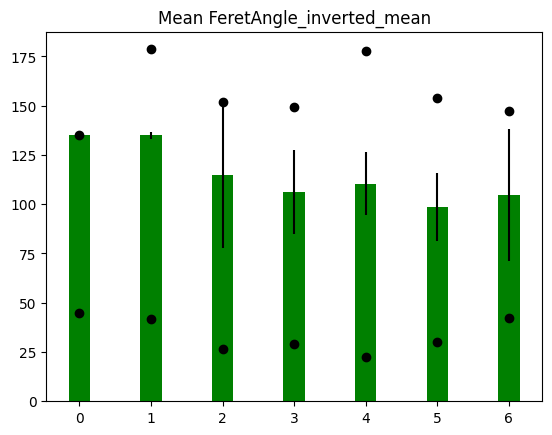

FeretAngle_inverted_std
[0.0, 0.004393330261490612, 0.5297878286494364, 32.274403160853815, 35.105463237946445, 42.98051964547834, 18.494877362071787]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 38.1385, 69.82061313108042, 59.563583428877834, 72.2927424722565, 69.32937444085299, 69.05520928616143]
[0.0, 0.4093112810894332, 4.387682145444211, 17.118662729906948, 15.574289325153371, 12.20474849686953, 24.532242497011083]


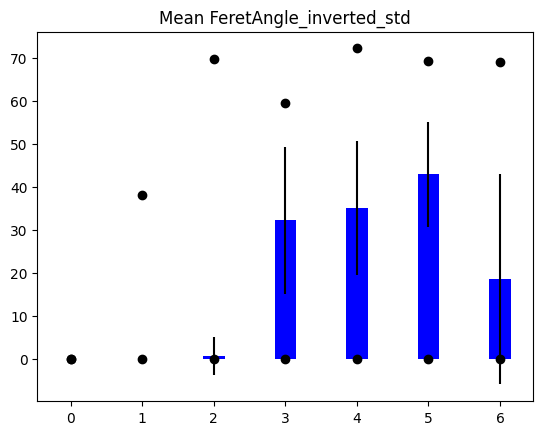

MinFeret_inverted_mean
[200.0, 199.6839817993319, 197.24034848473232, 62.2625934984489, 8.930310070193073, 31.956016354357146, 135.20085796628013]
[200.0, 1.0, 13.470622641509433, 14.186280898876404, 1.0, 3.8791538461538457, 5.815666666666666]
[200.0, 200.0, 200.0, 200.0, 98.0, 200.0, 200.0]
[0.0, 7.864602435099502, 17.37116666006404, 48.48154934131007, 7.152564631082681, 33.88095411000486, 74.18953199827604]


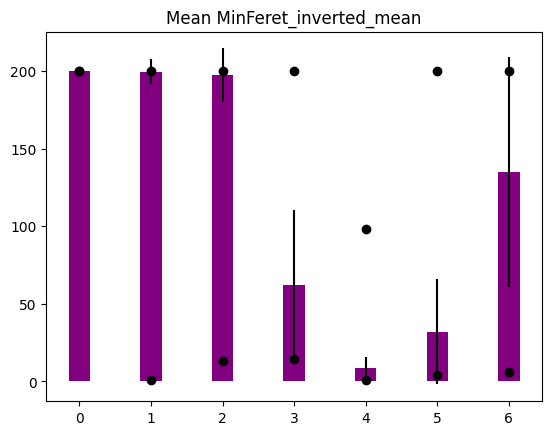

MinFeret_inverted_std
[0.0, 0.00027231885727450753, 2.3389451971181505, 61.52523290697977, 2.810584338679024, 32.39988030224972, 17.349097866201067]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 2.364, 99.5, 98.5, 30.406499999999998, 99.0, 81.70646649235705]
[0.0, 0.025370999606576572, 14.564896787800452, 29.383926585719646, 2.6943898337970764, 27.747420091721157, 25.06874434620953]


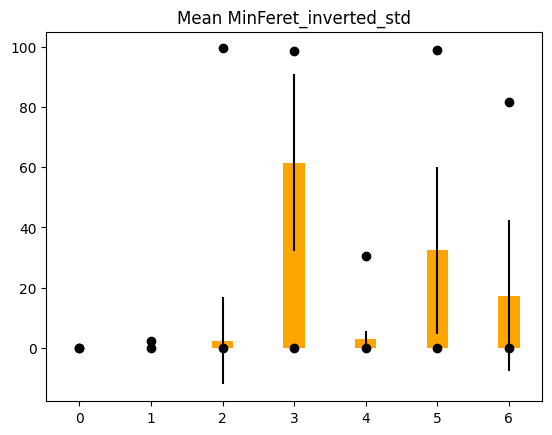

AR_inverted_mean
[1.0000036591740722, 1.0065222900587492, 1.0148930059707408, 1.5977938286462259, 1.6284845437754667, 2.2312009103236954, 1.51183321747514]
[1.0, 1.0, 1.0, 1.001, 1.0, 1.006, 1.001]
[1.025, 42.0, 3.4570000000000003, 2.654, 27.6435, 7.2126, 4.479666666666667]
[0.00028782071888829817, 0.4451882451944981, 0.09476099762199143, 0.3390045530551215, 1.3974042013282204, 0.7617009602137162, 0.7503335784666862]


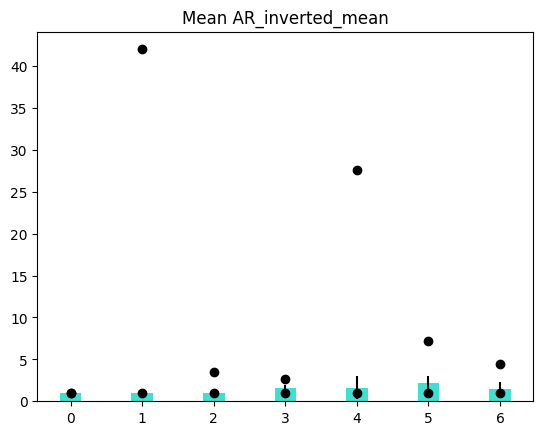

AR_inverted_std
[0.0, 4.319778827324041e-05, 0.010784238960689642, 0.49547338379449474, 0.5652557385942709, 1.083929488580701, 0.32462699991664185]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.375, 3.1233585555722967, 1.57, 19.355, 5.223051960087873, 1.927706865682643]
[0.0, 0.004024587501043235, 0.08916412260010972, 0.3047886760866703, 0.8557345420944944, 0.6798862564866334, 0.47879460011713953]


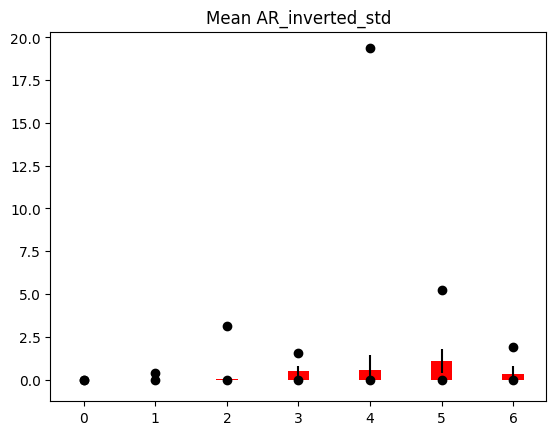

Round_inverted_mean
[0.9999964715107161, 0.9992481856928925, 0.9911625989279275, 0.7110310904446397, 0.758863441860403, 0.5809423011632395, 0.8032854605885773]
[0.976, 0.024, 0.46199999999999997, 0.49687499999999996, 0.039, 0.18309999999999998, 0.26499999999999996]
[1.0, 1.0, 1.0, 0.999, 1.0, 0.994, 0.999]
[0.0002764745031886304, 0.021426923879061477, 0.03969166259747719, 0.12613713347865246, 0.14468750689341858, 0.1227196469001262, 0.22826418947659224]


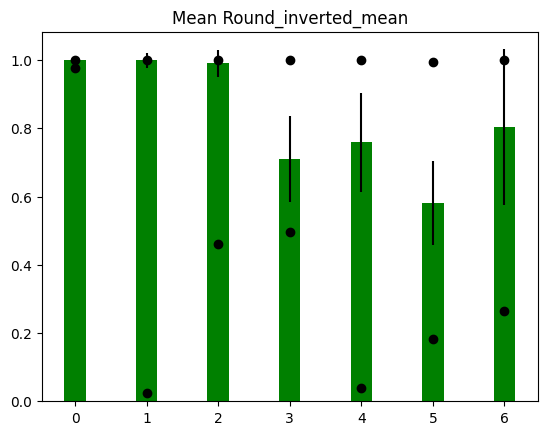

Round_inverted_std
[0.0, 2.2462849902085018e-06, 0.0046762629325614, 0.16939954007648025, 0.16177896086508958, 0.20417639851583905, 0.0720388845943774]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.019500000000000003, 0.35247348206007717, 0.349, 0.375, 0.393, 0.274356993714394]
[0.0, 0.00020927855005424835, 0.030808900654496266, 0.06690439764359456, 0.0629775654927776, 0.05411995754466931, 0.08805448969549956]


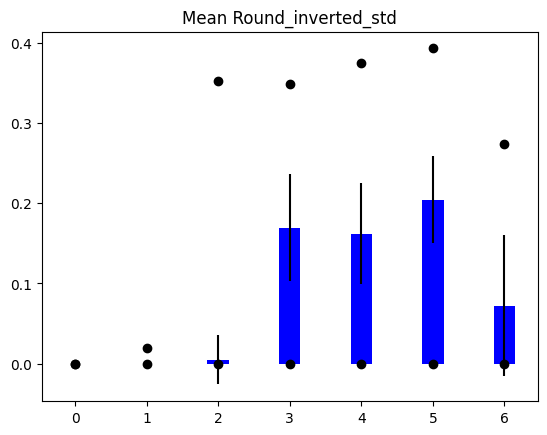

Solidity_inverted_mean
[0.9999993465760585, 0.9998666628268633, 0.833785124919776, 0.8099566274904401, 0.9173983075936343, 0.7280916675418325, 0.8380116808686388]
[0.996, 0.684, 0.212, 0.447, 0.404, 0.233, 0.46]
[1.0, 1.0, 1.0, 0.9551000000000001, 1.0, 0.937782608695652, 0.9692222222222223]
[4.712976170206752e-05, 0.004864929568858331, 0.14045290197684537, 0.08658115536051722, 0.0676081321477142, 0.1343502556055168, 0.11401365719671291]


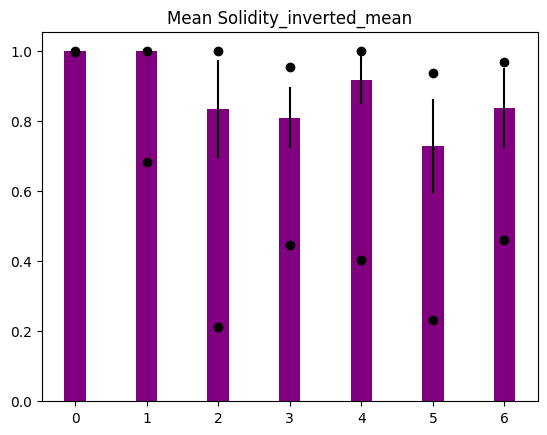

Solidity_inverted_std
[0.0, 2.2290058748992052e-05, 0.004887241451698362, 0.1402508685972184, 0.05163464890154006, 0.19712537824172857, 0.05486673051873043]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.1935, 0.357, 0.24649999999999997, 0.26144693534252794, 0.3575386536989936, 0.23658868122045199]
[0.0, 0.00207668715053831, 0.03166493422387728, 0.050320656427316965, 0.04612137402984944, 0.06049969000039195, 0.06804398868466253]


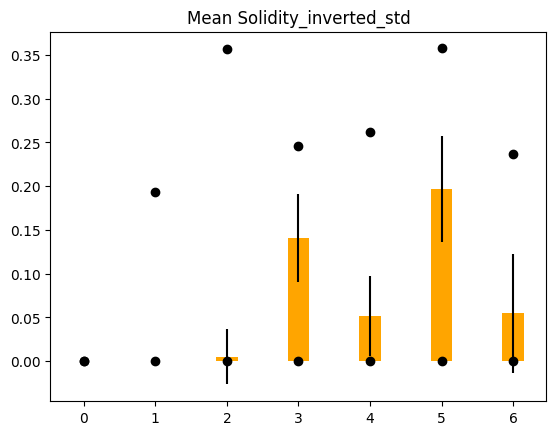

In [ ]:
# print bar plots for each param based on class

feats = ["Ua","Ui","Ga","Gi","Da","Di","Ba",'Ua/Ui', 'Ua/Ga', 'Ua/Gi', 'Ua/Da', 'Ua/Di', 'Ua/Ba', 'Ga/Gi', 'Ga/Da',
       'Ga/Di', 'Ga/Ba', 'Gi/Da', 'Gi/Di', 'Gi/Ba', 'Da/Di', 'Da/Ba', 'Di/Ba',
       'Ui/Gi', 'Ui/Da', 'Ui/Di', 'Ui/Ba'] + list(feats_df.columns[13:111])

num_classes = 7
classes = np.arange(0,num_classes)# list of unique clusters

class_dfs = [] # list of dfs for each cluster
rows = {}

for i in classes:
  df = feats_df[feats_df["classifier_pred_class"] == i]
  df.reset_index(inplace = True, drop = True)
  class_dfs.append(df)
  rows[str(i)] = []

colors = ["red","green","blue","purple","orange","turquoise","pink"]

for i in range(len(feats)):
  param = feats[i]
  print(param)
  param_list = cluster_means_df.columns
  means = cluster_means_df[param_list[i*4]]
  print(list(means))
  mins = cluster_means_df[param_list[(i*4) + 1]]
  print(list(mins))
  maxes = cluster_means_df[param_list[(i*4) + 2]]
  print(list(maxes))
  stds = cluster_means_df[param_list[(i*4) + 3]]
  print(list(stds))

  # bar plots
  fig, ax = plt.subplots()
  ax.bar(["0","1","2","3","4","5","6"], means, width = 0.3, color = colors[i%6], yerr = stds)



  #set min and max points
  ax.scatter(classes, mins, color = "black")
  ax.scatter(classes, maxes, color = "black")



  ax.set(title = "Mean " + param)

  plt.show()







In [ ]:
# scale each param so we can plot them next to each other
params = ["Ua","Ui","Ga","Gi","Da","Di","Ba"]
params_df = feats_df[params]

from sklearn.preprocessing import MinMaxScaler


for param in  params:
  sc = MinMaxScaler()
  param_arr = np.array(params_df[param]).reshape(-1,1)
  param_arr_scaled = sc.fit_transform(param_arr)
  feats_df[param + "_scaled"] = param_arr_scaled


feats = ['Ua_scaled', 'Ui_scaled', 'Ga_scaled',
        'Gi_scaled', 'Da_scaled', 'Di_scaled', 'Ba_scaled']

feats_extra = []

for i in feats:
  feats_extra.append(i + " mean")
  feats_extra.append(i + " min")
  feats_extra.append(i + " max")
  feats_extra.append(i + " std")

feats = feats_extra
print(len(feats))

num_classes = 7
classes = np.arange(0,num_classes)# list of unique clusters

class_dfs = [] # list of dfs for each cluster
rows = {}

for i in classes:
  df = feats_df[feats_df["classifier_pred_class"] == i]
  df.reset_index(inplace = True, drop = True)
  class_dfs.append(df)
  rows[str(i)] = []


for i in range(num_classes):
  df = class_dfs[i]
  for j in range(0,len(feats),4):
    mean_val = np.mean(np.array(df[feats[j][0:9]].astype(float)))
    rows[str(i)].append(mean_val)

    min_val = np.min(np.array(df[feats[j][0:9]].astype(float)))
    rows[str(i)].append(min_val)

    max_val = np.max(np.array(df[feats[j][0:9]].astype(float)))
    rows[str(i)].append(max_val)

    std = np.std(np.array(df[feats[j][0:9]].astype(float)))
    rows[str(i)].append(std)

    # print("Cluster " + str(i) + " avg " + feat + ": " + str(mean_val))


cluster_means_df = pd.DataFrame(rows)
# cluster_means_df["feats"] = feats
cluster_means_df = cluster_means_df.transpose()
cluster_means_df.columns = feats

cluster_means_df


28


,Ua_scaled mean,Ua_scaled min,Ua_scaled max,Ua_scaled std,Ui_scaled mean,Ui_scaled min,Ui_scaled max,Ui_scaled std,Ga_scaled mean,Ga_scaled min,Ga_scaled max,Ga_scaled std,Gi_scaled mean,Gi_scaled min,Gi_scaled max,Gi_scaled std,Da_scaled mean,Da_scaled min,Da_scaled max,Da_scaled std,Di_scaled mean,Di_scaled min,Di_scaled max,Di_scaled std,Ba_scaled mean,Ba_scaled min,Ba_scaled max,Ba_scaled std
0,0.576578,0.000725,0.999950,0.256728,0.387151,0.000000,0.999724,0.289176,0.259769,0.000000,0.999993,0.221426,0.569892,0.000000,0.999631,0.256619,0.517143,0.000165,0.999666,0.268308,0.447173,0.000133,0.998887,0.276505,0.436975,0.000541,0.999914,0.259623
1,0.385801,0.000000,1.000000,0.266027,0.648671,0.008140,1.000000,0.222964,0.664970,0.038978,1.000000,0.216014,0.423130,0.000175,0.999567,0.281917,0.501620,0.000005,1.000000,0.273874,0.495369,0.000000,0.999242,0.271435,0.618151,0.000721,1.000000,0.260318
2,0.521276,0.000170,0.999883,0.236909,0.410560,0.006080,0.999152,0.220930,0.493389,0.007907,0.999983,0.196455,0.538630,0.000477,0.999780,0.229236,0.488295,0.000877,0.999981,0.264620,0.497923,0.000054,0.999396,0.260786,0.443374,0.000000,0.996227,0.234289
3,0.683966,0.101699,0.997429,0.191078,0.468945,0.091728,0.988047,0.212200,0.692350,0.047766,0.998908,0.213417,0.362771,0.001581,0.864534,0.181097,0.479067,0.000000,0.992943,0.258967,0.499004,0.000841,0.996995,0.279136,0.442865,0.002843,0.988507,0.234969
4,0.598270,0.002266,0.996536,0.240447,0.530994,0.040955,0.995453,0.208360,0.647283,0.067900,0.999486,0.213641,0.365723,0.000959,0.998974,0.230025,0.477854,0.005797,0.996266,0.276021,0.530414,0.009713,1.000000,0.266681,0.490992,0.002523,0.998014,0.255456
5,0.468569,0.002660,0.992941,0.241997,0.558033,0.068642,0.998778,0.225948,0.572825,0.068864,0.996610,0.221290,0.489822,0.001750,1.000000,0.255454,0.477249,0.000365,0.999007,0.262438,0.542914,0.001980,0.999280,0.262258,0.500130,0.005122,0.971880,0.257772
6,0.571339,0.068172,0.963014,0.273247,0.166074,0.006080,0.900542,0.170847,0.832744,0.177401,0.999993,0.165008,0.436796,0.063346,0.988212,0.234943,0.527813,0.007860,0.992942,0.281560,0.535897,0.018783,0.968597,0.249705,0.549505,0.087536,0.988210,0.264899


Ua_scaled
[0.5765777448567337, 0.3858009423926089, 0.5212758599432519, 0.6839658515560056, 0.5982701802434501, 0.4685694344340638, 0.5713386096928224]
[0.000725082746039496, 0.0, 0.0001697303002168582, 0.10169909332727389, 0.0022660619867629628, 0.0026599516702144332, 0.06817241631689425]
[0.9999497715821788, 1.0, 0.9998833223305059, 0.997429112779959, 0.9965359442740591, 0.9929413596831673, 0.963014347537265]
[0.2567279811117452, 0.2660270282657339, 0.23690914234963212, 0.19107844338023924, 0.24044680400745233, 0.2419965342269254, 0.27324672928990945]
Ui_scaled
[0.38715082283840213, 0.6486708753733876, 0.4105602042001748, 0.46894479864483485, 0.530993626357464, 0.558033294864074, 0.16607397153250278]
[0.0, 0.008140291512346187, 0.006080442130927698, 0.09172780851366599, 0.04095471793301186, 0.06864178947844068, 0.006080442130927698]
[0.9997238833078138, 1.0, 0.9991518387761241, 0.9880465060137572, 0.9954529069367454, 0.9987780429248149, 0.9005424273782761]
[0.2891758795841491, 0.22296

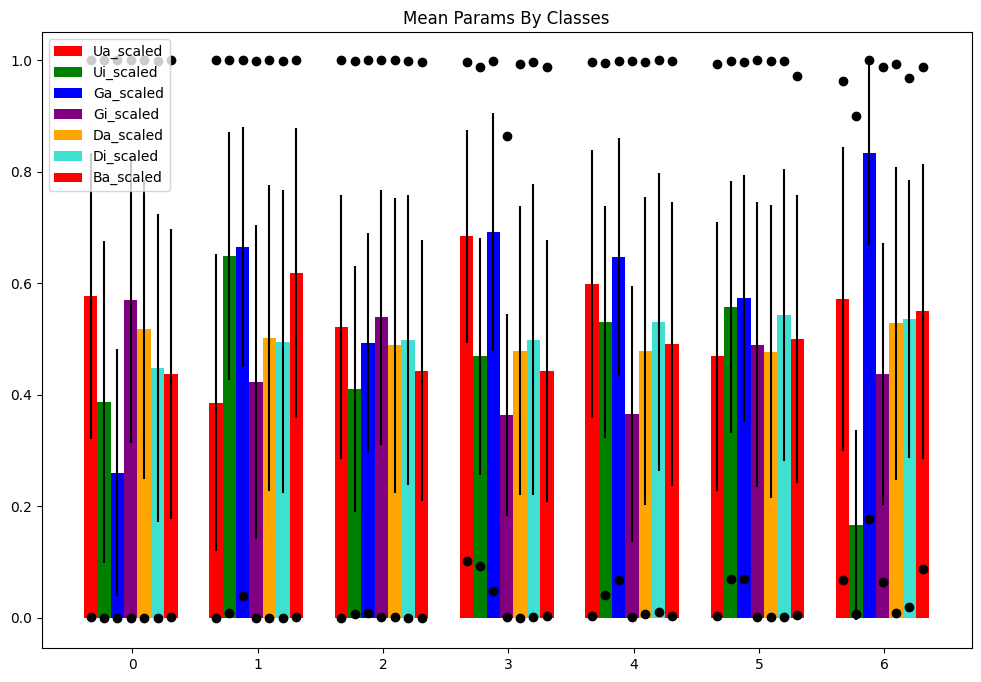

In [ ]:
# Do all 7 main params on the same plot

# print bar plots for each param based on class

feats = ['Ua_scaled', 'Ui_scaled', 'Ga_scaled',
        'Gi_scaled', 'Da_scaled', 'Di_scaled', 'Ba_scaled']
num_classes = 7
classes = np.arange(0,num_classes)# list of unique clusters

class_dfs = [] # list of dfs for each cluster

for i in classes:
  df = feats_df[feats_df["classifier_pred_class"] == i]
  df.reset_index(inplace = True, drop = True)
  class_dfs.append(df)

colors = ["red","green","blue","purple","orange","turquoise","pink"]
fig, ax = plt.subplots(figsize = (12,8))
for i in range(len(feats)):
  param = feats[i]
  print(param)
  param_list = cluster_means_df.columns
  means = cluster_means_df[param_list[i*4]]
  print(list(means))
  mins = cluster_means_df[param_list[(i*4) + 1]]
  print(list(mins))
  maxes = cluster_means_df[param_list[(i*4) + 2]]
  print(list(maxes))
  stds = cluster_means_df[param_list[(i*4) + 3]]
  print(list(stds))

  # bar plots
  width = 0.32
  # fig, ax = plt.subplots()
  bar_pos = (np.array([0,3,6,9,12,15,18]) + width*i )
  ax.bar(bar_pos, means, width = width, color = colors[i%6], yerr = stds, label = param)



  #set min and max points
  ax.scatter(bar_pos, mins, color = "black")
  ax.scatter(bar_pos, maxes, color = "black")



ax.set(title = "Mean Params By Classes")
ax.legend()

# leg = ax.legend(['Ua_scaled', 'Ui_scaled', 'Ga_scaled',
#         'Gi_scaled', 'Da_scaled', 'Di_scaled', 'Ba_scaled'], loc="upper left")


# leg = ax.get_legend()
# print(type(leg.legend_handles[0]))
# leg.legendHandles[0].set_color('red')
# leg.legendHandles[1].set_color('green')
# leg.legendHandles[2].set_color('blue')
# leg.legendHandles[3].set_color('purple')
# leg.legendHandles[4].set_color('orange')
# leg.legendHandles[5].set_color('turquoise')
# leg.legendHandles[6].set_color('pink')



ax.set_xticks([1,4,7,10,13,16,19])
ax.set_xticklabels(["0",'1', '2', '3', '4', '5', "6"])


plt.show()







In [ ]:
feats_df.columns[13:112]

Index(['num_spots', 'Mean', 'Median', 'Area_mean', 'Area_std', 'X_mean',
       'X_std', 'Y_mean', 'Y_std', 'Perim._mean', 'Perim._std', 'BX_mean',
       'BX_std', 'BY_mean', 'BY_std', 'Width_mean', 'Width_std', 'Height_mean',
       'Height_std', 'Major_mean', 'Major_std', 'Minor_mean', 'Minor_std',
       'Angle_mean', 'Angle_std', 'Circ._mean', 'Circ._std', 'Feret_mean',
       'Feret_std', 'IntDen_mean', 'IntDen_std', '%Area_mean', '%Area_std',
       'RawIntDen_mean', 'RawIntDen_std', 'FeretX_mean', 'FeretX_std',
       'FeretY_mean', 'FeretY_std', 'FeretAngle_mean', 'FeretAngle_std',
       'MinFeret_mean', 'MinFeret_std', 'AR_mean', 'AR_std', 'Round_mean',
       'Round_std', 'Solidity_mean', 'Solidity_std', 'num_spots_inverted',
       'Mean_inverted', 'Median_inverted', 'Area_inverted_mean',
       'Area_inverted_std', 'X_inverted_mean', 'X_inverted_std',
       'Y_inverted_mean', 'Y_inverted_std', 'Perim._inverted_mean',
       'Perim._inverted_std', 'BX_inverted_mean', 'BX_

In [ ]:
print(feats_df.shape)
feats_df.head()


(27515, 144)


,Ua,Ui,Ga,Gi,Ba,Da,Di,pattern,noise,path,seed,dir,feat_bool,num_spots,Mean,Median,Area_mean,Area_std,X_mean,X_std,Y_mean,Y_std,Perim._mean,Perim._std,BX_mean,BX_std,BY_mean,BY_std,Width_mean,Width_std,Height_mean,Height_std,Major_mean,Major_std,Minor_mean,Minor_std,Angle_mean,Angle_std,Circ._mean,Circ._std,Feret_mean,Feret_std,IntDen_mean,IntDen_std,%Area_mean,%Area_std,RawIntDen_mean,RawIntDen_std,FeretX_mean,FeretX_std,FeretY_mean,FeretY_std,FeretAngle_mean,FeretAngle_std,MinFeret_mean,MinFeret_std,AR_mean,AR_std,Round_mean,Round_std,Solidity_mean,Solidity_std,num_spots_inverted,Mean_inverted,Median_inverted,Area_inverted_mean,Area_inverted_std,X_inverted_mean,X_inverted_std,Y_inverted_mean,Y_inverted_std,Perim._inverted_mean,Perim._inverted_std,BX_inverted_mean,BX_inverted_std,BY_inverted_mean,BY_inverted_std,Width_inverted_mean,Width_inverted_std,Height_inverted_mean,Height_inverted_std,Major_inverted_mean,Major_inverted_std,Minor_inverted_mean,Minor_inverted_std,Angle_inverted_mean,Angle_inverted_std,Circ._inverted_mean,Circ._inverted_std,Feret_inverted_mean,Feret_inverted_std,IntDen_inverted_mean,IntDen_inverted_std,%Area_inverted_mean,%Area_inverted_std,RawIntDen_inverted_mean,RawIntDen_inverted_std,FeretX_inverted_mean,FeretX_inverted_std,FeretY_inverted_mean,FeretY_inverted_std,FeretAngle_inverted_mean,FeretAngle_inverted_std,MinFeret_inverted_mean,MinFeret_inverted_std,AR_inverted_mean,AR_inverted_std,Round_inverted_mean,Round_inverted_std,Solidity_inverted_mean,Solidity_inverted_std,full_path,classifier_pred_class,pc1,pc2,pc3,Ua/Ui,Ua/Ga,Ua/Gi,Ua/Da,Ua/Di,Ua/Ba,Ga/Gi,Ga/Da,Ga/Di,Ga/Ba,Gi/Da,Gi/Di,Gi/Ba,Da/Di,Da/Ba,Di/Ba,Ui/Gi,Ui/Da,Ui/Di,Ui/Ba,Ui/Ga,Ua_scaled,Ui_scaled,Ga_scaled,Gi_scaled,Da_scaled,Di_scaled,Ba_scaled
0,0.025122,0.063822,0.071957,0.106327,-0.113131,0.009186,0.611871,1,2,1.png,1,/content/05-09-2024_all_images/,1,70,5.489,0,12.300000,2.548669,99.395943,58.506181,97.530229,58.913237,12.282143,1.400962,97.371429,58.453442,95.528571,58.843551,4.071429,0.723512,4.057143,0.753766,4.245571,0.439294,3.664200,0.511781,55.108900,57.413924,0.958686,0.069883,4.926700,0.412294,3136.500000,649.910626,100.0,0.0,3136.500000,649.910626,97.942857,58.572760,96.014286,58.843981,120.129000,30.775307,3.653171,0.564778,1.177686,0.183575,0.866686,0.115368,0.879486,0.067138,1,249.511,255,39139.0,0.0,99.998,0.0,100.022,0.0,811.882,0.0,0.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,223.351,0.0,223.117,0.0,38.796,0.0,0.746,0.0,282.843,0.0,9980445.0,0.0,100.0,0.0,9980445.0,0.0,0.0,0.0,200.0,0.0,45.0,0.0,200.0,0.0,1.001,0.0,0.999,0.0,0.979,0.0,/content/05-09-2024_all_images/1.png,2,3.191032,5.993039,-0.574702,0.393632,0.349128,0.236272,2.734948,0.041058,-0.222063,0.676750,7.833650,0.117602,-0.636049,11.575397,0.173774,-0.939858,0.015012,-0.081194,-5.408506,0.600237,6.947985,0.104306,-0.564138,0.886941,0.387342,0.268942,0.312573,0.540951,0.296555,0.288368,0.541828
1,0.034475,0.059956,0.080798,0.100370,-0.132577,0.008852,0.854084,1,2,3.png,3,/content/05-09-2024_all_images/,1,63,4.921,0,12.253968,2.569468,101.800571,59.297600,99.451270,58.953924,11.663270,1.365051,99.968254,59.323693,97.619048,58.964458,3.666667,0.534522,3.666667,0.534522,4.237317,0.401713,3.661714,0.572434,56.049556,60.605082,0.999619,0.003000,4.908365,0.491745,3124.761905,655.214389,100.0,0.0,3124.761905,655.214389,100.158730,59.330446,98.079365,59.017431,120.191190,32.406426,3.476190,0.613529,1.185032,0.226780,0.867667,0.127976,0.954905,0.046408,1,250.078,255,39228.0,0.0,99.992,0.0,100.015,0.0,809.255,0.0,0.0,0.0,0.0,0.0,200.0,0.0,200.0,0.0,223.524,0.0,223.451,0.0,72.380,0.0,0.753,0.0,282.843,0.0,10003140.0,0.0,100.0,0.0,10003140.0,0.0,0.0,0.0,0.0,0.0,135.0,0.0,200.0,0.0,1.000,0.0,1.000,0.0,0.981,0.0,/content/05-09-2024_all_images/3.png,2,2.394518,6.007229,-0.434414,0.575003,0.426675,0.343475,3.894407,0.040364,-0.260035,0.805002,9.127331,0.094602,-0.609446,11.338266,0.117518,-0.757073,0.010365,-0.066772,-6.442184,0.597344,6.772849,0.070199,-0.452234,0.742040,0.603087,0.2496

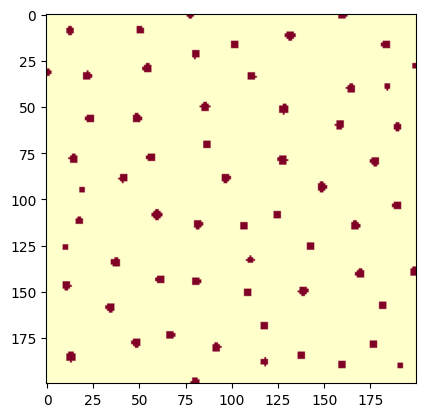

In [ ]:
# show images from the dataframe

# define the image you want to show
image_num = 4242

# define the image path
path = feats_df["dir"][image_num] + feats_df["path"][image_num]

# import pillows library
from PIL import Image, ImageSequence

# open the image
img = Image.open(str(path))

# convert the image into a numpy array
img = np.array(img)

#view the image using matplotlib plt.imshow
plt.imshow(img, cmap = "YlOrRd", vmin = 0, vmax = 255)

# print(img[0,199])